In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
listingData=pd.read_csv('listings.csv')

#display the top five records of df dataframe by default if we donot specify any number in head parameter
listingData.head()

id                                               name  \
0  714569379355913481            Lovely private bedroom in Muswell Hill.   
1  822557738577472503   PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi   
2             4876550  Stunning Apartment 2 minutes walk to Tube Station   
3  786791705194673775                               Waddon Coach House 2   
4  808038970516277767                       Studio Flat  Franklin London   

     host_id host_name  neighbourhood_group neighbourhood   latitude  \
0   39009854   Forough                  NaN      Haringey  51.597280   
1  325629338      Paul                  NaN        Harrow  51.608180   
2   25087384    Joseph                  NaN        Barnet  51.602282   
3  490795350    Jahmal                  NaN       Croydon  51.370691   
4  495977998   Hussein                  NaN        Barnet  51.636518   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -0.139330     Private room    100               1                  0   
1  -0.277400  Entire home/apt    132               2                  0   
2  -0.193606  Entire home/apt    120               5                  0   
3  -0.109956  Entire home/apt    100               2                  6   
4  -0.177475  Entire home/apt     65             180                  0   

  last_review  reviews_per_month  calculated_host_listings_count  \
0         NaN                NaN                               1   
1         NaN                NaN                               4   
2         NaN                NaN                               1   
3  2023-03-09               3.83                              24   
4         NaN                NaN                               7   

   availability_365  number_of_reviews_ltm  license  
0               365                      0      NaN  
1                35                      0      NaN  
2               337                      0      NaN  
3               252                      6      NaN  
4               365                      0      NaN

In [3]:
listingData.isnull().sum()

id                                    0
name                                 31
host_id                               0
host_name                             5
neighbourhood_group               75241
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       18693
reviews_per_month                 18693
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           75241
dtype: int64

In [4]:
print(type(listingData))

<class 'pandas.core.frame.DataFrame'>


In [5]:
listingData.shape


(75241, 18)

In [6]:
reviewData=pd.read_csv('reviews.csv')

#display the top five records of df dataframe
reviewData.tail()

listing_id                  id        date  reviewer_id  \
1352427  840878919107024852  842688643512584730  2023-03-08    433279721   
1352428  840878919107024852  844041645054705310  2023-03-10    489943356   
1352429  841014552889907808  845530215395444917  2023-03-12    481779440   
1352430  841114310668130061  841966576103960627  2023-03-07    433152443   
1352431  841114310668130061  842652019028332446  2023-03-08    489030148   

        reviewer_name                                           comments  
1352427         Peter  Great place to stay, enjoyed every min of the ...  
1352428      Shareena  Was a great place to stay, felt home away from...  
1352429         Laura  Natalie was extremely helpful responding to qu...  
1352430         Ilona  Great place to stay; great balance between mon...  
1352431          Kyle  5mins walk from tube station, clear instructio...

In [7]:
listingData.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [8]:
listingData['neighbourhood'].unique()

array(['Haringey', 'Harrow', 'Barnet', 'Croydon', 'Merton', 'Enfield',
       'Brent', 'Richmond upon Thames', 'Kingston upon Thames',
       'Wandsworth', 'Hammersmith and Fulham', 'Bromley', 'Bexley',
       'Redbridge', 'Westminster', 'Lambeth', 'Havering', 'Sutton',
       'Waltham Forest', 'Hounslow', 'Camden', 'Hillingdon', 'Islington',
       'Lewisham', 'Greenwich', 'Kensington and Chelsea', 'Ealing',
       'City of London', 'Southwark', 'Hackney', 'Barking and Dagenham',
       'Newham', 'Tower Hamlets'], dtype=object)

In [9]:
listingData.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [10]:
reviewData.isnull().sum().sort_values(ascending=False)

comments         106
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
dtype: int64

# Data Wrangling

In [11]:
#Remove Duplicate records

In [12]:
len(listingData[listingData.duplicated()])

0

In [13]:
len(listingData[listingData.duplicated('id')])

0

In [14]:
len(reviewData[reviewData.duplicated()])

0

In [15]:
reviewData.drop_duplicates(subset ="id", keep = False, inplace = True)

In [16]:
listingData.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
75236    False
75237    False
75238    False
75239    False
75240    False
Length: 75241, dtype: bool

#Deleting the columns which have all null values

In [17]:
listingData=listingData.dropna(axis='columns',how='all')
listingData.head()

id                                               name  \
0  714569379355913481            Lovely private bedroom in Muswell Hill.   
1  822557738577472503   PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi   
2             4876550  Stunning Apartment 2 minutes walk to Tube Station   
3  786791705194673775                               Waddon Coach House 2   
4  808038970516277767                       Studio Flat  Franklin London   

     host_id host_name neighbourhood   latitude  longitude        room_type  \
0   39009854   Forough      Haringey  51.597280  -0.139330     Private room   
1  325629338      Paul        Harrow  51.608180  -0.277400  Entire home/apt   
2   25087384    Joseph        Barnet  51.602282  -0.193606  Entire home/apt   
3  490795350    Jahmal       Croydon  51.370691  -0.109956  Entire home/apt   
4  495977998   Hussein        Barnet  51.636518  -0.177475  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    100               1                  0         NaN                NaN   
1    132               2                  0         NaN                NaN   
2    120               5                  0         NaN                NaN   
3    100               2                  6  2023-03-09               3.83   
4     65             180                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               1               365                      0  
1                               4                35                      0  
2                               1               337                      0  
3                              24               252                      6  
4                               7               365                      0

In [18]:
#Selecting the required columns

In [19]:
#1. Take only the columns that are necessary for analysis
listingData = listingData[['id','host_id','host_name','neighbourhood','name','room_type','number_of_reviews','calculated_host_listings_count','availability_365','price']]

listingData

id    host_id host_name           neighbourhood  \
0      714569379355913481   39009854   Forough                Haringey   
1      822557738577472503  325629338      Paul                  Harrow   
2                 4876550   25087384    Joseph                  Barnet   
3      786791705194673775  490795350    Jahmal                 Croydon   
4      808038970516277767  495977998   Hussein                  Barnet   
...                   ...        ...       ...                     ...   
75236            13609107   78763244    Oliver           Tower Hamlets   
75237            16840434   25942523     Arpit           Tower Hamlets   
75238             9773320   13938346     Julie                 Lambeth   
75239            15460327   56872646    Gelske                 Hackney   
75240            17376717  117429579     Chloe  Kensington and Chelsea   

                                                    name        room_type  \
0                Lovely private bedroom in Muswell Hill.     Private room   
1       PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi  Entire home/apt   
2      Stunning Apartment 2 minutes walk to Tube Station  Entire home/apt   
3                                   Waddon Coach House 2  Entire home/apt   
4                           Studio Flat  Franklin London  Entire home/apt   
...                                                  ...              ...   
75236                 Spacious Rooftop Room and Terrace.     Private room   
75237  Stylish flat in trendy East London. Bethnal Gr...  Entire home/apt   
75238                 Spacious room for a Lady in London     Private room   
75239  Entire house w Private Garden in cool East London  Entire home/apt   
75240                          Notting Hill Pied-a-Terre  Entire home/apt   

       number_of_reviews  calculated_host_listings_count  availability_365  \
0                      0                               1               365   
1                      0                               4                35   
2                      0                               1               337   
3                      6                              24               252   
4                      0                               7               365   
...                  ...                             ...               ...   
75236                  3                               2                 0   
75237                 18                               1                 0   
75238                  1                               1                 0   
75239                 35                               1                 0   
75240                  9                               1                 0   

       price  
0        100  
1        132  
2        120  
3        100  
4         65  
...      ...  
75236     25  
75237    500  
75238     22  
75239     85  
75240    264  

[75241 rows x 10 columns]

In [20]:
reviewData = reviewData[['listing_id','comments']]
reviewData

listing_id                                           comments
0                     13913  My girlfriend and I hadn't known Alina before ...
1                     13913  Alina was a really good host. The flat is clea...
2                     13913  Alina is an amazing host. She made me feel rig...
3                     13913  Alina's place is so nice, the room is big and ...
4                     13913  Nice location in Islington area, good for shor...
...                     ...                                                ...
1352427  840878919107024852  Great place to stay, enjoyed every min of the ...
1352428  840878919107024852  Was a great place to stay, felt home away from...
1352429  841014552889907808  Natalie was extremely helpful responding to qu...
1352430  841114310668130061  Great place to stay; great balance between mon...
1352431  841114310668130061  5mins walk from tube station, clear instructio...

[1352432 rows x 2 columns]

Handling missing value 

In [21]:
listingData[listingData['name'].isnull()]

id    host_id         host_name           neighbourhood name  \
348     6686665   34923907           Michiel           Tower Hamlets  NaN   
350     8131510    3914430               Bea           Tower Hamlets  NaN   
743     9666936   49016292           Miglena                  Newham  NaN   
844    23268887  173198187                 D               Islington  NaN   
1775     544258     806965             Neave  Hammersmith and Fulham  NaN   
4057   18908642    8601197             Peter                 Bromley  NaN   
5828   14051483   84273981            Sergio                 Lambeth  NaN   
8239    3815154   19616970            Harald                Haringey  NaN   
9201    7661166    2703657              Will                  Camden  NaN   
19661  12542110   31393535  Marie-Frédérique                  Merton  NaN   
22618   6997727   36687818              Enea             Westminster  NaN   
23440   5799918   30091099          Veronica               Southwark  NaN   
25257   1804130     949926  Tobias & Annette  Hammersmith and Fulham  NaN   
30289   1197911    6543986            Joanna               Islington  NaN   
32751   6428465   26885695            Mitsuo                  Merton  NaN   
35327   8946230    2655073            Verena               Southwark  NaN   
37120  11621478   23728914            Pierre           Tower Hamlets  NaN   
37901   9833194   27895768            Helena                 Lambeth  NaN   
39742   1105934    4325599               Ian             Westminster  NaN   
40626   1249846    1409439              Alan               Greenwich  NaN   
40843   5200577   24822977           Gregory             Westminster  NaN   
46590   9859465   37655947           Olivier               Islington  NaN   
56979    843505    1409439              Alan               Greenwich  NaN   
57384    583705    2876123             Vilma              Wandsworth  NaN   
59314   1346531    1549541               Ben                 Hackney  NaN   
61191   1011062    1940607            Graham    Richmond upon Thames  NaN   
61923   7715075   37182187              Lily             Westminster  NaN   
62165  11037571   21580058           Soledad                 Hackney  NaN   
64545    452350    2247541            Stella                 Hackney  NaN   
65180    620282    2247541            Stella                 Hackney  NaN   
67486  11311660   17716960              Adam           Tower Hamlets  NaN   

             room_type  number_of_reviews  calculated_host_listings_count  \
348       Private room                  0                               1   
350       Private room                  0                               1   
743       Private room                  1                               1   
844    Entire home/apt                  0                               1   
1775   Entire home/apt                 22                               1   
4057   Entire home/apt                  0                               1   
5828      Private room                  0                               1   
8239      Private room                  0                               1   
9201      Private room                  1                               1   
19661  Entire home/apt                  2                               1   
22618     Private room                  0                               1   
23440     Private room                  0                               1   
25257  Entire home/apt                 40                              20   
30289     Private room                258                               2   
32751     Private room                 15                               3   
35327     Private room                  1                               1   
37120     Private room                 21                               1   
37901     Private room                  0                               1   
39742     Private room                274                               8   
40626  E

In [22]:
#Check for any NaN values that affect the dataset
print('Number of rows in each column affected by existence of non-existing values:')
listingData.isnull().sum().sort_values(ascending=False)

Number of rows in each column affected by existence of non-existing values:


name                              31
host_name                          5
id                                 0
host_id                            0
neighbourhood                      0
room_type                          0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
price                              0
dtype: int64

In [23]:
print('checking the null values count in review dataset')
reviewData.isnull().sum()

checking the null values count in review dataset


listing_id      0
comments      106
dtype: int64

In [24]:
listingData.isnull().sum().sort_values(ascending=False)

name                              31
host_name                          5
id                                 0
host_id                            0
neighbourhood                      0
room_type                          0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
price                              0
dtype: int64

In [25]:
listingData=listingData[~listingData['host_name'].isnull()]
listingData

id    host_id host_name           neighbourhood  \
0      714569379355913481   39009854   Forough                Haringey   
1      822557738577472503  325629338      Paul                  Harrow   
2                 4876550   25087384    Joseph                  Barnet   
3      786791705194673775  490795350    Jahmal                 Croydon   
4      808038970516277767  495977998   Hussein                  Barnet   
...                   ...        ...       ...                     ...   
75236            13609107   78763244    Oliver           Tower Hamlets   
75237            16840434   25942523     Arpit           Tower Hamlets   
75238             9773320   13938346     Julie                 Lambeth   
75239            15460327   56872646    Gelske                 Hackney   
75240            17376717  117429579     Chloe  Kensington and Chelsea   

                                                    name        room_type  \
0                Lovely private bedroom in Muswell Hill.     Private room   
1       PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi  Entire home/apt   
2      Stunning Apartment 2 minutes walk to Tube Station  Entire home/apt   
3                                   Waddon Coach House 2  Entire home/apt   
4                           Studio Flat  Franklin London  Entire home/apt   
...                                                  ...              ...   
75236                 Spacious Rooftop Room and Terrace.     Private room   
75237  Stylish flat in trendy East London. Bethnal Gr...  Entire home/apt   
75238                 Spacious room for a Lady in London     Private room   
75239  Entire house w Private Garden in cool East London  Entire home/apt   
75240                          Notting Hill Pied-a-Terre  Entire home/apt   

       number_of_reviews  calculated_host_listings_count  availability_365  \
0                      0                               1               365   
1                      0                               4                35   
2                      0                               1               337   
3                      6                              24               252   
4                      0                               7               365   
...                  ...                             ...               ...   
75236                  3                               2                 0   
75237                 18                               1                 0   
75238                  1                               1                 0   
75239                 35                               1                 0   
75240                  9                               1                 0   

       price  
0        100  
1        132  
2        120  
3        100  
4         65  
...      ...  
75236     25  
75237    500  
75238     22  
75239     85  
75240    264  

[75236 rows x 10 columns]

In [26]:
listingData=listingData[~listingData['name'].isnull()]
listingData

id    host_id host_name           neighbourhood  \
0      714569379355913481   39009854   Forough                Haringey   
1      822557738577472503  325629338      Paul                  Harrow   
2                 4876550   25087384    Joseph                  Barnet   
3      786791705194673775  490795350    Jahmal                 Croydon   
4      808038970516277767  495977998   Hussein                  Barnet   
...                   ...        ...       ...                     ...   
75236            13609107   78763244    Oliver           Tower Hamlets   
75237            16840434   25942523     Arpit           Tower Hamlets   
75238             9773320   13938346     Julie                 Lambeth   
75239            15460327   56872646    Gelske                 Hackney   
75240            17376717  117429579     Chloe  Kensington and Chelsea   

                                                    name        room_type  \
0                Lovely private bedroom in Muswell Hill.     Private room   
1       PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi  Entire home/apt   
2      Stunning Apartment 2 minutes walk to Tube Station  Entire home/apt   
3                                   Waddon Coach House 2  Entire home/apt   
4                           Studio Flat  Franklin London  Entire home/apt   
...                                                  ...              ...   
75236                 Spacious Rooftop Room and Terrace.     Private room   
75237  Stylish flat in trendy East London. Bethnal Gr...  Entire home/apt   
75238                 Spacious room for a Lady in London     Private room   
75239  Entire house w Private Garden in cool East London  Entire home/apt   
75240                          Notting Hill Pied-a-Terre  Entire home/apt   

       number_of_reviews  calculated_host_listings_count  availability_365  \
0                      0                               1               365   
1                      0                               4                35   
2                      0                               1               337   
3                      6                              24               252   
4                      0                               7               365   
...                  ...                             ...               ...   
75236                  3                               2                 0   
75237                 18                               1                 0   
75238                  1                               1                 0   
75239                 35                               1                 0   
75240                  9                               1                 0   

       price  
0        100  
1        132  
2        120  
3        100  
4         65  
...      ...  
75236     25  
75237    500  
75238     22  
75239     85  
75240    264  

[75205 rows x 10 columns]

In [27]:
#1. Remove rows that do not contain comments.
noReviewData=reviewData[(reviewData.comments.isnull())]
print('Number of records which has null value in column comments')
print(noReviewData.shape)
print('Checking Number of records after assigning only records without nan value')

# this code part assing only records which doesnot have null value in comments
reviewData=reviewData[~(reviewData.comments.isnull())]

#we are runnig this code for checking whether there is any null values
noReviewData=reviewData[(reviewData.comments.isnull())]
print(noReviewData.shape)


Number of records which has null value in column comments
(106, 2)
Checking Number of records after assigning only records without nan value
(0, 2)


Merging Dataframe

In [28]:
#group the dataframe by listing id and then bring all the comments to a particular listing_id to group according to the listing_id
review_group = reviewData.groupby('listing_id')
print(review_group)
reviewData = review_group.apply(lambda x: list(x['comments']))

In [29]:
#Convert from series to dataframe
reviewData = reviewData.to_frame('comments')
reviewData

comments
listing_id                                                           
13913               [My girlfriend and I hadn't known Alina before...
15400               [We loved staying at Phillipa's place in Chels...
17402               [Amazing location - great apartment, plenty of...
24328               [The communication with Joe was very easy. We ...
25123               [10,000 times better and cheaper than staying ...
...                                                               ...
843038973630044774         [nice room, central area with subway near]
843203613361079569  [Fantastic host.<br/>Great accommodation cant ...
843405768455690290  [Raffaella’s flat is quite spacious, we were v...
843524996925244561  [Superb stay & very convenient for access to w...
844058888885663384  [I booked Karen's home last minute and my good...

[56548 rows x 1 columns]

In [30]:
# merging full review + add only specific columns from df
mergedData = pd.merge(left=reviewData, right=listingData, how='left', left_on=reviewData.index, right_on='id')
mergedData

comments                  id  \
0      [My girlfriend and I hadn't known Alina before...               13913   
1      [We loved staying at Phillipa's place in Chels...               15400   
2      [Amazing location - great apartment, plenty of...               17402   
3      [The communication with Joe was very easy. We ...               24328   
4      [10,000 times better and cheaper than staying ...               25123   
...                                                  ...                 ...   
56543         [nice room, central area with subway near]  843038973630044774   
56544  [Fantastic host.<br/>Great accommodation cant ...  843203613361079569   
56545  [Raffaella’s flat is quite spacious, we were v...  843405768455690290   
56546  [Superb stay & very convenient for access to w...  843524996925244561   
56547  [I booked Karen's home last minute and my good...  844058888885663384   

           host_id     host_name           neighbourhood  \
0          54730.0         Alina               Islington   
1          60302.0      Philippa  Kensington and Chelsea   
2          67564.0           Liz             Westminster   
3          41759.0           Joe              Wandsworth   
4         103583.0         Grace                  Barnet   
...            ...           ...                     ...   
56543  441856679.0  Moza Mostafa           Tower Hamlets   
56544    2659258.0        Graham                 Hackney   
56545  494678357.0     Raffaella  Kensington and Chelsea   
56546  498382945.0          Enzo               Islington   
56547  504732658.0         Karen                  Camden   

                                                    name        room_type  \
0                    Holiday London DB Room Let-on going     Private room   
1                    Bright Chelsea  Apartment. Chelsea!  Entire home/apt   
2                  Superb 3-Bed/2 Bath & Wifi: Trendy W1  Entire home/apt   
3      Battersea live/work artist house, garden communal  Entire home/apt   
4                      Clean big Room in London (Room 1)     Private room   
...                                                  ...              ...   
56543                                         Holybush D     Private room   
56544                               Canal side cute room     Private room   
56545          Luxury Flat in Kensington / Knightsbridge  Entire home/apt   
56546                  ¹ Central Private Room/Caledonian     Private room   
56547                        Primrose Hill Petite Palace  Entire home/apt   

       number_of_reviews  calculated_host_listings_count  availability_365  \
0                   41.0                             2.0             313.0   
1                   92.0                             1.0              76.0   
2                   54.0                             8.0             227.0   
3                   96.0                             1.0              26.0   
4                  129.0                             3.0               0.0   
...                  ...                             ...               ...   
56543                1.0                            12.0             146.0   
56544                1.0                             1.0             312.0   
56545                3.0                             3.0             254.0   
56546                1.0                             3.0             261.0   
56547                1.0                             1.0             364.0   

       price  
0       79.0  
1       80.0  
2      418.0  
3      250.0  
4       29.0  
...      ...  
56543   39.0  
56544   37.0  
56545  199.0  
56546   39.0  
56547  450.0  

[56548 rows x 11 columns]

In [31]:
mergedData.dtypes

comments                           object
id                                  int64
host_id                           float64
host_name                          object
neighbourhood                      object
name                               object
room_type                          object
number_of_reviews                 float64
calculated_host_listings_count    float64
availability_365                  float64
price                             float64
dtype: object

Data in the correct format

In [32]:
mergedData['number_of_reviews']=mergedData['number_of_reviews'].astype('float64')
mergedData['calculated_host_listings_count']=mergedData['calculated_host_listings_count'].astype('float64')
mergedData['availability_365']=mergedData['availability_365'].astype('float64')

In [33]:
mergedData['price'].dtypes

dtype('float64')

Outlier Detection and Removal

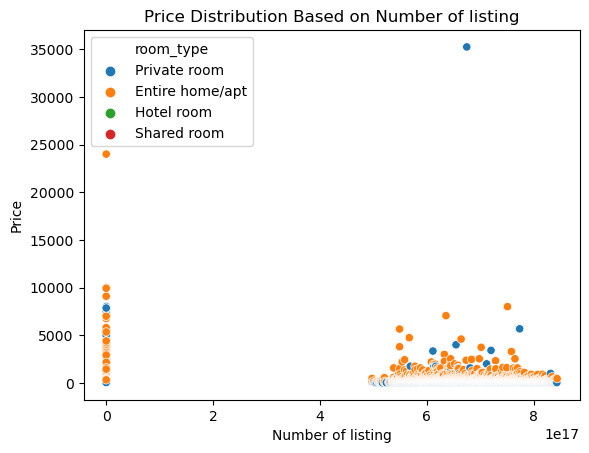

In [34]:

sns.scatterplot(x = "id", y = "price", data = mergedData, hue = "room_type")
plt.title('Price Distribution Based on Number of listing')
plt.xlabel('Number of listing')
plt.ylabel('Price')

plt.show()

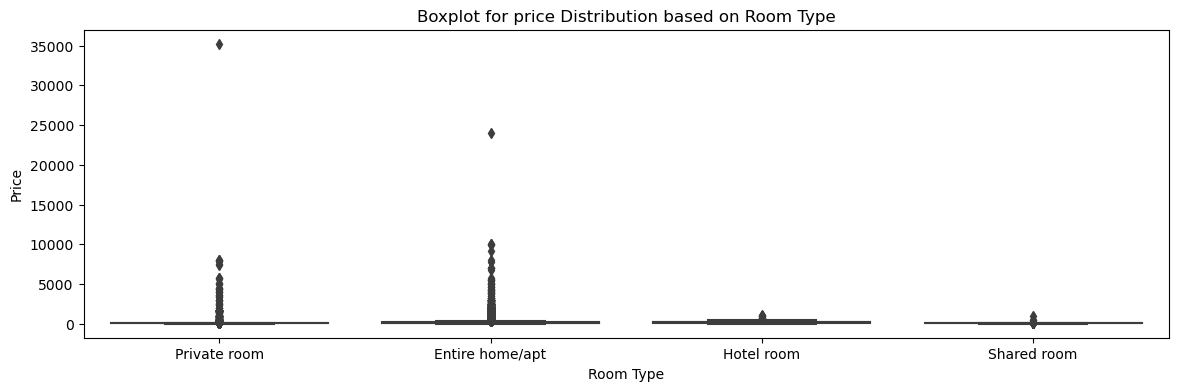

In [35]:

plt.figure(figsize=(14,4))
sns.boxplot(y='price',x='room_type',data = mergedData)
plt.title('Boxplot for price Distribution based on Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

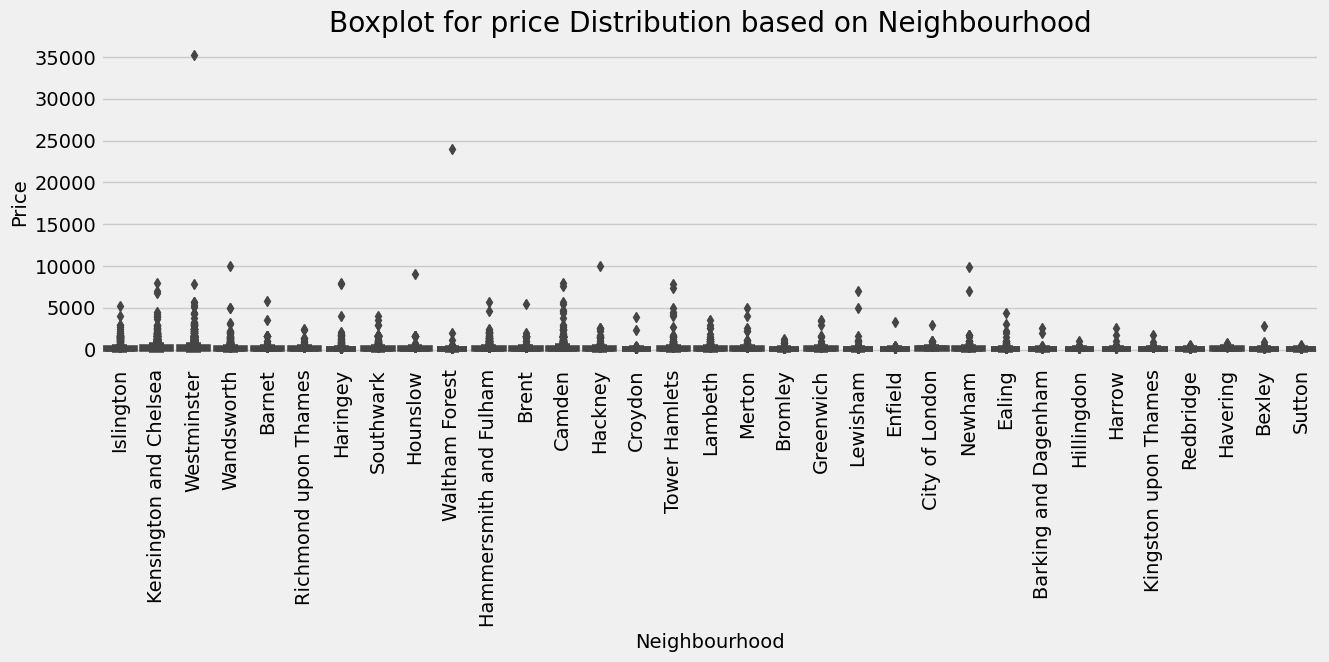

In [36]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,4))
sns.boxplot(y='price',x='neighbourhood',data = mergedData)
plt.title('Boxplot for price Distribution based on Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

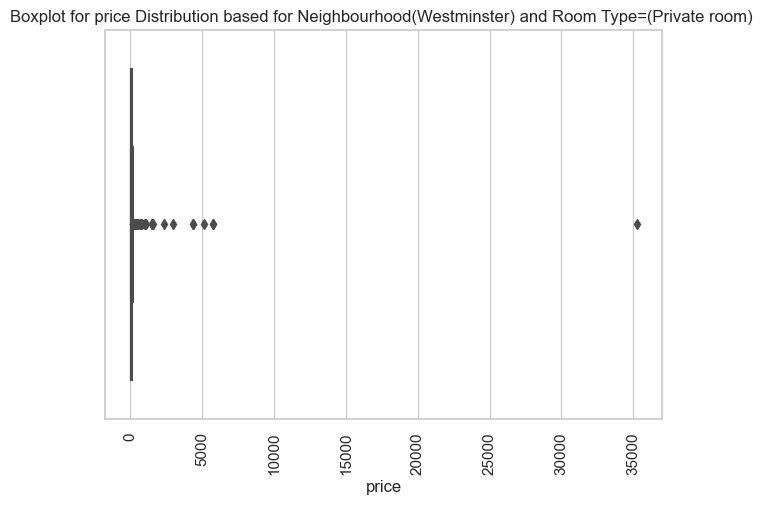

In [37]:
#Before removing outlier for westminster 
test1=mergedData.loc[ (mergedData['neighbourhood']=='Westminster') & (mergedData['room_type']=='Private room'),['price']  ].sort_values(by='price')
test1

sns.set(style='whitegrid')
 
sns.boxplot(x =test1['price'])
plt.title('Boxplot for price Distribution based for Neighbourhood(Westminster) and Room Type=(Private room) ')

plt.xticks(rotation=90)
plt.show()

In [38]:
#for removing outlier we consider neighbourhood as based and on top of neighbourhood we consider room type
neighbourhoodlist=['Islington',
 'Kensington and Chelsea',
 'Westminster',
 'Barnet',
 'Hounslow',
 'Richmond upon Thames',
 'Haringey',
 'Hackney',
 'Southwark',
 'Hammersmith and Fulham',
 'Waltham Forest',
 'Brent',
 'Camden',
 'Croydon',
 'Tower Hamlets',
 'Lambeth',
 'Merton',
 'Wandsworth',
 'Bromley',
 'Greenwich',
 'Ealing',
 'Newham',
 'Enfield',
 'Lewisham',
 'Barking and Dagenham',
 'Hillingdon',
 'Harrow',
 'Redbridge',
 'Kingston upon Thames',
 'Havering',
 'Bexley',
 'City of London',
 'Sutton']
RoomType=['Private room', 'Entire home/apt', 'Hotel room', 'Shared room']
for neighbourhood in neighbourhoodlist:
         for room in RoomType:
            #calculate first quartile
                 q1=mergedData.loc[ (mergedData['neighbourhood']==neighbourhood)& (mergedData['room_type']==room),['price']].quantile(0.25)
                #calculate third quartile
                 q3=mergedData.loc[ (mergedData['neighbourhood']==neighbourhood)& (mergedData['room_type']==room),['price']].quantile(0.75)
                 iqr=q3-q1
                 lower_boundary=pd.to_numeric(q1 -1.5 * iqr)
                 upperr_boundary=pd.to_numeric(q3 + 1.5 * iqr)
                    #here we are checking if lower boundary is below zero then we are assigning min value
                 if (lower_boundary[0] > 0):
                        lower_boundary =lower_boundary
                 else:
                        lower_boundary=mergedData.loc[ (mergedData['neighbourhood']==neighbourhood)& (mergedData['room_type']=='Private room'),['price']].min()
#here we are assigning the lower and upper boundary value 
                 mergedData.loc[(mergedData['neighbourhood']==neighbourhood)& (mergedData['room_type']==room) & (mergedData['price'] < lower_boundary[0]) ,['price']]  = lower_boundary[0]
                 mergedData.loc[(mergedData['neighbourhood']==neighbourhood)& (mergedData['room_type']==room) & (mergedData['price'] > upperr_boundary[0]) ,['price']]  = upperr_boundary[0]

       
            
             

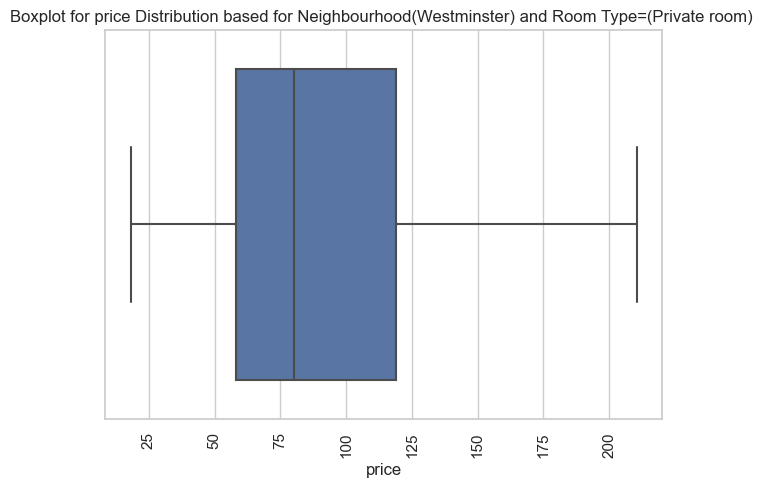

In [39]:
#After removing outlier for westminster 
test1=mergedData.loc[ (mergedData['neighbourhood']=='Westminster') & (mergedData['room_type']=='Private room'),['price']  ].sort_values(by='price')
test1

sns.set(style='whitegrid')
 
sns.boxplot(x =test1['price'])
plt.title('Boxplot for price Distribution based for Neighbourhood(Westminster) and Room Type=(Private room) ')

plt.xticks(rotation=90)
plt.show()

In [40]:
mergedData.to_csv('processedReviewData.csv')

In [41]:
len(listingData['neighbourhood'].unique())

33

In [42]:
listingData['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [43]:
len(listingData['room_type'].unique())

4

In [44]:
listingData.describe()

id       host_id  number_of_reviews  \
count  7.520500e+04  7.520500e+04       75205.000000   
mean   2.369761e+17  1.391314e+08          17.965388   
std    3.426338e+17  1.529766e+08          41.950554   
min    1.391300e+04  2.594000e+03           0.000000   
25%    1.983790e+07  1.997044e+07           1.000000   
50%    3.936197e+07  6.750080e+07           4.000000   
75%    6.563562e+17  2.248670e+08          17.000000   
max    8.463271e+17  5.050400e+08        1328.000000   

       calculated_host_listings_count  availability_365         price  
count                    75205.000000      75205.000000  75205.000000  
mean                        15.762582        113.095406    175.781730  
std                         55.550018        132.692241    487.472664  
min                          1.000000          0.000000      0.000000  
25%                          1.000000          0.000000     60.000000  
50%                          1.000000         47.000000    100.000000  
75%                          5.000000        228.000000    180.000000  
max                        501.000000        365.000000  70111.000000

In [45]:
listingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75205 entries, 0 to 75240
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              75205 non-null  int64 
 1   host_id                         75205 non-null  int64 
 2   host_name                       75205 non-null  object
 3   neighbourhood                   75205 non-null  object
 4   name                            75205 non-null  object
 5   room_type                       75205 non-null  object
 6   number_of_reviews               75205 non-null  int64 
 7   calculated_host_listings_count  75205 non-null  int64 
 8   availability_365                75205 non-null  int64 
 9   price                           75205 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 6.3+ MB


In [46]:
print(noReviewData.shape)

(0, 2)


# Descriptive Analytics

In [47]:
#loading the dataset of positive text and Negative text file:
p_file = open("positive.txt", "r")
positive_list = []
for line in p_file:
    stripped_line = line.strip()
    positive_list.append(stripped_line)
p_file. close()

#loading the dataset for negative text file
n_file = open("negative.txt", "r")
negative_list = []
for line in n_file:
    stripped_line = line.strip()
    negative_list.append(stripped_line)
n_file. close()

def positive_negative_checker(cleanW):
    #print(cleanW)
    #quit()
# comparing whether the comment is negative or neutral or positive
    positive_count = 0;
    negative_count = 0;
    for c in cleanW:
        if c in positive_list:
            positive_count = positive_count + 1
            
        elif c in negative_list:
            negative_count = negative_count + 1
   # print("Positive Count is: %d \n" %( positive_count))
   # print("Negative Count is: %d \n" %( negative_count))
    #quit()
    if negative_count > positive_count:
        return -1
    elif positive_count > negative_count:
        return 1
    else:
        return 0

In [48]:
import nltk
#We are defining the function getRanks that receive only one parameter: the class to analyse.
#import word_tokenize
import collections,string
from nltk import word_tokenize
def comment_analyser(sentence_list):
    positive_comment_count = 0
    neutral_comment_count = 0
    negative_comment_count = 0
    for i in range(len(sentence_list)):
        words = word_tokenize(sentence_list[i])  #Tokenise all values stored in revtextC
        words= [w.lower() for w in words] #Change to lower
        words= [re.sub(r'[^\w\s]','',w) for w in words] #remove punctuations
        words = [word for word in words if word.isalnum()]  # Remove conjuctions
        cleanW = [ele for ele in words if ele not in stopwords]
        
        comment_value = positive_negative_checker(cleanW)
        if comment_value == 1:
          positive_comment_count += 1
        elif comment_value == 0:
          neutral_comment_count += 1
        elif comment_value == -1:
          negative_comment_count += 1 

    analyzed_comment = [positive_comment_count, neutral_comment_count, negative_comment_count]
    print(analyzed_comment)
    return analyzed_comment

In [49]:
mergedData.insert(1,'positive_comment', 0)
mergedData.insert(2,'neutral_comment', 0)
mergedData.insert(3,'negative_comment', 0)

In [50]:
mergedData

comments  positive_comment  \
0      [My girlfriend and I hadn't known Alina before...                 0   
1      [We loved staying at Phillipa's place in Chels...                 0   
2      [Amazing location - great apartment, plenty of...                 0   
3      [The communication with Joe was very easy. We ...                 0   
4      [10,000 times better and cheaper than staying ...                 0   
...                                                  ...               ...   
56543         [nice room, central area with subway near]                 0   
56544  [Fantastic host.<br/>Great accommodation cant ...                 0   
56545  [Raffaella’s flat is quite spacious, we were v...                 0   
56546  [Superb stay & very convenient for access to w...                 0   
56547  [I booked Karen's home last minute and my good...                 0   

       neutral_comment  negative_comment                  id      host_id  \
0                    0                 0               13913      54730.0   
1                    0                 0               15400      60302.0   
2                    0                 0               17402      67564.0   
3                    0                 0               24328      41759.0   
4                    0                 0               25123     103583.0   
...                ...               ...                 ...          ...   
56543                0                 0  843038973630044774  441856679.0   
56544                0                 0  843203613361079569    2659258.0   
56545                0                 0  843405768455690290  494678357.0   
56546                0                 0  843524996925244561  498382945.0   
56547                0                 0  844058888885663384  504732658.0   

          host_name           neighbourhood  \
0             Alina               Islington   
1          Philippa  Kensington and Chelsea   
2               Liz             Westminster   
3               Joe              Wandsworth   
4             Grace                  Barnet   
...             ...                     ...   
56543  Moza Mostafa           Tower Hamlets   
56544        Graham                 Hackney   
56545     Raffaella  Kensington and Chelsea   
56546          Enzo               Islington   
56547         Karen                  Camden   

                                                    name        room_type  \
0                    Holiday London DB Room Let-on going     Private room   
1                    Bright Chelsea  Apartment. Chelsea!  Entire home/apt   
2                  Superb 3-Bed/2 Bath & Wifi: Trendy W1  Entire home/apt   
3      Battersea live/work artist house, garden communal  Entire home/apt   
4                      Clean big Room in London (Room 1)     Private room   
...                                                  ...              ...   
56543                                         Holybush D     Private room   
56544                               Canal side cute room     Private room   
56545          Luxury Flat in Kensington / Knightsbridge  Entire home/apt   
56546                  ¹ Central Private Room/Caledonian     Private room   
56547                        Primrose Hill Petite Palace  Entire home/apt   

       number_of_reviews  calculated_host_listings_count  availability_365  \
0                   41.0                             2.0             313.0   
1                   92.0                             1.0              76.0   
2                   54.0                             8.0             227.0   
3                   96.0                             1.0              26.0   
4                  129.0                             3.0               0.0   
...                  ...                             ...               ...   
56543                1.0                            12.0             146.0   
56544                1.0                             1.0             312

In [51]:
print(mergedData.iloc[1,0])

["We loved staying at Phillipa's place in Chelsea. The flat was lovely, and the neighborhood was great. Lots of fun shops, and close to two metro stops. We would love to stay there again!", 'A comfortable apartment conveniently located near shops, restaurants and tube stations. \r<br/>Philippa is a very helpful and friendly hostess. We would recommend her and her apartment to anyone.\r<br/>Thank you Philippa for an enjoyable holiday.', "I really enjoyed my week at Philippa's, the place is ideally situated in Chelsea, and she is a very kind host, I would definitely recommend that you stay there, I will again without any doubt. ", 'I am a little late reviewing this but it is important to me that I do.  Look, the place is in a great location and the neighbor was very friendly.  The place was perfectly comfortable and Philippa gave a lot of helpful information prior to our arrival in England.\r<br/>\r<br/>However, me and my girlfriend were robbed the second night we were there.  We went ou

In [52]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
count = 0
checking_value = 0
for i in range(len(mergedData)):
    
    checking_value = [] #gets the total positive comments, neutral comments and negative comments count
    checking_value = comment_analyser(mergedData.iloc[i,0])
    mergedData.iloc[i, 1] = checking_value[0] #put the total_positive_comment into positive_comment column
    mergedData.iloc[i, 2] = checking_value[1] #put the total_neutral_comment into neutral_comment column
    mergedData.iloc[i, 3] = checking_value[2] #put the total_negative_comment into negative_comment column
    print(i+1) # printing the total rows that have been proceeded

[39, 2, 0]
1
[85, 6, 1]
2
[45, 5, 4]
3
[83, 9, 4]
4
[124, 5, 0]
5
[16, 2, 1]
6
[96, 3, 0]
7
[502, 83, 17]
8
[1, 0, 0]
9
[15, 1, 1]
10
[9, 1, 0]
11
[1, 0, 0]
12
[80, 4, 0]
13
[17, 3, 1]
14
[66, 3, 2]
15
[105, 3, 2]
16
[2, 0, 0]
17
[472, 44, 14]
18
[196, 28, 3]
19
[114, 9, 2]
20
[1, 1, 0]
21
[93, 5, 4]
22
[208, 11, 6]
23
[409, 15, 3]
24
[88, 9, 2]
25
[110, 18, 4]
26
[112, 8, 1]
27
[2, 0, 0]
28
[84, 8, 1]
29
[66, 10, 2]
30
[143, 10, 13]
31
[65, 11, 3]
32
[78, 18, 7]
33
[22, 5, 2]
34
[12, 1, 0]
35
[2, 0, 0]
36
[65, 10, 1]
37
[136, 16, 5]
38
[32, 2, 0]
39
[70, 10, 2]
40
[123, 17, 3]
41
[57, 9, 4]
42
[2, 0, 0]
43
[57, 1, 0]
44
[153, 7, 1]
45
[11, 2, 0]
46
[139, 9, 3]
47
[82, 7, 1]
48
[10, 0, 0]
49
[15, 1, 1]
50
[197, 11, 5]
51
[177, 13, 3]
52
[57, 3, 4]
53
[58, 2, 0]
54
[339, 39, 6]
55
[108, 12, 6]
56
[438, 41, 11]
57
[120, 23, 7]
58
[53, 12, 6]
59
[1, 1, 0]
60
[113, 6, 1]
61
[382, 47, 19]
62
[8, 1, 0]
63
[35, 11, 5]
64
[256, 6, 5]
65
[183, 21, 12]
66
[33, 3, 2]
67
[152, 12, 4]
68
[21, 2, 0]

[74, 12, 1]
539
[28, 2, 0]
540
[81, 3, 0]
541
[270, 10, 4]
542
[38, 6, 1]
543
[72, 2, 4]
544
[55, 3, 1]
545
[91, 9, 3]
546
[19, 2, 0]
547
[36, 11, 3]
548
[11, 1, 0]
549
[23, 2, 0]
550
[198, 20, 11]
551
[11, 1, 0]
552
[23, 1, 0]
553
[2, 0, 0]
554
[19, 4, 1]
555
[53, 1, 0]
556
[6, 2, 0]
557
[4, 0, 0]
558
[9, 1, 0]
559
[270, 25, 7]
560
[20, 2, 1]
561
[4, 0, 0]
562
[25, 2, 1]
563
[86, 22, 10]
564
[4, 3, 1]
565
[204, 37, 16]
566
[105, 7, 5]
567
[44, 3, 2]
568
[21, 0, 1]
569
[85, 4, 0]
570
[86, 8, 4]
571
[50, 7, 0]
572
[12, 2, 0]
573
[18, 0, 0]
574
[125, 22, 13]
575
[343, 20, 8]
576
[11, 0, 0]
577
[12, 0, 0]
578
[264, 27, 10]
579
[22, 4, 0]
580
[146, 9, 1]
581
[48, 4, 2]
582
[61, 4, 1]
583
[6, 1, 0]
584
[59, 3, 1]
585
[8, 1, 0]
586
[145, 12, 2]
587
[8, 1, 1]
588
[9, 1, 0]
589
[78, 7, 3]
590
[16, 3, 0]
591
[6, 0, 0]
592
[37, 1, 1]
593
[110, 37, 9]
594
[52, 2, 3]
595
[25, 4, 1]
596
[6, 2, 0]
597
[3, 0, 0]
598
[70, 7, 0]
599
[52, 10, 6]
600
[8, 1, 0]
601
[33, 11, 1]
602
[461, 39, 23]
603
[29, 4

[45, 1, 0]
1065
[4, 0, 0]
1066
[37, 2, 1]
1067
[30, 7, 2]
1068
[6, 6, 0]
1069
[161, 20, 2]
1070
[7, 0, 0]
1071
[87, 9, 1]
1072
[331, 23, 6]
1073
[161, 26, 7]
1074
[15, 2, 0]
1075
[33, 0, 0]
1076
[94, 11, 6]
1077
[11, 1, 0]
1078
[39, 7, 2]
1079
[4, 0, 0]
1080
[21, 2, 1]
1081
[30, 4, 1]
1082
[13, 0, 0]
1083
[31, 1, 0]
1084
[28, 1, 0]
1085
[183, 5, 3]
1086
[9, 1, 0]
1087
[16, 3, 0]
1088
[19, 0, 1]
1089
[51, 2, 0]
1090
[227, 12, 3]
1091
[52, 3, 0]
1092
[102, 4, 2]
1093
[19, 1, 2]
1094
[32, 5, 1]
1095
[53, 4, 1]
1096
[35, 0, 0]
1097
[61, 6, 0]
1098
[80, 5, 2]
1099
[45, 3, 0]
1100
[7, 2, 0]
1101
[86, 9, 4]
1102
[29, 5, 1]
1103
[82, 10, 0]
1104
[142, 12, 14]
1105
[39, 1, 0]
1106
[229, 25, 14]
1107
[98, 7, 2]
1108
[112, 7, 1]
1109
[103, 6, 1]
1110
[10, 3, 0]
1111
[6, 0, 0]
1112
[34, 4, 0]
1113
[45, 3, 0]
1114
[50, 2, 1]
1115
[25, 3, 0]
1116
[4, 0, 0]
1117
[60, 3, 4]
1118
[1, 0, 0]
1119
[8, 1, 0]
1120
[108, 17, 7]
1121
[3, 1, 0]
1122
[3, 0, 0]
1123
[124, 15, 6]
1124
[58, 2, 0]
1125
[0, 1, 0]
11

[211, 11, 4]
1577
[2, 0, 0]
1578
[1, 2, 0]
1579
[18, 2, 1]
1580
[1, 2, 2]
1581
[5, 0, 0]
1582
[8, 0, 0]
1583
[11, 0, 0]
1584
[38, 2, 0]
1585
[29, 2, 0]
1586
[28, 14, 5]
1587
[227, 21, 10]
1588
[338, 19, 8]
1589
[20, 2, 0]
1590
[19, 2, 0]
1591
[53, 8, 0]
1592
[68, 21, 10]
1593
[32, 2, 1]
1594
[76, 4, 3]
1595
[19, 3, 0]
1596
[14, 2, 0]
1597
[3, 0, 0]
1598
[17, 1, 1]
1599
[55, 10, 2]
1600
[3, 1, 0]
1601
[6, 2, 0]
1602
[11, 0, 0]
1603
[2, 0, 0]
1604
[77, 21, 4]
1605
[23, 0, 1]
1606
[62, 5, 1]
1607
[7, 2, 0]
1608
[99, 16, 8]
1609
[3, 0, 0]
1610
[38, 8, 2]
1611
[33, 5, 0]
1612
[62, 7, 2]
1613
[74, 8, 2]
1614
[132, 19, 6]
1615
[19, 0, 0]
1616
[39, 5, 1]
1617
[27, 6, 2]
1618
[103, 7, 0]
1619
[65, 3, 0]
1620
[22, 3, 1]
1621
[24, 3, 0]
1622
[1, 0, 0]
1623
[19, 2, 1]
1624
[69, 13, 0]
1625
[16, 7, 1]
1626
[18, 2, 0]
1627
[29, 2, 0]
1628
[12, 2, 0]
1629
[62, 1, 1]
1630
[301, 35, 4]
1631
[12, 1, 0]
1632
[2, 1, 0]
1633
[17, 2, 1]
1634
[2, 1, 0]
1635
[2, 0, 0]
1636
[2, 3, 0]
1637
[5, 0, 0]
1638
[24, 8

[126, 13, 5]
2089
[7, 0, 0]
2090
[87, 4, 1]
2091
[39, 5, 3]
2092
[25, 3, 1]
2093
[1, 0, 0]
2094
[1, 0, 0]
2095
[51, 4, 0]
2096
[33, 3, 1]
2097
[146, 25, 9]
2098
[26, 1, 0]
2099
[49, 4, 2]
2100
[5, 0, 0]
2101
[53, 2, 0]
2102
[5, 0, 0]
2103
[80, 11, 4]
2104
[89, 10, 1]
2105
[15, 3, 1]
2106
[60, 4, 0]
2107
[1, 0, 0]
2108
[17, 1, 1]
2109
[54, 0, 1]
2110
[15, 2, 0]
2111
[18, 5, 0]
2112
[85, 9, 3]
2113
[11, 2, 0]
2114
[13, 1, 1]
2115
[8, 1, 0]
2116
[18, 0, 2]
2117
[123, 13, 2]
2118
[16, 2, 0]
2119
[20, 5, 0]
2120
[2, 0, 0]
2121
[21, 2, 0]
2122
[26, 0, 2]
2123
[198, 29, 9]
2124
[17, 1, 2]
2125
[33, 0, 0]
2126
[173, 36, 8]
2127
[101, 8, 5]
2128
[32, 0, 1]
2129
[16, 3, 0]
2130
[2, 1, 0]
2131
[11, 1, 0]
2132
[59, 3, 1]
2133
[3, 1, 0]
2134
[78, 0, 3]
2135
[32, 3, 1]
2136
[77, 4, 1]
2137
[6, 0, 0]
2138
[219, 21, 3]
2139
[2, 0, 0]
2140
[4, 0, 0]
2141
[27, 3, 0]
2142
[1, 1, 0]
2143
[3, 0, 0]
2144
[13, 1, 0]
2145
[19, 1, 0]
2146
[9, 3, 3]
2147
[6, 0, 0]
2148
[40, 3, 0]
2149
[84, 2, 0]
2150
[142, 18, 

[70, 18, 5]
2604
[13, 1, 0]
2605
[3, 0, 0]
2606
[10, 0, 0]
2607
[1, 0, 0]
2608
[11, 2, 0]
2609
[16, 2, 0]
2610
[105, 15, 5]
2611
[1, 2, 1]
2612
[37, 2, 0]
2613
[84, 14, 3]
2614
[14, 2, 0]
2615
[202, 12, 6]
2616
[4, 2, 0]
2617
[9, 5, 0]
2618
[14, 0, 0]
2619
[2, 0, 0]
2620
[4, 0, 0]
2621
[165, 8, 4]
2622
[7, 2, 0]
2623
[162, 15, 0]
2624
[7, 0, 0]
2625
[3, 1, 1]
2626
[190, 25, 10]
2627
[2, 0, 0]
2628
[92, 5, 2]
2629
[112, 8, 3]
2630
[64, 19, 2]
2631
[41, 8, 3]
2632
[41, 0, 0]
2633
[164, 21, 9]
2634
[22, 2, 0]
2635
[3, 0, 0]
2636
[2, 0, 0]
2637
[12, 0, 0]
2638
[20, 5, 1]
2639
[30, 3, 1]
2640
[12, 1, 2]
2641
[33, 3, 0]
2642
[54, 8, 2]
2643
[8, 1, 0]
2644
[12, 1, 0]
2645
[54, 6, 2]
2646
[7, 1, 1]
2647
[47, 6, 3]
2648
[24, 0, 0]
2649
[17, 3, 0]
2650
[1, 0, 0]
2651
[3, 1, 0]
2652
[20, 4, 0]
2653
[251, 36, 14]
2654
[34, 3, 1]
2655
[16, 3, 0]
2656
[29, 1, 0]
2657
[4, 0, 0]
2658
[60, 8, 1]
2659
[13, 0, 0]
2660
[1, 1, 0]
2661
[2, 0, 0]
2662
[14, 1, 0]
2663
[7, 1, 1]
2664
[11, 0, 0]
2665
[48, 0, 2]

[144, 8, 5]
3119
[30, 1, 1]
3120
[20, 2, 0]
3121
[2, 0, 0]
3122
[27, 1, 1]
3123
[37, 2, 1]
3124
[96, 6, 1]
3125
[8, 1, 0]
3126
[23, 0, 0]
3127
[62, 3, 0]
3128
[11, 2, 0]
3129
[4, 0, 0]
3130
[19, 9, 6]
3131
[0, 1, 0]
3132
[9, 0, 0]
3133
[59, 2, 1]
3134
[5, 1, 0]
3135
[39, 1, 0]
3136
[437, 83, 20]
3137
[1, 0, 0]
3138
[1, 0, 0]
3139
[10, 0, 0]
3140
[0, 1, 0]
3141
[206, 26, 9]
3142
[17, 4, 1]
3143
[10, 4, 0]
3144
[8, 0, 0]
3145
[5, 1, 0]
3146
[172, 45, 4]
3147
[19, 0, 0]
3148
[24, 4, 1]
3149
[37, 2, 0]
3150
[8, 2, 0]
3151
[10, 0, 0]
3152
[43, 8, 1]
3153
[129, 11, 6]
3154
[85, 5, 1]
3155
[3, 2, 0]
3156
[12, 8, 0]
3157
[5, 4, 0]
3158
[21, 0, 2]
3159
[18, 7, 1]
3160
[18, 3, 3]
3161
[15, 0, 0]
3162
[74, 1, 0]
3163
[1, 0, 0]
3164
[5, 0, 0]
3165
[22, 7, 4]
3166
[435, 48, 8]
3167
[469, 61, 25]
3168
[55, 5, 1]
3169
[41, 4, 2]
3170
[58, 12, 2]
3171
[3, 0, 0]
3172
[3, 0, 0]
3173
[62, 5, 1]
3174
[10, 1, 0]
3175
[18, 5, 0]
3176
[12, 3, 0]
3177
[3, 1, 0]
3178
[18, 3, 1]
3179
[8, 0, 0]
3180
[1, 0, 1]
31

[92, 19, 3]
3638
[1, 0, 0]
3639
[9, 0, 0]
3640
[5, 0, 0]
3641
[12, 6, 1]
3642
[52, 2, 0]
3643
[12, 1, 1]
3644
[100, 7, 2]
3645
[25, 2, 0]
3646
[103, 5, 2]
3647
[2, 0, 1]
3648
[46, 6, 2]
3649
[37, 8, 0]
3650
[2, 0, 0]
3651
[3, 0, 0]
3652
[18, 7, 2]
3653
[3, 1, 0]
3654
[20, 3, 1]
3655
[160, 13, 9]
3656
[10, 0, 0]
3657
[30, 2, 1]
3658
[2, 0, 0]
3659
[1, 1, 0]
3660
[3, 0, 0]
3661
[12, 1, 0]
3662
[128, 5, 2]
3663
[7, 13, 0]
3664
[172, 13, 12]
3665
[25, 0, 0]
3666
[0, 1, 0]
3667
[59, 5, 2]
3668
[64, 6, 1]
3669
[85, 6, 2]
3670
[22, 4, 1]
3671
[150, 22, 10]
3672
[75, 4, 0]
3673
[16, 2, 1]
3674
[36, 1, 3]
3675
[214, 21, 4]
3676
[63, 6, 3]
3677
[400, 20, 2]
3678
[63, 3, 3]
3679
[5, 0, 0]
3680
[34, 7, 1]
3681
[1, 0, 0]
3682
[6, 0, 0]
3683
[9, 0, 0]
3684
[34, 4, 1]
3685
[11, 3, 0]
3686
[30, 1, 0]
3687
[1, 0, 0]
3688
[3, 2, 0]
3689
[11, 1, 0]
3690
[1, 0, 0]
3691
[119, 20, 1]
3692
[2, 0, 0]
3693
[15, 2, 0]
3694
[40, 13, 1]
3695
[2, 0, 0]
3696
[69, 2, 2]
3697
[59, 5, 0]
3698
[11, 0, 0]
3699
[52, 4, 0

[19, 6, 0]
4163
[11, 2, 0]
4164
[10, 0, 0]
4165
[123, 6, 4]
4166
[3, 0, 0]
4167
[2, 0, 1]
4168
[62, 3, 0]
4169
[4, 0, 0]
4170
[27, 1, 0]
4171
[2, 0, 0]
4172
[22, 3, 0]
4173
[59, 17, 0]
4174
[65, 1, 1]
4175
[1, 0, 0]
4176
[84, 6, 1]
4177
[2, 0, 0]
4178
[1, 0, 0]
4179
[1, 0, 0]
4180
[7, 0, 0]
4181
[6, 1, 0]
4182
[59, 2, 3]
4183
[22, 0, 0]
4184
[4, 0, 0]
4185
[62, 9, 1]
4186
[9, 0, 1]
4187
[2, 3, 0]
4188
[82, 10, 4]
4189
[10, 3, 0]
4190
[1, 0, 0]
4191
[122, 6, 6]
4192
[36, 3, 0]
4193
[108, 11, 9]
4194
[158, 10, 7]
4195
[10, 0, 0]
4196
[2, 0, 0]
4197
[2, 0, 0]
4198
[84, 2, 2]
4199
[122, 35, 10]
4200
[47, 4, 1]
4201
[6, 0, 0]
4202
[11, 1, 0]
4203
[9, 2, 0]
4204
[12, 0, 0]
4205
[4, 2, 1]
4206
[20, 2, 0]
4207
[16, 1, 0]
4208
[16, 3, 2]
4209
[2, 0, 0]
4210
[70, 3, 0]
4211
[2, 0, 0]
4212
[13, 2, 0]
4213
[2, 1, 1]
4214
[81, 5, 0]
4215
[1, 0, 0]
4216
[4, 3, 3]
4217
[12, 1, 1]
4218
[137, 25, 8]
4219
[43, 2, 3]
4220
[34, 3, 3]
4221
[2, 0, 0]
4222
[1, 0, 0]
4223
[4, 0, 0]
4224
[76, 1, 0]
4225
[4, 0,

[5, 1, 0]
4688
[24, 8, 0]
4689
[20, 0, 0]
4690
[1, 0, 0]
4691
[32, 1, 0]
4692
[46, 8, 0]
4693
[0, 1, 0]
4694
[1, 0, 0]
4695
[0, 1, 0]
4696
[0, 2, 0]
4697
[1, 0, 0]
4698
[1, 0, 0]
4699
[2, 0, 0]
4700
[0, 1, 1]
4701
[8, 2, 0]
4702
[15, 7, 5]
4703
[1, 0, 0]
4704
[2, 0, 0]
4705
[2, 0, 0]
4706
[5, 0, 0]
4707
[212, 7, 4]
4708
[134, 18, 11]
4709
[5, 0, 0]
4710
[19, 6, 2]
4711
[12, 2, 0]
4712
[5, 3, 1]
4713
[10, 1, 0]
4714
[110, 9, 2]
4715
[5, 0, 0]
4716
[35, 8, 3]
4717
[6, 1, 1]
4718
[0, 0, 1]
4719
[63, 5, 1]
4720
[1, 0, 0]
4721
[1, 0, 0]
4722
[2, 0, 0]
4723
[1, 0, 0]
4724
[2, 0, 0]
4725
[4, 2, 1]
4726
[2, 0, 0]
4727
[20, 7, 0]
4728
[150, 15, 5]
4729
[30, 0, 0]
4730
[2, 0, 0]
4731
[1, 0, 0]
4732
[5, 0, 0]
4733
[35, 5, 1]
4734
[2, 0, 1]
4735
[4, 0, 0]
4736
[85, 12, 6]
4737
[0, 3, 0]
4738
[3, 1, 0]
4739
[16, 0, 0]
4740
[1, 0, 0]
4741
[3, 0, 2]
4742
[2, 1, 0]
4743
[50, 4, 1]
4744
[23, 4, 1]
4745
[32, 5, 1]
4746
[2, 0, 1]
4747
[72, 10, 1]
4748
[54, 4, 1]
4749
[11, 2, 0]
4750
[32, 1, 0]
4751
[28, 

[151, 28, 10]
5221
[41, 3, 1]
5222
[14, 3, 0]
5223
[2, 0, 0]
5224
[2, 0, 0]
5225
[4, 0, 0]
5226
[1, 0, 0]
5227
[15, 2, 0]
5228
[1, 0, 0]
5229
[2, 0, 0]
5230
[78, 9, 3]
5231
[1, 0, 0]
5232
[15, 1, 0]
5233
[8, 1, 0]
5234
[66, 2, 1]
5235
[4, 1, 0]
5236
[2, 0, 0]
5237
[2, 0, 0]
5238
[1, 0, 0]
5239
[4, 0, 0]
5240
[26, 1, 0]
5241
[64, 8, 5]
5242
[60, 8, 1]
5243
[0, 1, 0]
5244
[56, 10, 1]
5245
[4, 0, 0]
5246
[101, 16, 3]
5247
[32, 1, 0]
5248
[1, 0, 0]
5249
[100, 18, 1]
5250
[65, 3, 1]
5251
[4, 0, 0]
5252
[48, 5, 4]
5253
[9, 4, 0]
5254
[22, 9, 1]
5255
[3, 0, 0]
5256
[3, 0, 1]
5257
[1, 0, 0]
5258
[16, 4, 1]
5259
[6, 0, 0]
5260
[4, 0, 0]
5261
[42, 3, 3]
5262
[65, 13, 4]
5263
[11, 0, 0]
5264
[2, 0, 0]
5265
[7, 5, 1]
5266
[2, 0, 0]
5267
[1, 0, 0]
5268
[21, 1, 0]
5269
[20, 0, 0]
5270
[9, 0, 0]
5271
[65, 5, 1]
5272
[28, 3, 1]
5273
[2, 0, 0]
5274
[24, 2, 0]
5275
[28, 3, 0]
5276
[7, 2, 0]
5277
[6, 0, 0]
5278
[125, 14, 2]
5279
[24, 4, 0]
5280
[83, 2, 0]
5281
[9, 2, 0]
5282
[38, 3, 1]
5283
[2, 0, 1]
528

[64, 5, 2]
5749
[86, 2, 3]
5750
[59, 0, 0]
5751
[2, 0, 0]
5752
[43, 1, 0]
5753
[1, 0, 0]
5754
[1, 0, 0]
5755
[6, 0, 2]
5756
[4, 1, 0]
5757
[11, 1, 0]
5758
[1, 0, 0]
5759
[2, 0, 0]
5760
[10, 2, 0]
5761
[7, 2, 0]
5762
[12, 1, 0]
5763
[43, 2, 3]
5764
[7, 4, 1]
5765
[24, 1, 1]
5766
[1, 0, 0]
5767
[7, 0, 0]
5768
[1, 0, 0]
5769
[3, 1, 0]
5770
[49, 10, 3]
5771
[1, 0, 0]
5772
[4, 1, 1]
5773
[11, 2, 0]
5774
[1, 1, 0]
5775
[12, 2, 0]
5776
[162, 8, 1]
5777
[8, 1, 0]
5778
[3, 0, 0]
5779
[1, 0, 0]
5780
[11, 0, 2]
5781
[1, 2, 0]
5782
[4, 0, 0]
5783
[9, 2, 0]
5784
[3, 0, 0]
5785
[31, 3, 2]
5786
[2, 1, 0]
5787
[6, 0, 0]
5788
[20, 6, 0]
5789
[1, 0, 0]
5790
[196, 9, 1]
5791
[72, 5, 1]
5792
[44, 5, 0]
5793
[44, 4, 0]
5794
[10, 1, 1]
5795
[66, 4, 1]
5796
[31, 0, 0]
5797
[1, 1, 1]
5798
[3, 1, 0]
5799
[12, 0, 0]
5800
[15, 2, 0]
5801
[7, 0, 0]
5802
[166, 47, 9]
5803
[129, 6, 0]
5804
[1, 0, 0]
5805
[20, 2, 1]
5806
[0, 2, 0]
5807
[46, 5, 0]
5808
[3, 0, 0]
5809
[9, 0, 0]
5810
[37, 16, 3]
5811
[7, 0, 0]
5812
[3,

[36, 2, 0]
6285
[1, 1, 0]
6286
[0, 1, 0]
6287
[6, 0, 0]
6288
[19, 1, 0]
6289
[2, 2, 0]
6290
[8, 0, 0]
6291
[18, 0, 0]
6292
[21, 2, 0]
6293
[0, 1, 0]
6294
[8, 0, 0]
6295
[225, 10, 4]
6296
[42, 5, 1]
6297
[22, 4, 1]
6298
[80, 10, 1]
6299
[3, 1, 0]
6300
[0, 1, 0]
6301
[8, 0, 0]
6302
[49, 4, 0]
6303
[14, 4, 0]
6304
[36, 4, 2]
6305
[4, 1, 0]
6306
[0, 1, 0]
6307
[10, 1, 0]
6308
[0, 1, 0]
6309
[8, 2, 0]
6310
[5, 1, 0]
6311
[4, 1, 0]
6312
[19, 2, 0]
6313
[1, 0, 0]
6314
[32, 6, 2]
6315
[24, 1, 1]
6316
[1, 2, 0]
6317
[3, 0, 0]
6318
[3, 0, 0]
6319
[1, 0, 0]
6320
[72, 4, 3]
6321
[5, 0, 0]
6322
[1, 0, 0]
6323
[10, 8, 0]
6324
[2, 0, 0]
6325
[7, 2, 1]
6326
[1, 0, 0]
6327
[14, 4, 0]
6328
[56, 5, 1]
6329
[2, 0, 0]
6330
[21, 4, 0]
6331
[18, 4, 0]
6332
[53, 5, 0]
6333
[1, 0, 0]
6334
[3, 0, 0]
6335
[66, 3, 2]
6336
[44, 0, 0]
6337
[74, 16, 3]
6338
[2, 0, 0]
6339
[36, 1, 1]
6340
[2, 0, 0]
6341
[111, 13, 6]
6342
[50, 4, 0]
6343
[1, 0, 0]
6344
[61, 4, 1]
6345
[105, 6, 1]
6346
[1, 1, 0]
6347
[14, 0, 0]
6348
[5

[265, 8, 4]
6817
[287, 27, 8]
6818
[3, 0, 0]
6819
[1, 0, 1]
6820
[133, 13, 3]
6821
[1, 0, 0]
6822
[98, 2, 0]
6823
[24, 2, 0]
6824
[7, 0, 0]
6825
[59, 2, 0]
6826
[2, 0, 2]
6827
[7, 0, 0]
6828
[12, 1, 1]
6829
[1, 0, 0]
6830
[41, 1, 2]
6831
[26, 2, 0]
6832
[13, 4, 0]
6833
[10, 2, 1]
6834
[7, 1, 1]
6835
[2, 1, 0]
6836
[6, 1, 0]
6837
[1, 0, 0]
6838
[83, 2, 11]
6839
[1, 0, 0]
6840
[37, 4, 0]
6841
[21, 2, 1]
6842
[72, 14, 4]
6843
[23, 0, 1]
6844
[2, 0, 0]
6845
[5, 1, 0]
6846
[1, 0, 0]
6847
[1, 0, 0]
6848
[14, 1, 0]
6849
[38, 5, 3]
6850
[5, 2, 0]
6851
[6, 2, 1]
6852
[53, 1, 0]
6853
[74, 2, 0]
6854
[0, 0, 1]
6855
[24, 1, 0]
6856
[5, 0, 0]
6857
[13, 1, 0]
6858
[30, 2, 1]
6859
[1, 0, 0]
6860
[16, 4, 1]
6861
[35, 3, 1]
6862
[28, 1, 2]
6863
[63, 7, 0]
6864
[22, 2, 1]
6865
[4, 1, 0]
6866
[77, 11, 7]
6867
[240, 17, 7]
6868
[158, 5, 2]
6869
[3, 1, 0]
6870
[1, 0, 0]
6871
[1, 0, 0]
6872
[2, 0, 1]
6873
[44, 3, 0]
6874
[37, 1, 3]
6875
[0, 1, 0]
6876
[0, 3, 0]
6877
[31, 5, 0]
6878
[6, 2, 2]
6879
[4, 0, 1]


[165, 24, 5]
7341
[19, 3, 2]
7342
[14, 0, 0]
7343
[1, 0, 0]
7344
[24, 1, 0]
7345
[3, 1, 0]
7346
[337, 17, 4]
7347
[19, 0, 0]
7348
[143, 3, 1]
7349
[38, 2, 0]
7350
[40, 1, 1]
7351
[1, 0, 0]
7352
[1, 2, 0]
7353
[12, 0, 0]
7354
[188, 38, 19]
7355
[1, 0, 0]
7356
[22, 1, 1]
7357
[197, 34, 20]
7358
[44, 14, 6]
7359
[19, 1, 0]
7360
[18, 1, 1]
7361
[12, 0, 0]
7362
[35, 1, 0]
7363
[8, 0, 0]
7364
[79, 3, 2]
7365
[7, 1, 0]
7366
[1, 0, 0]
7367
[1, 0, 0]
7368
[54, 8, 0]
7369
[8, 1, 0]
7370
[43, 7, 1]
7371
[10, 0, 0]
7372
[1, 0, 0]
7373
[49, 2, 1]
7374
[23, 4, 1]
7375
[6, 0, 0]
7376
[122, 21, 7]
7377
[2, 0, 0]
7378
[69, 4, 0]
7379
[35, 4, 1]
7380
[2, 0, 0]
7381
[1, 0, 0]
7382
[22, 1, 1]
7383
[6, 1, 0]
7384
[1, 0, 0]
7385
[1, 0, 0]
7386
[13, 4, 0]
7387
[0, 1, 0]
7388
[75, 9, 2]
7389
[22, 2, 0]
7390
[76, 3, 2]
7391
[31, 7, 0]
7392
[1, 2, 0]
7393
[40, 3, 0]
7394
[116, 20, 13]
7395
[2, 0, 0]
7396
[45, 9, 5]
7397
[191, 21, 2]
7398
[3, 1, 0]
7399
[23, 0, 0]
7400
[44, 6, 6]
7401
[2, 0, 0]
7402
[0, 1, 0]
74

[5, 0, 1]
7865
[270, 32, 5]
7866
[36, 3, 1]
7867
[56, 9, 0]
7868
[65, 4, 2]
7869
[116, 5, 2]
7870
[0, 1, 0]
7871
[7, 1, 1]
7872
[37, 8, 1]
7873
[0, 1, 0]
7874
[13, 0, 0]
7875
[1, 0, 0]
7876
[2, 0, 0]
7877
[4, 0, 0]
7878
[4, 0, 0]
7879
[1, 0, 0]
7880
[34, 9, 2]
7881
[11, 3, 1]
7882
[54, 8, 3]
7883
[42, 8, 4]
7884
[60, 9, 4]
7885
[46, 2, 0]
7886
[42, 14, 0]
7887
[41, 13, 3]
7888
[33, 15, 2]
7889
[35, 13, 4]
7890
[91, 8, 2]
7891
[14, 2, 2]
7892
[7, 1, 0]
7893
[60, 17, 9]
7894
[1, 2, 0]
7895
[146, 15, 6]
7896
[135, 7, 2]
7897
[19, 1, 0]
7898
[48, 2, 1]
7899
[12, 0, 0]
7900
[95, 8, 6]
7901
[74, 3, 2]
7902
[1, 0, 0]
7903
[1, 1, 0]
7904
[33, 7, 2]
7905
[4, 1, 0]
7906
[132, 10, 4]
7907
[6, 2, 1]
7908
[6, 0, 0]
7909
[4, 0, 0]
7910
[68, 18, 0]
7911
[14, 0, 0]
7912
[25, 5, 2]
7913
[68, 4, 1]
7914
[1, 0, 0]
7915
[2, 0, 1]
7916
[3, 0, 0]
7917
[7, 1, 0]
7918
[0, 1, 0]
7919
[0, 1, 0]
7920
[2, 0, 0]
7921
[256, 12, 6]
7922
[3, 1, 0]
7923
[2, 2, 0]
7924
[1, 1, 0]
7925
[65, 1, 0]
7926
[0, 1, 0]
7927
[18,

[17, 8, 0]
8387
[173, 27, 7]
8388
[100, 24, 2]
8389
[1, 0, 0]
8390
[29, 2, 0]
8391
[104, 28, 8]
8392
[153, 18, 3]
8393
[7, 3, 1]
8394
[103, 10, 1]
8395
[5, 0, 0]
8396
[65, 7, 3]
8397
[58, 10, 3]
8398
[32, 2, 0]
8399
[2, 0, 0]
8400
[59, 8, 3]
8401
[36, 6, 6]
8402
[8, 1, 0]
8403
[121, 17, 1]
8404
[27, 4, 3]
8405
[172, 15, 2]
8406
[3, 0, 0]
8407
[68, 12, 12]
8408
[168, 15, 2]
8409
[70, 7, 0]
8410
[1, 1, 0]
8411
[95, 5, 1]
8412
[18, 5, 1]
8413
[5, 1, 0]
8414
[259, 5, 1]
8415
[5, 2, 0]
8416
[49, 5, 0]
8417
[12, 5, 1]
8418
[14, 5, 0]
8419
[3, 0, 0]
8420
[74, 13, 5]
8421
[65, 8, 2]
8422
[3, 0, 0]
8423
[2, 0, 0]
8424
[5, 1, 0]
8425
[34, 1, 1]
8426
[0, 1, 0]
8427
[52, 3, 0]
8428
[0, 1, 0]
8429
[7, 0, 0]
8430
[4, 1, 0]
8431
[2, 0, 0]
8432
[9, 1, 0]
8433
[46, 8, 1]
8434
[1, 1, 0]
8435
[31, 1, 0]
8436
[4, 1, 0]
8437
[57, 7, 0]
8438
[2, 0, 0]
8439
[0, 1, 0]
8440
[55, 10, 5]
8441
[14, 1, 0]
8442
[1, 0, 0]
8443
[43, 5, 5]
8444
[21, 1, 0]
8445
[6, 0, 0]
8446
[68, 7, 1]
8447
[3, 1, 0]
8448
[16, 0, 0]
8

[6, 0, 0]
8909
[5, 4, 0]
8910
[1, 1, 0]
8911
[50, 24, 3]
8912
[10, 0, 0]
8913
[3, 2, 0]
8914
[7, 0, 0]
8915
[1, 0, 0]
8916
[113, 14, 2]
8917
[25, 2, 1]
8918
[2, 0, 0]
8919
[14, 1, 1]
8920
[5, 0, 0]
8921
[183, 19, 6]
8922
[1, 0, 0]
8923
[2, 0, 0]
8924
[56, 2, 0]
8925
[105, 5, 3]
8926
[10, 1, 1]
8927
[1, 0, 0]
8928
[3, 0, 0]
8929
[52, 3, 1]
8930
[69, 12, 1]
8931
[7, 1, 0]
8932
[6, 2, 0]
8933
[125, 7, 2]
8934
[27, 2, 0]
8935
[22, 5, 0]
8936
[13, 3, 2]
8937
[2, 1, 0]
8938
[27, 3, 1]
8939
[6, 4, 0]
8940
[17, 6, 0]
8941
[31, 5, 1]
8942
[3, 0, 0]
8943
[1, 0, 0]
8944
[1, 0, 0]
8945
[23, 2, 0]
8946
[2, 3, 0]
8947
[104, 14, 13]
8948
[28, 7, 2]
8949
[15, 4, 1]
8950
[17, 2, 0]
8951
[13, 0, 0]
8952
[2, 0, 0]
8953
[2, 1, 0]
8954
[2, 0, 0]
8955
[3, 0, 0]
8956
[11, 1, 0]
8957
[1, 0, 0]
8958
[268, 73, 20]
8959
[28, 20, 8]
8960
[5, 0, 0]
8961
[83, 25, 13]
8962
[118, 6, 2]
8963
[3, 1, 0]
8964
[93, 2, 0]
8965
[1, 0, 0]
8966
[7, 0, 0]
8967
[66, 8, 3]
8968
[5, 1, 0]
8969
[9, 1, 2]
8970
[7, 2, 0]
8971
[1, 0,

[143, 16, 3]
9443
[44, 4, 2]
9444
[80, 11, 3]
9445
[53, 0, 1]
9446
[22, 2, 1]
9447
[8, 0, 0]
9448
[31, 1, 0]
9449
[6, 0, 1]
9450
[4, 0, 0]
9451
[60, 3, 0]
9452
[47, 3, 1]
9453
[4, 1, 0]
9454
[2, 1, 1]
9455
[5, 0, 0]
9456
[43, 1, 0]
9457
[2, 0, 0]
9458
[1, 1, 0]
9459
[18, 0, 0]
9460
[12, 0, 0]
9461
[51, 5, 1]
9462
[3, 0, 0]
9463
[2, 0, 0]
9464
[0, 1, 0]
9465
[0, 1, 0]
9466
[39, 2, 1]
9467
[3, 0, 0]
9468
[2, 1, 0]
9469
[0, 1, 0]
9470
[1, 0, 1]
9471
[1, 2, 0]
9472
[4, 2, 0]
9473
[20, 3, 0]
9474
[2, 1, 0]
9475
[97, 8, 1]
9476
[2, 0, 0]
9477
[75, 7, 5]
9478
[1, 0, 0]
9479
[6, 0, 0]
9480
[78, 9, 2]
9481
[1, 0, 0]
9482
[17, 6, 2]
9483
[8, 1, 0]
9484
[0, 1, 0]
9485
[10, 6, 0]
9486
[24, 0, 0]
9487
[2, 0, 0]
9488
[1, 0, 0]
9489
[2, 1, 0]
9490
[4, 1, 0]
9491
[11, 5, 0]
9492
[1, 0, 0]
9493
[1, 0, 0]
9494
[30, 4, 1]
9495
[1, 1, 1]
9496
[20, 1, 0]
9497
[58, 10, 4]
9498
[48, 17, 2]
9499
[8, 3, 0]
9500
[0, 1, 0]
9501
[3, 0, 0]
9502
[0, 1, 0]
9503
[6, 1, 0]
9504
[1, 0, 0]
9505
[7, 1, 1]
9506
[180, 86, 

[129, 14, 1]
9965
[33, 0, 3]
9966
[11, 1, 0]
9967
[10, 4, 1]
9968
[33, 7, 0]
9969
[46, 1, 0]
9970
[5, 1, 0]
9971
[21, 0, 0]
9972
[43, 8, 0]
9973
[35, 6, 1]
9974
[61, 6, 2]
9975
[27, 5, 1]
9976
[9, 1, 0]
9977
[22, 8, 0]
9978
[1, 0, 0]
9979
[2, 1, 0]
9980
[14, 1, 1]
9981
[15, 2, 1]
9982
[4, 0, 0]
9983
[5, 2, 0]
9984
[24, 0, 0]
9985
[95, 16, 2]
9986
[33, 2, 0]
9987
[21, 2, 0]
9988
[22, 1, 2]
9989
[231, 35, 5]
9990
[89, 12, 2]
9991
[59, 7, 0]
9992
[68, 3, 0]
9993
[0, 1, 0]
9994
[26, 2, 0]
9995
[2, 0, 0]
9996
[27, 4, 0]
9997
[69, 11, 7]
9998
[42, 4, 0]
9999
[3, 0, 0]
10000
[54, 5, 0]
10001
[31, 3, 1]
10002
[0, 1, 0]
10003
[15, 0, 0]
10004
[2, 2, 0]
10005
[8, 3, 1]
10006
[61, 9, 1]
10007
[31, 1, 1]
10008
[5, 0, 0]
10009
[234, 16, 4]
10010
[0, 0, 1]
10011
[0, 2, 0]
10012
[82, 4, 0]
10013
[568, 105, 40]
10014
[3, 0, 0]
10015
[45, 7, 2]
10016
[10, 6, 0]
10017
[9, 11, 1]
10018
[207, 66, 13]
10019
[19, 4, 2]
10020
[31, 4, 1]
10021
[1, 0, 0]
10022
[2, 0, 0]
10023
[48, 5, 1]
10024
[109, 8, 3]
10025

[40, 2, 1]
10453
[25, 4, 1]
10454
[28, 7, 0]
10455
[44, 4, 0]
10456
[21, 2, 0]
10457
[16, 0, 0]
10458
[45, 3, 0]
10459
[13, 3, 0]
10460
[11, 0, 0]
10461
[5, 0, 0]
10462
[3, 1, 1]
10463
[1, 0, 0]
10464
[95, 9, 3]
10465
[39, 8, 1]
10466
[9, 1, 0]
10467
[38, 3, 1]
10468
[6, 1, 1]
10469
[18, 6, 1]
10470
[7, 0, 0]
10471
[10, 2, 0]
10472
[1, 1, 0]
10473
[6, 3, 2]
10474
[6, 0, 0]
10475
[0, 1, 0]
10476
[0, 2, 0]
10477
[68, 3, 0]
10478
[10, 2, 1]
10479
[4, 1, 0]
10480
[0, 1, 0]
10481
[8, 1, 0]
10482
[77, 5, 3]
10483
[1, 1, 0]
10484
[7, 2, 0]
10485
[10, 0, 0]
10486
[19, 1, 0]
10487
[14, 2, 1]
10488
[18, 2, 1]
10489
[16, 6, 0]
10490
[1, 1, 1]
10491
[9, 2, 1]
10492
[48, 8, 0]
10493
[22, 4, 0]
10494
[24, 3, 0]
10495
[37, 2, 2]
10496
[25, 2, 1]
10497
[46, 6, 1]
10498
[10, 2, 0]
10499
[61, 4, 1]
10500
[1, 0, 0]
10501
[6, 1, 0]
10502
[4, 3, 0]
10503
[6, 1, 1]
10504
[20, 1, 0]
10505
[23, 3, 0]
10506
[15, 1, 1]
10507
[26, 2, 1]
10508
[14, 1, 1]
10509
[16, 2, 0]
10510
[15, 3, 0]
10511
[14, 1, 1]
10512
[2

[53, 6, 0]
10950
[30, 0, 0]
10951
[3, 1, 0]
10952
[9, 1, 0]
10953
[324, 32, 1]
10954
[4, 0, 1]
10955
[4, 1, 0]
10956
[16, 0, 1]
10957
[18, 0, 1]
10958
[89, 9, 3]
10959
[21, 1, 2]
10960
[14, 3, 1]
10961
[18, 1, 0]
10962
[13, 4, 0]
10963
[20, 6, 3]
10964
[1, 0, 0]
10965
[79, 6, 2]
10966
[2, 0, 0]
10967
[13, 0, 0]
10968
[126, 17, 3]
10969
[4, 1, 0]
10970
[2, 3, 0]
10971
[54, 4, 2]
10972
[9, 1, 0]
10973
[25, 5, 3]
10974
[44, 1, 2]
10975
[42, 3, 2]
10976
[2, 0, 1]
10977
[0, 1, 0]
10978
[7, 4, 0]
10979
[4, 1, 0]
10980
[4, 0, 0]
10981
[22, 7, 1]
10982
[21, 1, 0]
10983
[3, 3, 0]
10984
[2, 0, 0]
10985
[1, 2, 0]
10986
[33, 8, 0]
10987
[16, 1, 0]
10988
[25, 1, 0]
10989
[1, 0, 0]
10990
[17, 2, 0]
10991
[24, 3, 3]
10992
[52, 6, 0]
10993
[35, 17, 1]
10994
[20, 6, 2]
10995
[21, 8, 2]
10996
[64, 18, 0]
10997
[33, 4, 1]
10998
[3, 0, 0]
10999
[7, 1, 0]
11000
[23, 9, 6]
11001
[16, 1, 0]
11002
[2, 0, 0]
11003
[43, 21, 6]
11004
[54, 16, 4]
11005
[28, 5, 5]
11006
[4, 0, 0]
11007
[2, 1, 0]
11008
[53, 18, 4]


[52, 2, 0]
11454
[1, 1, 0]
11455
[11, 0, 0]
11456
[47, 5, 1]
11457
[0, 1, 0]
11458
[26, 9, 0]
11459
[13, 2, 0]
11460
[79, 13, 2]
11461
[0, 1, 0]
11462
[0, 1, 0]
11463
[4, 2, 0]
11464
[68, 5, 0]
11465
[1, 0, 0]
11466
[2, 2, 0]
11467
[56, 3, 0]
11468
[3, 4, 1]
11469
[2, 0, 0]
11470
[6, 1, 0]
11471
[1, 0, 0]
11472
[32, 5, 2]
11473
[8, 2, 0]
11474
[4, 1, 0]
11475
[4, 0, 0]
11476
[31, 4, 0]
11477
[3, 1, 0]
11478
[0, 1, 0]
11479
[8, 1, 0]
11480
[14, 0, 0]
11481
[23, 0, 0]
11482
[10, 0, 1]
11483
[12, 0, 0]
11484
[8, 1, 0]
11485
[1, 2, 0]
11486
[5, 0, 0]
11487
[16, 5, 0]
11488
[1, 0, 0]
11489
[36, 7, 0]
11490
[20, 0, 0]
11491
[1, 0, 0]
11492
[28, 9, 2]
11493
[92, 11, 0]
11494
[3, 0, 0]
11495
[60, 8, 0]
11496
[27, 1, 0]
11497
[1, 0, 0]
11498
[2, 1, 0]
11499
[1, 0, 0]
11500
[66, 5, 5]
11501
[89, 19, 7]
11502
[6, 0, 0]
11503
[1, 0, 0]
11504
[26, 6, 1]
11505
[12, 4, 0]
11506
[7, 0, 0]
11507
[22, 1, 0]
11508
[11, 5, 2]
11509
[4, 0, 0]
11510
[72, 7, 2]
11511
[21, 6, 1]
11512
[61, 2, 3]
11513
[0, 1, 

[84, 24, 10]
11953
[21, 1, 0]
11954
[45, 6, 4]
11955
[43, 8, 0]
11956
[5, 0, 0]
11957
[107, 17, 3]
11958
[15, 0, 0]
11959
[8, 0, 0]
11960
[1, 0, 1]
11961
[4, 1, 0]
11962
[166, 9, 1]
11963
[165, 23, 4]
11964
[154, 14, 7]
11965
[18, 4, 0]
11966
[99, 12, 3]
11967
[214, 33, 6]
11968
[8, 3, 0]
11969
[11, 0, 0]
11970
[42, 4, 2]
11971
[4, 1, 2]
11972
[13, 2, 0]
11973
[4, 0, 0]
11974
[6, 2, 0]
11975
[53, 12, 5]
11976
[5, 1, 0]
11977
[42, 2, 1]
11978
[100, 5, 0]
11979
[14, 7, 3]
11980
[63, 3, 0]
11981
[58, 3, 2]
11982
[14, 1, 0]
11983
[19, 6, 0]
11984
[4, 0, 0]
11985
[47, 9, 0]
11986
[1, 0, 0]
11987
[139, 34, 9]
11988
[3, 0, 0]
11989
[2, 1, 0]
11990
[2, 2, 0]
11991
[5, 0, 0]
11992
[3, 0, 0]
11993
[83, 6, 5]
11994
[1, 0, 0]
11995
[25, 3, 1]
11996
[0, 1, 0]
11997
[8, 0, 0]
11998
[18, 6, 1]
11999
[3, 0, 0]
12000
[10, 3, 0]
12001
[67, 17, 6]
12002
[96, 29, 2]
12003
[1, 0, 0]
12004
[4, 0, 0]
12005
[137, 43, 12]
12006
[15, 1, 0]
12007
[6, 2, 2]
12008
[29, 1, 0]
12009
[7, 1, 0]
12010
[16, 11, 3]
12011

[53, 18, 8]
12444
[16, 0, 2]
12445
[9, 1, 0]
12446
[91, 17, 0]
12447
[4, 1, 0]
12448
[24, 2, 2]
12449
[4, 1, 0]
12450
[8, 3, 0]
12451
[85, 8, 5]
12452
[11, 2, 0]
12453
[6, 1, 0]
12454
[3, 0, 0]
12455
[16, 0, 0]
12456
[14, 1, 0]
12457
[72, 6, 0]
12458
[33, 3, 1]
12459
[2, 0, 0]
12460
[134, 8, 4]
12461
[1, 0, 0]
12462
[13, 1, 0]
12463
[6, 0, 0]
12464
[2, 1, 0]
12465
[1, 0, 0]
12466
[1, 3, 0]
12467
[33, 0, 0]
12468
[69, 3, 0]
12469
[5, 0, 0]
12470
[12, 5, 0]
12471
[25, 5, 1]
12472
[34, 7, 2]
12473
[2, 0, 0]
12474
[25, 3, 0]
12475
[6, 1, 0]
12476
[51, 5, 2]
12477
[35, 3, 3]
12478
[43, 1, 1]
12479
[8, 0, 1]
12480
[3, 1, 0]
12481
[67, 12, 0]
12482
[1, 0, 0]
12483
[28, 2, 0]
12484
[481, 55, 6]
12485
[32, 1, 0]
12486
[6, 1, 2]
12487
[6, 1, 1]
12488
[22, 5, 0]
12489
[32, 4, 0]
12490
[2, 1, 0]
12491
[3, 1, 1]
12492
[133, 3, 0]
12493
[7, 2, 0]
12494
[4, 2, 0]
12495
[2, 1, 0]
12496
[13, 2, 1]
12497
[74, 5, 2]
12498
[13, 0, 2]
12499
[32, 10, 4]
12500
[0, 1, 0]
12501
[11, 0, 0]
12502
[60, 7, 3]
1250

[122, 37, 4]
12937
[61, 0, 2]
12938
[4, 0, 0]
12939
[1, 2, 1]
12940
[14, 1, 0]
12941
[17, 5, 0]
12942
[0, 1, 0]
12943
[14, 4, 0]
12944
[19, 3, 1]
12945
[50, 7, 1]
12946
[46, 2, 0]
12947
[3, 0, 1]
12948
[50, 14, 2]
12949
[22, 3, 1]
12950
[49, 3, 0]
12951
[4, 1, 0]
12952
[3, 1, 0]
12953
[99, 6, 6]
12954
[11, 3, 0]
12955
[1, 1, 0]
12956
[2, 0, 0]
12957
[5, 2, 1]
12958
[0, 1, 0]
12959
[22, 2, 0]
12960
[52, 3, 0]
12961
[5, 1, 0]
12962
[18, 1, 0]
12963
[1, 2, 0]
12964
[4, 2, 0]
12965
[32, 4, 1]
12966
[25, 0, 0]
12967
[21, 9, 0]
12968
[5, 0, 0]
12969
[169, 35, 1]
12970
[10, 2, 0]
12971
[57, 23, 4]
12972
[99, 12, 1]
12973
[2, 0, 0]
12974
[4, 1, 0]
12975
[3, 1, 0]
12976
[3, 1, 0]
12977
[2, 1, 0]
12978
[1, 0, 0]
12979
[57, 5, 1]
12980
[14, 1, 1]
12981
[51, 5, 1]
12982
[56, 6, 0]
12983
[43, 4, 0]
12984
[17, 5, 2]
12985
[56, 5, 0]
12986
[7, 0, 0]
12987
[2, 0, 0]
12988
[10, 3, 1]
12989
[24, 3, 0]
12990
[14, 1, 1]
12991
[24, 11, 1]
12992
[29, 5, 0]
12993
[6, 0, 0]
12994
[45, 11, 1]
12995
[1, 0, 0]
1

[70, 6, 2]
13439
[15, 0, 1]
13440
[11, 2, 0]
13441
[70, 4, 1]
13442
[1, 1, 0]
13443
[41, 5, 3]
13444
[9, 2, 1]
13445
[1, 0, 0]
13446
[82, 15, 4]
13447
[151, 19, 9]
13448
[7, 1, 0]
13449
[7, 2, 0]
13450
[12, 3, 1]
13451
[13, 4, 2]
13452
[2, 0, 0]
13453
[123, 17, 7]
13454
[9, 0, 0]
13455
[33, 4, 1]
13456
[46, 11, 4]
13457
[3, 0, 0]
13458
[150, 68, 5]
13459
[8, 1, 0]
13460
[9, 3, 1]
13461
[7, 1, 0]
13462
[0, 1, 0]
13463
[25, 11, 2]
13464
[28, 0, 0]
13465
[1, 0, 0]
13466
[15, 1, 0]
13467
[40, 3, 0]
13468
[0, 1, 0]
13469
[22, 2, 3]
13470
[4, 0, 0]
13471
[131, 35, 10]
13472
[41, 4, 3]
13473
[4, 3, 0]
13474
[1, 1, 0]
13475
[3, 0, 0]
13476
[147, 14, 8]
13477
[24, 0, 0]
13478
[15, 1, 0]
13479
[37, 5, 4]
13480
[7, 0, 1]
13481
[34, 1, 1]
13482
[8, 0, 0]
13483
[0, 1, 0]
13484
[38, 3, 0]
13485
[1, 1, 0]
13486
[12, 2, 0]
13487
[30, 4, 1]
13488
[58, 4, 5]
13489
[4, 0, 0]
13490
[5, 1, 1]
13491
[1, 1, 0]
13492
[68, 4, 0]
13493
[9, 2, 0]
13494
[10, 4, 0]
13495
[2, 0, 0]
13496
[5, 0, 0]
13497
[129, 10, 2

[25, 3, 1]
13936
[1, 2, 0]
13937
[62, 6, 3]
13938
[0, 1, 0]
13939
[8, 1, 0]
13940
[4, 0, 0]
13941
[1, 1, 0]
13942
[39, 0, 2]
13943
[3, 0, 0]
13944
[1, 2, 0]
13945
[4, 0, 0]
13946
[2, 1, 0]
13947
[95, 5, 3]
13948
[0, 1, 0]
13949
[1, 1, 0]
13950
[3, 0, 1]
13951
[28, 2, 0]
13952
[8, 0, 0]
13953
[4, 1, 1]
13954
[7, 0, 0]
13955
[1, 1, 0]
13956
[80, 10, 2]
13957
[15, 4, 4]
13958
[2, 2, 0]
13959
[13, 0, 0]
13960
[21, 3, 2]
13961
[10, 2, 1]
13962
[1, 0, 0]
13963
[3, 0, 0]
13964
[1, 0, 1]
13965
[121, 4, 1]
13966
[58, 3, 3]
13967
[7, 1, 0]
13968
[0, 1, 0]
13969
[4, 0, 0]
13970
[63, 1, 1]
13971
[12, 2, 0]
13972
[167, 28, 2]
13973
[1, 1, 0]
13974
[14, 0, 0]
13975
[5, 1, 0]
13976
[35, 4, 0]
13977
[28, 4, 0]
13978
[40, 3, 1]
13979
[8, 3, 0]
13980
[54, 7, 0]
13981
[4, 0, 0]
13982
[0, 1, 0]
13983
[16, 1, 1]
13984
[1, 0, 0]
13985
[2, 0, 1]
13986
[1, 0, 0]
13987
[41, 12, 3]
13988
[2, 1, 0]
13989
[65, 14, 2]
13990
[4, 0, 0]
13991
[2, 0, 0]
13992
[59, 13, 6]
13993
[7, 1, 1]
13994
[82, 5, 0]
13995
[0, 1, 0

[223, 17, 3]
14437
[1, 0, 0]
14438
[28, 3, 1]
14439
[1, 1, 0]
14440
[51, 6, 2]
14441
[88, 20, 1]
14442
[8, 0, 0]
14443
[23, 1, 1]
14444
[1, 2, 0]
14445
[5, 1, 0]
14446
[28, 6, 2]
14447
[3, 0, 0]
14448
[147, 16, 5]
14449
[3, 1, 0]
14450
[71, 6, 1]
14451
[3, 1, 0]
14452
[10, 0, 0]
14453
[59, 6, 2]
14454
[66, 5, 2]
14455
[7, 3, 0]
14456
[1, 1, 0]
14457
[67, 14, 2]
14458
[1, 0, 0]
14459
[2, 3, 0]
14460
[1, 0, 0]
14461
[332, 21, 2]
14462
[1, 0, 0]
14463
[63, 14, 4]
14464
[16, 1, 1]
14465
[3, 1, 0]
14466
[5, 2, 0]
14467
[13, 1, 0]
14468
[68, 5, 2]
14469
[1, 0, 1]
14470
[66, 2, 0]
14471
[10, 1, 0]
14472
[4, 0, 0]
14473
[33, 3, 1]
14474
[1, 0, 0]
14475
[7, 1, 0]
14476
[73, 4, 2]
14477
[25, 5, 0]
14478
[21, 2, 1]
14479
[58, 3, 0]
14480
[18, 2, 1]
14481
[4, 1, 0]
14482
[5, 0, 0]
14483
[1, 0, 0]
14484
[4, 0, 0]
14485
[1, 0, 0]
14486
[8, 1, 0]
14487
[67, 8, 1]
14488
[1, 0, 0]
14489
[88, 7, 1]
14490
[1, 0, 0]
14491
[11, 0, 0]
14492
[1, 1, 0]
14493
[3, 1, 0]
14494
[57, 2, 0]
14495
[6, 0, 0]
14496
[1

[131, 54, 12]
14931
[55, 15, 1]
14932
[168, 70, 16]
14933
[31, 4, 1]
14934
[64, 3, 0]
14935
[2, 0, 0]
14936
[1, 0, 0]
14937
[1, 0, 0]
14938
[0, 1, 0]
14939
[9, 3, 1]
14940
[13, 4, 0]
14941
[1, 1, 0]
14942
[14, 2, 1]
14943
[78, 11, 2]
14944
[12, 3, 0]
14945
[133, 19, 3]
14946
[2, 1, 0]
14947
[1, 0, 0]
14948
[7, 1, 0]
14949
[8, 3, 0]
14950
[52, 6, 1]
14951
[2, 1, 0]
14952
[1, 0, 0]
14953
[33, 13, 3]
14954
[162, 36, 7]
14955
[1, 0, 0]
14956
[120, 39, 15]
14957
[3, 0, 0]
14958
[16, 6, 0]
14959
[23, 10, 1]
14960
[2, 1, 0]
14961
[0, 1, 0]
14962
[5, 0, 0]
14963
[1, 2, 0]
14964
[3, 3, 0]
14965
[1, 0, 0]
14966
[92, 3, 4]
14967
[26, 2, 1]
14968
[10, 1, 0]
14969
[2, 0, 0]
14970
[1, 1, 0]
14971
[3, 0, 0]
14972
[1, 0, 0]
14973
[6, 2, 0]
14974
[4, 0, 0]
14975
[16, 1, 0]
14976
[2, 0, 0]
14977
[7, 0, 0]
14978
[2, 1, 0]
14979
[11, 0, 1]
14980
[233, 45, 2]
14981
[25, 3, 1]
14982
[1, 1, 0]
14983
[22, 4, 0]
14984
[1, 0, 0]
14985
[4, 0, 0]
14986
[8, 1, 0]
14987
[55, 3, 3]
14988
[3, 0, 0]
14989
[1, 0, 0]
14

[96, 8, 4]
15431
[3, 1, 0]
15432
[2, 0, 0]
15433
[16, 6, 0]
15434
[20, 11, 2]
15435
[63, 16, 0]
15436
[1, 0, 0]
15437
[73, 3, 0]
15438
[14, 1, 0]
15439
[24, 4, 1]
15440
[33, 0, 1]
15441
[10, 10, 0]
15442
[2, 4, 0]
15443
[36, 0, 0]
15444
[36, 7, 1]
15445
[2, 0, 0]
15446
[192, 25, 4]
15447
[11, 3, 0]
15448
[4, 0, 0]
15449
[70, 4, 0]
15450
[1, 2, 0]
15451
[5, 0, 0]
15452
[10, 2, 1]
15453
[10, 4, 0]
15454
[6, 2, 0]
15455
[18, 2, 0]
15456
[87, 5, 1]
15457
[1, 1, 0]
15458
[0, 1, 0]
15459
[38, 11, 2]
15460
[1, 0, 0]
15461
[5, 2, 1]
15462
[16, 1, 1]
15463
[60, 20, 8]
15464
[23, 2, 0]
15465
[10, 5, 0]
15466
[1, 0, 0]
15467
[1, 0, 0]
15468
[42, 2, 4]
15469
[50, 0, 0]
15470
[37, 1, 1]
15471
[1, 0, 0]
15472
[1, 0, 0]
15473
[57, 3, 3]
15474
[19, 5, 1]
15475
[52, 2, 0]
15476
[103, 9, 3]
15477
[7, 0, 0]
15478
[41, 2, 1]
15479
[2, 0, 0]
15480
[18, 3, 1]
15481
[57, 3, 2]
15482
[10, 0, 0]
15483
[3, 1, 0]
15484
[1, 2, 0]
15485
[0, 1, 0]
15486
[1, 1, 0]
15487
[1, 0, 0]
15488
[1, 0, 0]
15489
[1, 0, 0]
1549

[80, 4, 0]
15933
[0, 1, 0]
15934
[13, 4, 0]
15935
[8, 0, 0]
15936
[5, 1, 2]
15937
[2, 0, 0]
15938
[1, 0, 0]
15939
[30, 2, 1]
15940
[1, 1, 0]
15941
[6, 1, 1]
15942
[1, 1, 0]
15943
[2, 0, 0]
15944
[1, 0, 0]
15945
[10, 2, 0]
15946
[15, 1, 1]
15947
[49, 2, 0]
15948
[150, 13, 2]
15949
[26, 3, 0]
15950
[87, 4, 4]
15951
[44, 5, 0]
15952
[8, 0, 0]
15953
[23, 2, 1]
15954
[78, 7, 1]
15955
[3, 0, 0]
15956
[56, 2, 0]
15957
[1, 0, 0]
15958
[12, 4, 0]
15959
[33, 8, 0]
15960
[40, 9, 1]
15961
[41, 1, 0]
15962
[17, 6, 0]
15963
[8, 2, 1]
15964
[93, 11, 3]
15965
[5, 2, 0]
15966
[2, 0, 0]
15967
[23, 4, 0]
15968
[1, 2, 0]
15969
[12, 0, 0]
15970
[1, 0, 0]
15971
[1, 0, 0]
15972
[105, 7, 5]
15973
[6, 0, 0]
15974
[9, 1, 0]
15975
[11, 0, 0]
15976
[41, 0, 2]
15977
[2, 0, 0]
15978
[9, 3, 0]
15979
[5, 1, 0]
15980
[8, 2, 0]
15981
[3, 0, 0]
15982
[0, 1, 0]
15983
[1, 0, 0]
15984
[20, 3, 1]
15985
[1, 0, 1]
15986
[66, 9, 3]
15987
[1, 2, 0]
15988
[5, 0, 0]
15989
[1, 0, 0]
15990
[43, 2, 0]
15991
[2, 1, 0]
15992
[65, 9, 0

[29, 3, 0]
16432
[71, 8, 4]
16433
[1, 0, 0]
16434
[0, 1, 0]
16435
[2, 0, 0]
16436
[28, 10, 1]
16437
[122, 15, 7]
16438
[15, 1, 0]
16439
[88, 18, 7]
16440
[12, 2, 0]
16441
[7, 0, 0]
16442
[28, 4, 0]
16443
[4, 1, 1]
16444
[7, 3, 0]
16445
[30, 2, 2]
16446
[33, 1, 0]
16447
[26, 3, 0]
16448
[12, 2, 0]
16449
[10, 1, 0]
16450
[4, 0, 0]
16451
[1, 0, 0]
16452
[5, 3, 0]
16453
[149, 21, 4]
16454
[14, 2, 0]
16455
[2, 0, 0]
16456
[12, 5, 1]
16457
[21, 3, 0]
16458
[194, 44, 6]
16459
[0, 1, 0]
16460
[56, 3, 3]
16461
[1, 0, 0]
16462
[30, 13, 4]
16463
[1, 0, 0]
16464
[27, 5, 1]
16465
[75, 7, 1]
16466
[1, 0, 0]
16467
[27, 0, 0]
16468
[7, 5, 0]
16469
[29, 2, 0]
16470
[2, 0, 0]
16471
[12, 1, 1]
16472
[7, 0, 0]
16473
[5, 2, 0]
16474
[1, 0, 0]
16475
[14, 0, 0]
16476
[0, 1, 0]
16477
[15, 0, 0]
16478
[32, 0, 0]
16479
[6, 1, 0]
16480
[1, 0, 0]
16481
[4, 0, 0]
16482
[42, 3, 0]
16483
[47, 1, 0]
16484
[4, 0, 0]
16485
[16, 3, 0]
16486
[37, 4, 2]
16487
[16, 2, 0]
16488
[5, 1, 0]
16489
[19, 5, 0]
16490
[7, 0, 0]
164

[50, 5, 3]
16929
[4, 5, 0]
16930
[133, 20, 8]
16931
[3, 1, 0]
16932
[0, 6, 0]
16933
[40, 2, 0]
16934
[2, 1, 0]
16935
[48, 4, 0]
16936
[13, 1, 0]
16937
[2, 0, 0]
16938
[0, 1, 0]
16939
[17, 1, 0]
16940
[3, 0, 0]
16941
[0, 1, 0]
16942
[12, 0, 0]
16943
[1, 0, 0]
16944
[81, 7, 2]
16945
[1, 0, 1]
16946
[5, 0, 0]
16947
[31, 4, 1]
16948
[10, 1, 1]
16949
[1, 0, 1]
16950
[0, 1, 0]
16951
[2, 2, 0]
16952
[20, 3, 0]
16953
[2, 0, 0]
16954
[45, 6, 5]
16955
[3, 0, 0]
16956
[18, 8, 1]
16957
[198, 10, 4]
16958
[1, 0, 0]
16959
[9, 0, 1]
16960
[12, 1, 1]
16961
[61, 5, 1]
16962
[0, 1, 0]
16963
[3, 0, 0]
16964
[1, 1, 0]
16965
[39, 0, 1]
16966
[0, 1, 0]
16967
[1, 1, 0]
16968
[147, 43, 9]
16969
[3, 0, 0]
16970
[11, 1, 0]
16971
[0, 1, 0]
16972
[15, 1, 0]
16973
[36, 2, 1]
16974
[28, 0, 1]
16975
[58, 3, 1]
16976
[19, 1, 0]
16977
[8, 0, 0]
16978
[16, 4, 0]
16979
[13, 2, 0]
16980
[1, 0, 0]
16981
[1, 0, 0]
16982
[12, 1, 0]
16983
[110, 9, 1]
16984
[14, 0, 0]
16985
[1, 0, 0]
16986
[122, 8, 2]
16987
[37, 10, 3]
16988


[34, 9, 0]
17429
[27, 8, 1]
17430
[2, 1, 0]
17431
[1, 0, 0]
17432
[0, 1, 0]
17433
[11, 2, 0]
17434
[1, 0, 0]
17435
[2, 0, 0]
17436
[21, 4, 0]
17437
[21, 1, 0]
17438
[146, 7, 4]
17439
[5, 1, 0]
17440
[75, 7, 0]
17441
[39, 12, 0]
17442
[144, 15, 0]
17443
[5, 0, 1]
17444
[8, 3, 1]
17445
[1, 0, 0]
17446
[35, 1, 1]
17447
[0, 1, 0]
17448
[48, 7, 0]
17449
[10, 6, 1]
17450
[14, 1, 0]
17451
[18, 1, 0]
17452
[5, 1, 0]
17453
[11, 1, 0]
17454
[0, 1, 0]
17455
[48, 2, 1]
17456
[7, 0, 0]
17457
[15, 0, 0]
17458
[1, 0, 0]
17459
[0, 1, 0]
17460
[3, 0, 0]
17461
[1, 0, 0]
17462
[2, 1, 0]
17463
[0, 1, 0]
17464
[4, 0, 0]
17465
[1, 0, 0]
17466
[2, 0, 0]
17467
[99, 4, 1]
17468
[3, 0, 0]
17469
[5, 1, 0]
17470
[2, 0, 0]
17471
[20, 1, 0]
17472
[7, 1, 0]
17473
[4, 1, 0]
17474
[3, 1, 1]
17475
[1, 0, 0]
17476
[0, 1, 0]
17477
[6, 0, 0]
17478
[0, 2, 0]
17479
[4, 1, 0]
17480
[1, 0, 0]
17481
[37, 6, 5]
17482
[39, 2, 2]
17483
[28, 12, 0]
17484
[2, 1, 0]
17485
[1, 0, 0]
17486
[35, 7, 0]
17487
[8, 0, 0]
17488
[8, 0, 0]
17

[280, 15, 1]
17924
[1, 1, 0]
17925
[93, 36, 4]
17926
[5, 2, 0]
17927
[5, 1, 0]
17928
[13, 2, 0]
17929
[0, 1, 0]
17930
[11, 2, 1]
17931
[2, 2, 1]
17932
[2, 0, 0]
17933
[1, 1, 0]
17934
[1, 1, 0]
17935
[9, 1, 0]
17936
[23, 3, 1]
17937
[19, 6, 3]
17938
[0, 1, 0]
17939
[30, 2, 0]
17940
[15, 2, 1]
17941
[96, 27, 8]
17942
[13, 1, 1]
17943
[5, 1, 0]
17944
[85, 22, 13]
17945
[0, 1, 0]
17946
[53, 24, 4]
17947
[4, 1, 0]
17948
[11, 0, 0]
17949
[0, 1, 0]
17950
[2, 0, 0]
17951
[1, 0, 0]
17952
[2, 0, 1]
17953
[3, 0, 0]
17954
[6, 0, 0]
17955
[8, 0, 0]
17956
[2, 3, 0]
17957
[40, 5, 0]
17958
[27, 4, 2]
17959
[2, 0, 0]
17960
[10, 0, 0]
17961
[8, 2, 2]
17962
[78, 10, 3]
17963
[9, 0, 0]
17964
[1, 0, 0]
17965
[0, 1, 0]
17966
[86, 6, 0]
17967
[23, 5, 2]
17968
[3, 0, 0]
17969
[14, 0, 0]
17970
[6, 0, 0]
17971
[13, 0, 1]
17972
[18, 6, 0]
17973
[79, 7, 0]
17974
[21, 0, 0]
17975
[9, 3, 0]
17976
[7, 0, 0]
17977
[3, 3, 0]
17978
[1, 0, 0]
17979
[9, 0, 1]
17980
[12, 1, 0]
17981
[26, 1, 1]
17982
[150, 18, 3]
17983
[13

[122, 25, 5]
18418
[87, 6, 1]
18419
[5, 0, 0]
18420
[1, 0, 0]
18421
[59, 1, 0]
18422
[6, 0, 0]
18423
[8, 2, 0]
18424
[1, 0, 0]
18425
[2, 0, 0]
18426
[0, 1, 0]
18427
[5, 1, 1]
18428
[219, 43, 8]
18429
[182, 6, 0]
18430
[9, 1, 0]
18431
[21, 3, 2]
18432
[5, 0, 0]
18433
[0, 1, 0]
18434
[3, 1, 1]
18435
[12, 0, 0]
18436
[0, 1, 0]
18437
[1, 1, 0]
18438
[3, 0, 0]
18439
[3, 0, 0]
18440
[43, 1, 3]
18441
[11, 1, 1]
18442
[1, 0, 0]
18443
[156, 16, 1]
18444
[0, 1, 0]
18445
[2, 0, 0]
18446
[2, 0, 0]
18447
[17, 1, 1]
18448
[15, 2, 2]
18449
[24, 4, 0]
18450
[21, 1, 0]
18451
[1, 1, 0]
18452
[31, 1, 0]
18453
[7, 0, 0]
18454
[4, 1, 0]
18455
[22, 3, 0]
18456
[0, 0, 1]
18457
[13, 5, 0]
18458
[16, 1, 0]
18459
[35, 3, 0]
18460
[63, 4, 2]
18461
[4, 0, 0]
18462
[1, 0, 0]
18463
[18, 0, 0]
18464
[5, 0, 0]
18465
[2, 0, 0]
18466
[3, 0, 0]
18467
[8, 0, 0]
18468
[59, 2, 1]
18469
[7, 1, 1]
18470
[26, 3, 1]
18471
[6, 3, 1]
18472
[147, 3, 1]
18473
[29, 3, 1]
18474
[4, 2, 0]
18475
[64, 4, 1]
18476
[11, 1, 0]
18477
[1, 0

[38, 12, 0]
18916
[5, 0, 0]
18917
[18, 2, 0]
18918
[13, 0, 0]
18919
[8, 1, 0]
18920
[16, 0, 0]
18921
[10, 1, 0]
18922
[3, 0, 0]
18923
[33, 2, 0]
18924
[2, 0, 0]
18925
[1, 1, 0]
18926
[1, 1, 0]
18927
[3, 0, 0]
18928
[0, 1, 0]
18929
[74, 3, 0]
18930
[72, 3, 0]
18931
[1, 1, 0]
18932
[14, 0, 0]
18933
[39, 4, 0]
18934
[9, 0, 1]
18935
[1, 0, 0]
18936
[0, 1, 0]
18937
[1, 2, 0]
18938
[44, 1, 0]
18939
[20, 3, 0]
18940
[12, 0, 0]
18941
[71, 7, 0]
18942
[57, 3, 1]
18943
[22, 2, 2]
18944
[20, 5, 2]
18945
[28, 2, 0]
18946
[9, 0, 0]
18947
[5, 1, 0]
18948
[1, 0, 0]
18949
[11, 2, 0]
18950
[23, 4, 2]
18951
[2, 0, 0]
18952
[50, 4, 0]
18953
[3, 0, 0]
18954
[24, 4, 0]
18955
[38, 4, 2]
18956
[1, 0, 0]
18957
[32, 4, 0]
18958
[44, 7, 2]
18959
[41, 2, 0]
18960
[23, 1, 0]
18961
[38, 6, 0]
18962
[22, 4, 1]
18963
[2, 1, 1]
18964
[5, 1, 0]
18965
[2, 0, 0]
18966
[1, 0, 0]
18967
[1, 0, 0]
18968
[32, 3, 1]
18969
[11, 0, 0]
18970
[1, 0, 0]
18971
[3, 1, 0]
18972
[4, 0, 0]
18973
[23, 0, 0]
18974
[57, 4, 1]
18975
[57, 3

[136, 9, 4]
19416
[11, 0, 0]
19417
[2, 0, 0]
19418
[3, 1, 0]
19419
[32, 1, 0]
19420
[22, 3, 1]
19421
[321, 15, 5]
19422
[19, 10, 0]
19423
[248, 13, 3]
19424
[12, 1, 0]
19425
[40, 3, 0]
19426
[4, 1, 0]
19427
[29, 1, 0]
19428
[10, 2, 0]
19429
[80, 10, 4]
19430
[4, 0, 0]
19431
[123, 20, 8]
19432
[1, 0, 0]
19433
[6, 4, 0]
19434
[15, 4, 0]
19435
[47, 2, 0]
19436
[14, 3, 0]
19437
[34, 6, 5]
19438
[12, 6, 0]
19439
[1, 1, 0]
19440
[38, 6, 0]
19441
[80, 17, 16]
19442
[52, 1, 0]
19443
[15, 6, 0]
19444
[34, 6, 1]
19445
[10, 0, 0]
19446
[115, 31, 16]
19447
[16, 1, 0]
19448
[1, 0, 0]
19449
[2, 0, 0]
19450
[20, 1, 0]
19451
[3, 1, 0]
19452
[0, 1, 0]
19453
[10, 0, 0]
19454
[1, 0, 0]
19455
[1, 0, 0]
19456
[3, 0, 0]
19457
[52, 10, 5]
19458
[5, 5, 0]
19459
[62, 19, 7]
19460
[24, 6, 0]
19461
[4, 0, 0]
19462
[17, 1, 1]
19463
[18, 0, 1]
19464
[59, 6, 2]
19465
[10, 3, 1]
19466
[8, 1, 0]
19467
[39, 2, 1]
19468
[0, 1, 0]
19469
[11, 1, 0]
19470
[28, 3, 0]
19471
[22, 2, 0]
19472
[2, 0, 0]
19473
[10, 1, 0]
19474


[56, 5, 2]
19914
[21, 0, 0]
19915
[6, 1, 0]
19916
[15, 1, 0]
19917
[9, 0, 0]
19918
[3, 0, 0]
19919
[12, 0, 0]
19920
[2, 0, 1]
19921
[2, 0, 0]
19922
[68, 12, 2]
19923
[16, 1, 1]
19924
[0, 1, 0]
19925
[0, 1, 0]
19926
[15, 5, 1]
19927
[238, 13, 1]
19928
[5, 1, 0]
19929
[12, 5, 0]
19930
[2, 0, 0]
19931
[15, 1, 1]
19932
[7, 0, 1]
19933
[5, 0, 0]
19934
[0, 1, 0]
19935
[28, 2, 0]
19936
[5, 1, 0]
19937
[45, 8, 3]
19938
[78, 7, 1]
19939
[4, 1, 0]
19940
[4, 0, 0]
19941
[43, 1, 0]
19942
[8, 0, 0]
19943
[3, 1, 0]
19944
[12, 0, 0]
19945
[12, 1, 1]
19946
[66, 3, 1]
19947
[28, 3, 0]
19948
[20, 0, 0]
19949
[24, 1, 1]
19950
[66, 10, 1]
19951
[67, 14, 7]
19952
[4, 0, 0]
19953
[2, 1, 1]
19954
[5, 2, 0]
19955
[10, 0, 1]
19956
[1, 0, 0]
19957
[42, 9, 5]
19958
[7, 0, 0]
19959
[1, 0, 0]
19960
[10, 0, 0]
19961
[0, 2, 0]
19962
[35, 3, 0]
19963
[1, 1, 0]
19964
[3, 0, 0]
19965
[7, 1, 2]
19966
[5, 2, 2]
19967
[1, 0, 0]
19968
[2, 0, 0]
19969
[2, 2, 0]
19970
[4, 0, 1]
19971
[2, 1, 0]
19972
[4, 2, 0]
19973
[4, 0, 0]

[31, 3, 0]
20425
[6, 1, 0]
20426
[4, 1, 0]
20427
[6, 1, 0]
20428
[4, 1, 0]
20429
[19, 3, 0]
20430
[36, 8, 0]
20431
[37, 1, 1]
20432
[3, 0, 0]
20433
[1, 0, 0]
20434
[7, 5, 1]
20435
[2, 1, 1]
20436
[5, 1, 0]
20437
[20, 8, 0]
20438
[10, 1, 0]
20439
[26, 5, 1]
20440
[14, 5, 0]
20441
[37, 6, 1]
20442
[17, 2, 2]
20443
[3, 1, 0]
20444
[27, 4, 1]
20445
[25, 4, 0]
20446
[299, 28, 1]
20447
[27, 1, 1]
20448
[1, 1, 0]
20449
[4, 1, 0]
20450
[21, 3, 1]
20451
[1, 0, 0]
20452
[32, 3, 0]
20453
[8, 1, 0]
20454
[5, 0, 0]
20455
[1, 4, 0]
20456
[3, 0, 0]
20457
[48, 7, 2]
20458
[247, 22, 2]
20459
[6, 0, 0]
20460
[10, 3, 0]
20461
[56, 3, 3]
20462
[64, 4, 1]
20463
[74, 8, 5]
20464
[70, 1, 1]
20465
[5, 0, 0]
20466
[1, 0, 0]
20467
[6, 2, 0]
20468
[16, 3, 2]
20469
[0, 0, 1]
20470
[35, 3, 0]
20471
[1, 1, 0]
20472
[40, 2, 1]
20473
[9, 2, 0]
20474
[3, 5, 0]
20475
[1, 0, 0]
20476
[4, 1, 0]
20477
[1, 0, 0]
20478
[1, 0, 0]
20479
[8, 1, 0]
20480
[1, 0, 0]
20481
[13, 0, 0]
20482
[8, 4, 0]
20483
[12, 2, 0]
20484
[0, 1, 0

[5, 3, 0]
20930
[1, 0, 0]
20931
[50, 8, 3]
20932
[8, 1, 0]
20933
[3, 1, 0]
20934
[5, 1, 0]
20935
[10, 0, 1]
20936
[50, 0, 2]
20937
[81, 15, 6]
20938
[8, 1, 1]
20939
[30, 0, 2]
20940
[7, 0, 2]
20941
[2, 0, 0]
20942
[40, 3, 1]
20943
[22, 0, 0]
20944
[26, 4, 2]
20945
[10, 1, 0]
20946
[80, 26, 3]
20947
[1, 1, 0]
20948
[24, 1, 0]
20949
[1, 0, 0]
20950
[24, 3, 1]
20951
[26, 4, 1]
20952
[3, 1, 0]
20953
[14, 1, 0]
20954
[35, 0, 0]
20955
[5, 0, 0]
20956
[17, 2, 0]
20957
[3, 1, 0]
20958
[8, 2, 0]
20959
[6, 0, 0]
20960
[35, 1, 1]
20961
[5, 1, 0]
20962
[27, 5, 0]
20963
[2, 0, 0]
20964
[23, 0, 0]
20965
[0, 1, 1]
20966
[1, 0, 0]
20967
[29, 2, 2]
20968
[82, 3, 0]
20969
[2, 0, 0]
20970
[27, 7, 1]
20971
[5, 2, 0]
20972
[29, 0, 0]
20973
[1, 0, 0]
20974
[48, 12, 2]
20975
[0, 1, 0]
20976
[4, 1, 1]
20977
[32, 3, 1]
20978
[25, 6, 0]
20979
[9, 4, 0]
20980
[1, 0, 0]
20981
[68, 3, 0]
20982
[11, 1, 1]
20983
[26, 4, 2]
20984
[3, 0, 1]
20985
[40, 2, 0]
20986
[3, 0, 0]
20987
[33, 7, 2]
20988
[2, 0, 0]
20989
[36, 3

[50, 9, 1]
21441
[23, 1, 0]
21442
[39, 4, 2]
21443
[15, 4, 1]
21444
[27, 2, 0]
21445
[40, 10, 0]
21446
[8, 6, 0]
21447
[9, 3, 0]
21448
[19, 0, 0]
21449
[7, 1, 0]
21450
[13, 2, 0]
21451
[5, 0, 0]
21452
[91, 17, 5]
21453
[8, 0, 0]
21454
[11, 6, 0]
21455
[2, 0, 0]
21456
[4, 0, 1]
21457
[1, 0, 0]
21458
[4, 0, 0]
21459
[14, 2, 0]
21460
[3, 0, 0]
21461
[9, 0, 0]
21462
[10, 2, 0]
21463
[1, 0, 0]
21464
[28, 2, 0]
21465
[150, 25, 7]
21466
[8, 0, 0]
21467
[18, 7, 0]
21468
[84, 5, 2]
21469
[7, 1, 2]
21470
[21, 6, 2]
21471
[171, 29, 13]
21472
[135, 22, 7]
21473
[153, 22, 11]
21474
[3, 2, 0]
21475
[135, 34, 14]
21476
[2, 1, 0]
21477
[0, 1, 0]
21478
[33, 7, 0]
21479
[21, 0, 1]
21480
[8, 2, 0]
21481
[104, 6, 1]
21482
[30, 2, 3]
21483
[10, 1, 1]
21484
[24, 5, 0]
21485
[2, 1, 0]
21486
[15, 2, 0]
21487
[1, 1, 1]
21488
[73, 31, 8]
21489
[3, 1, 0]
21490
[7, 4, 1]
21491
[54, 9, 8]
21492
[1, 0, 0]
21493
[5, 6, 0]
21494
[3, 0, 0]
21495
[1, 0, 0]
21496
[47, 5, 3]
21497
[5, 1, 0]
21498
[26, 2, 2]
21499
[4, 2, 

[79, 8, 4]
21936
[0, 0, 1]
21937
[3, 0, 0]
21938
[42, 13, 1]
21939
[27, 1, 0]
21940
[33, 5, 1]
21941
[21, 7, 1]
21942
[36, 2, 0]
21943
[5, 2, 0]
21944
[3, 0, 0]
21945
[2, 1, 1]
21946
[47, 9, 1]
21947
[17, 3, 0]
21948
[23, 2, 0]
21949
[96, 2, 3]
21950
[6, 1, 0]
21951
[3, 0, 1]
21952
[2, 0, 0]
21953
[43, 8, 4]
21954
[37, 9, 5]
21955
[6, 2, 0]
21956
[2, 0, 0]
21957
[11, 1, 0]
21958
[13, 0, 0]
21959
[1, 1, 0]
21960
[0, 1, 0]
21961
[18, 0, 0]
21962
[2, 0, 0]
21963
[5, 0, 0]
21964
[16, 2, 0]
21965
[1, 0, 0]
21966
[16, 1, 0]
21967
[14, 1, 0]
21968
[5, 1, 0]
21969
[4, 0, 0]
21970
[0, 1, 1]
21971
[7, 0, 0]
21972
[1, 1, 0]
21973
[61, 7, 5]
21974
[16, 9, 1]
21975
[28, 1, 2]
21976
[0, 1, 0]
21977
[1, 0, 0]
21978
[1, 0, 0]
21979
[1, 0, 0]
21980
[1, 0, 0]
21981
[4, 0, 0]
21982
[6, 0, 0]
21983
[2, 1, 0]
21984
[16, 1, 0]
21985
[8, 1, 0]
21986
[42, 8, 1]
21987
[1, 0, 0]
21988
[50, 8, 4]
21989
[3, 0, 0]
21990
[1, 1, 0]
21991
[5, 2, 2]
21992
[7, 3, 0]
21993
[31, 1, 3]
21994
[1, 0, 0]
21995
[1, 0, 0]
2199

[28, 3, 0]
22432
[9, 1, 0]
22433
[37, 3, 0]
22434
[19, 2, 0]
22435
[32, 4, 0]
22436
[2, 0, 0]
22437
[28, 10, 0]
22438
[17, 2, 0]
22439
[44, 31, 2]
22440
[2, 1, 0]
22441
[3, 0, 0]
22442
[10, 0, 0]
22443
[81, 4, 0]
22444
[38, 4, 0]
22445
[66, 3, 1]
22446
[2, 0, 0]
22447
[2, 0, 0]
22448
[5, 0, 0]
22449
[18, 2, 0]
22450
[2, 1, 0]
22451
[1, 0, 0]
22452
[70, 2, 1]
22453
[41, 7, 1]
22454
[10, 3, 0]
22455
[1, 0, 0]
22456
[35, 5, 1]
22457
[18, 1, 2]
22458
[28, 2, 0]
22459
[5, 1, 0]
22460
[222, 34, 9]
22461
[23, 0, 0]
22462
[10, 1, 0]
22463
[13, 1, 0]
22464
[20, 4, 0]
22465
[15, 5, 1]
22466
[4, 0, 0]
22467
[104, 2, 5]
22468
[1, 0, 0]
22469
[88, 8, 1]
22470
[5, 0, 0]
22471
[4, 0, 0]
22472
[5, 0, 0]
22473
[1, 0, 0]
22474
[1, 0, 0]
22475
[109, 10, 6]
22476
[2, 0, 0]
22477
[2, 1, 0]
22478
[0, 1, 1]
22479
[8, 2, 0]
22480
[0, 1, 0]
22481
[2, 1, 0]
22482
[1, 2, 0]
22483
[18, 4, 0]
22484
[8, 0, 0]
22485
[12, 1, 0]
22486
[1, 0, 0]
22487
[4, 0, 0]
22488
[5, 1, 1]
22489
[1, 0, 0]
22490
[45, 4, 1]
22491
[69

[46, 5, 1]
22935
[26, 6, 0]
22936
[9, 2, 0]
22937
[56, 2, 0]
22938
[10, 1, 0]
22939
[123, 14, 1]
22940
[44, 3, 0]
22941
[1, 0, 0]
22942
[17, 0, 0]
22943
[34, 4, 2]
22944
[1, 2, 0]
22945
[4, 1, 0]
22946
[10, 2, 0]
22947
[7, 1, 0]
22948
[31, 13, 5]
22949
[12, 3, 0]
22950
[1, 1, 0]
22951
[60, 3, 2]
22952
[2, 0, 0]
22953
[2, 1, 0]
22954
[30, 1, 0]
22955
[23, 1, 1]
22956
[7, 1, 0]
22957
[12, 1, 1]
22958
[50, 3, 0]
22959
[5, 1, 0]
22960
[0, 3, 0]
22961
[43, 1, 1]
22962
[6, 2, 0]
22963
[9, 0, 0]
22964
[1, 0, 0]
22965
[83, 5, 1]
22966
[14, 1, 0]
22967
[2, 1, 0]
22968
[18, 2, 0]
22969
[16, 0, 0]
22970
[2, 0, 0]
22971
[0, 0, 1]
22972
[72, 9, 2]
22973
[24, 2, 0]
22974
[69, 7, 0]
22975
[15, 0, 0]
22976
[64, 9, 1]
22977
[7, 0, 1]
22978
[16, 6, 0]
22979
[2, 1, 0]
22980
[4, 0, 0]
22981
[2, 1, 0]
22982
[18, 4, 0]
22983
[15, 0, 0]
22984
[6, 2, 0]
22985
[32, 1, 0]
22986
[5, 0, 0]
22987
[27, 10, 5]
22988
[4, 0, 0]
22989
[7, 1, 0]
22990
[12, 0, 0]
22991
[16, 5, 0]
22992
[16, 2, 3]
22993
[3, 2, 1]
22994
[7

[27, 3, 6]
23427
[12, 2, 0]
23428
[23, 0, 1]
23429
[19, 4, 0]
23430
[36, 2, 2]
23431
[4, 1, 0]
23432
[11, 2, 1]
23433
[17, 1, 0]
23434
[2, 0, 1]
23435
[259, 16, 5]
23436
[12, 0, 1]
23437
[1, 0, 0]
23438
[259, 33, 12]
23439
[0, 5, 0]
23440
[3, 2, 0]
23441
[24, 3, 0]
23442
[8, 0, 0]
23443
[4, 1, 0]
23444
[31, 12, 0]
23445
[1, 0, 0]
23446
[19, 6, 1]
23447
[44, 0, 0]
23448
[0, 3, 0]
23449
[13, 3, 0]
23450
[5, 0, 0]
23451
[10, 1, 0]
23452
[10, 0, 0]
23453
[5, 0, 0]
23454
[54, 8, 6]
23455
[5, 3, 0]
23456
[1, 0, 0]
23457
[9, 1, 0]
23458
[1, 0, 0]
23459
[18, 1, 0]
23460
[0, 1, 0]
23461
[95, 1, 0]
23462
[43, 13, 1]
23463
[6, 5, 1]
23464
[1, 0, 0]
23465
[102, 4, 2]
23466
[10, 2, 1]
23467
[37, 1, 1]
23468
[1, 0, 0]
23469
[3, 0, 0]
23470
[33, 1, 0]
23471
[86, 13, 3]
23472
[9, 0, 0]
23473
[27, 4, 0]
23474
[64, 14, 3]
23475
[97, 11, 1]
23476
[13, 1, 3]
23477
[26, 2, 0]
23478
[8, 1, 0]
23479
[78, 22, 0]
23480
[23, 1, 0]
23481
[42, 5, 0]
23482
[10, 3, 2]
23483
[24, 0, 0]
23484
[2, 0, 0]
23485
[36, 7, 

[27, 4, 2]
23927
[21, 3, 2]
23928
[1, 1, 0]
23929
[15, 1, 0]
23930
[1, 0, 0]
23931
[1, 0, 1]
23932
[6, 0, 0]
23933
[5, 1, 0]
23934
[2, 0, 0]
23935
[17, 5, 5]
23936
[7, 0, 0]
23937
[33, 1, 0]
23938
[1, 0, 0]
23939
[52, 0, 0]
23940
[30, 0, 0]
23941
[2, 0, 0]
23942
[9, 0, 0]
23943
[26, 3, 0]
23944
[3, 1, 0]
23945
[11, 2, 1]
23946
[37, 9, 4]
23947
[150, 21, 5]
23948
[3, 1, 0]
23949
[13, 3, 1]
23950
[2, 0, 0]
23951
[5, 1, 0]
23952
[18, 1, 5]
23953
[3, 0, 0]
23954
[13, 2, 0]
23955
[2, 1, 1]
23956
[89, 22, 4]
23957
[20, 0, 1]
23958
[3, 0, 0]
23959
[2, 0, 0]
23960
[2, 1, 0]
23961
[12, 4, 0]
23962
[118, 26, 9]
23963
[22, 1, 0]
23964
[0, 1, 0]
23965
[1, 0, 0]
23966
[43, 5, 4]
23967
[7, 0, 0]
23968
[17, 2, 0]
23969
[3, 3, 0]
23970
[6, 1, 0]
23971
[41, 0, 2]
23972
[11, 1, 0]
23973
[1, 0, 0]
23974
[3, 1, 0]
23975
[5, 0, 0]
23976
[35, 2, 2]
23977
[2, 0, 0]
23978
[19, 1, 2]
23979
[1, 0, 0]
23980
[148, 29, 8]
23981
[1, 0, 0]
23982
[13, 4, 0]
23983
[1, 0, 0]
23984
[9, 4, 0]
23985
[29, 2, 1]
23986
[7, 0

[247, 21, 4]
24432
[21, 6, 2]
24433
[23, 2, 0]
24434
[5, 1, 0]
24435
[12, 2, 0]
24436
[8, 1, 0]
24437
[3, 0, 1]
24438
[3, 0, 0]
24439
[1, 2, 0]
24440
[7, 1, 0]
24441
[1, 0, 0]
24442
[57, 3, 0]
24443
[1, 0, 0]
24444
[19, 0, 0]
24445
[3, 0, 0]
24446
[3, 0, 0]
24447
[26, 2, 0]
24448
[3, 0, 0]
24449
[1, 0, 0]
24450
[9, 1, 1]
24451
[40, 9, 2]
24452
[1, 0, 0]
24453
[36, 4, 1]
24454
[44, 4, 0]
24455
[2, 1, 1]
24456
[1, 1, 0]
24457
[3, 0, 0]
24458
[2, 0, 0]
24459
[15, 1, 0]
24460
[0, 1, 0]
24461
[21, 1, 1]
24462
[81, 7, 1]
24463
[12, 2, 0]
24464
[12, 1, 0]
24465
[2, 0, 1]
24466
[1, 2, 0]
24467
[2, 0, 0]
24468
[8, 2, 1]
24469
[2, 1, 0]
24470
[3, 2, 2]
24471
[8, 0, 0]
24472
[12, 1, 0]
24473
[1, 0, 0]
24474
[10, 0, 0]
24475
[9, 0, 0]
24476
[2, 0, 0]
24477
[21, 1, 1]
24478
[9, 0, 0]
24479
[29, 5, 0]
24480
[7, 2, 1]
24481
[10, 5, 1]
24482
[69, 3, 1]
24483
[16, 0, 0]
24484
[4, 4, 1]
24485
[1, 2, 0]
24486
[2, 1, 0]
24487
[2, 0, 0]
24488
[27, 1, 1]
24489
[58, 6, 2]
24490
[21, 7, 0]
24491
[43, 8, 3]
24

[26, 5, 0]
24932
[17, 3, 1]
24933
[8, 1, 1]
24934
[2, 0, 0]
24935
[3, 1, 0]
24936
[68, 3, 1]
24937
[57, 5, 2]
24938
[14, 1, 0]
24939
[5, 1, 0]
24940
[4, 4, 0]
24941
[9, 2, 1]
24942
[11, 0, 0]
24943
[4, 0, 0]
24944
[7, 1, 0]
24945
[3, 0, 0]
24946
[0, 1, 0]
24947
[18, 0, 0]
24948
[33, 4, 0]
24949
[13, 0, 0]
24950
[1, 0, 0]
24951
[20, 3, 1]
24952
[36, 3, 1]
24953
[35, 7, 2]
24954
[7, 3, 0]
24955
[25, 2, 0]
24956
[14, 1, 0]
24957
[5, 0, 0]
24958
[5, 2, 0]
24959
[9, 2, 0]
24960
[22, 1, 0]
24961
[11, 1, 1]
24962
[6, 0, 2]
24963
[17, 3, 2]
24964
[114, 23, 5]
24965
[3, 1, 1]
24966
[51, 23, 9]
24967
[1, 0, 0]
24968
[20, 0, 1]
24969
[1, 0, 0]
24970
[4, 0, 0]
24971
[1, 0, 0]
24972
[17, 3, 0]
24973
[4, 0, 0]
24974
[6, 0, 1]
24975
[5, 0, 0]
24976
[2, 0, 1]
24977
[16, 3, 0]
24978
[24, 6, 0]
24979
[5, 3, 0]
24980
[203, 20, 8]
24981
[93, 13, 5]
24982
[55, 4, 0]
24983
[1, 0, 0]
24984
[17, 2, 0]
24985
[130, 4, 2]
24986
[3, 2, 0]
24987
[5, 0, 0]
24988
[148, 14, 1]
24989
[8, 1, 0]
24990
[190, 13, 0]
24991

[10, 0, 0]
25424
[4, 0, 0]
25425
[1, 0, 0]
25426
[4, 0, 0]
25427
[24, 2, 0]
25428
[1, 0, 0]
25429
[59, 15, 4]
25430
[3, 0, 0]
25431
[1, 0, 0]
25432
[20, 3, 1]
25433
[12, 3, 1]
25434
[4, 1, 0]
25435
[14, 3, 0]
25436
[5, 1, 0]
25437
[14, 2, 0]
25438
[32, 2, 0]
25439
[40, 5, 1]
25440
[29, 3, 1]
25441
[4, 0, 0]
25442
[16, 1, 0]
25443
[11, 0, 0]
25444
[1, 0, 0]
25445
[2, 1, 0]
25446
[20, 1, 2]
25447
[4, 1, 1]
25448
[1, 0, 0]
25449
[10, 2, 0]
25450
[5, 0, 0]
25451
[17, 3, 0]
25452
[36, 4, 0]
25453
[5, 1, 0]
25454
[30, 1, 0]
25455
[3, 0, 2]
25456
[24, 2, 0]
25457
[26, 6, 3]
25458
[1, 0, 0]
25459
[6, 0, 0]
25460
[44, 6, 1]
25461
[1, 0, 0]
25462
[50, 0, 2]
25463
[0, 1, 0]
25464
[19, 1, 0]
25465
[3, 0, 0]
25466
[0, 1, 0]
25467
[2, 0, 1]
25468
[8, 0, 0]
25469
[16, 5, 1]
25470
[37, 11, 6]
25471
[14, 4, 0]
25472
[5, 1, 2]
25473
[48, 13, 2]
25474
[3, 2, 0]
25475
[6, 3, 0]
25476
[14, 1, 0]
25477
[22, 0, 0]
25478
[76, 5, 2]
25479
[93, 18, 3]
25480
[12, 0, 2]
25481
[138, 34, 6]
25482
[11, 4, 0]
25483
[

[40, 5, 4]
25926
[13, 2, 1]
25927
[6, 2, 0]
25928
[4, 0, 0]
25929
[4, 0, 0]
25930
[2, 2, 0]
25931
[2, 0, 1]
25932
[15, 0, 0]
25933
[1, 1, 0]
25934
[14, 1, 0]
25935
[2, 0, 0]
25936
[19, 1, 0]
25937
[4, 0, 0]
25938
[42, 0, 1]
25939
[7, 1, 0]
25940
[15, 1, 0]
25941
[5, 0, 0]
25942
[14, 0, 1]
25943
[2, 0, 0]
25944
[0, 1, 0]
25945
[33, 4, 1]
25946
[6, 1, 0]
25947
[1, 0, 0]
25948
[1, 0, 0]
25949
[39, 4, 0]
25950
[11, 2, 0]
25951
[21, 0, 0]
25952
[5, 0, 0]
25953
[8, 5, 1]
25954
[1, 0, 0]
25955
[1, 0, 0]
25956
[12, 4, 3]
25957
[6, 0, 1]
25958
[1, 0, 0]
25959
[2, 1, 0]
25960
[1, 0, 1]
25961
[7, 1, 0]
25962
[21, 0, 1]
25963
[60, 8, 1]
25964
[3, 0, 0]
25965
[39, 3, 0]
25966
[8, 2, 0]
25967
[61, 2, 3]
25968
[7, 1, 1]
25969
[1, 0, 0]
25970
[22, 6, 0]
25971
[18, 6, 1]
25972
[20, 2, 0]
25973
[1, 0, 0]
25974
[6, 1, 1]
25975
[38, 0, 1]
25976
[1, 1, 0]
25977
[1, 0, 0]
25978
[1, 0, 0]
25979
[28, 2, 1]
25980
[4, 0, 1]
25981
[3, 0, 0]
25982
[67, 5, 1]
25983
[1, 0, 0]
25984
[4, 2, 0]
25985
[2, 0, 0]
25986
[

[79, 3, 0]
26423
[37, 1, 1]
26424
[0, 0, 1]
26425
[13, 0, 0]
26426
[6, 0, 0]
26427
[4, 1, 0]
26428
[43, 2, 0]
26429
[4, 0, 0]
26430
[2, 1, 1]
26431
[8, 0, 0]
26432
[18, 0, 0]
26433
[2, 0, 0]
26434
[2, 0, 0]
26435
[9, 1, 0]
26436
[15, 0, 1]
26437
[1, 0, 0]
26438
[15, 1, 0]
26439
[50, 1, 1]
26440
[10, 3, 1]
26441
[26, 1, 0]
26442
[32, 3, 0]
26443
[3, 0, 0]
26444
[3, 0, 0]
26445
[36, 1, 0]
26446
[37, 3, 0]
26447
[9, 0, 0]
26448
[3, 0, 2]
26449
[1, 0, 0]
26450
[26, 4, 0]
26451
[54, 1, 2]
26452
[5, 1, 0]
26453
[0, 1, 0]
26454
[52, 16, 1]
26455
[1, 2, 0]
26456
[30, 5, 0]
26457
[7, 2, 3]
26458
[12, 0, 1]
26459
[9, 3, 0]
26460
[8, 0, 0]
26461
[39, 4, 0]
26462
[12, 1, 1]
26463
[28, 2, 0]
26464
[3, 0, 0]
26465
[5, 0, 0]
26466
[5, 0, 0]
26467
[148, 10, 4]
26468
[24, 1, 0]
26469
[6, 1, 0]
26470
[10, 0, 1]
26471
[21, 0, 0]
26472
[0, 2, 0]
26473
[8, 1, 0]
26474
[1, 0, 0]
26475
[2, 0, 0]
26476
[8, 1, 0]
26477
[0, 1, 0]
26478
[53, 3, 0]
26479
[9, 1, 0]
26480
[5, 1, 0]
26481
[8, 1, 0]
26482
[2, 0, 0]
2

[67, 3, 2]
26921
[5, 0, 0]
26922
[2, 0, 0]
26923
[28, 9, 2]
26924
[83, 2, 3]
26925
[1, 0, 0]
26926
[16, 2, 2]
26927
[79, 17, 3]
26928
[49, 1, 0]
26929
[10, 0, 1]
26930
[1, 0, 0]
26931
[2, 0, 0]
26932
[14, 5, 1]
26933
[13, 3, 0]
26934
[9, 0, 1]
26935
[3, 2, 1]
26936
[11, 3, 0]
26937
[31, 4, 1]
26938
[2, 0, 0]
26939
[2, 0, 0]
26940
[15, 3, 2]
26941
[1, 0, 0]
26942
[135, 12, 2]
26943
[2, 0, 0]
26944
[34, 4, 0]
26945
[77, 2, 1]
26946
[3, 2, 0]
26947
[0, 1, 0]
26948
[0, 1, 0]
26949
[24, 3, 0]
26950
[0, 1, 0]
26951
[4, 1, 0]
26952
[1, 1, 0]
26953
[1, 0, 0]
26954
[4, 3, 0]
26955
[12, 1, 0]
26956
[13, 2, 0]
26957
[4, 2, 0]
26958
[11, 1, 0]
26959
[14, 3, 1]
26960
[5, 0, 0]
26961
[36, 4, 1]
26962
[21, 0, 0]
26963
[2, 0, 0]
26964
[8, 0, 0]
26965
[11, 1, 0]
26966
[1, 1, 0]
26967
[14, 1, 2]
26968
[7, 0, 0]
26969
[1, 0, 0]
26970
[1, 1, 0]
26971
[5, 1, 0]
26972
[2, 0, 0]
26973
[3, 0, 0]
26974
[26, 6, 3]
26975
[1, 0, 0]
26976
[4, 0, 2]
26977
[1, 1, 0]
26978
[12, 0, 0]
26979
[17, 2, 1]
26980
[10, 4, 2]

[134, 21, 8]
27419
[7, 1, 0]
27420
[18, 7, 5]
27421
[19, 5, 1]
27422
[1, 0, 0]
27423
[22, 3, 1]
27424
[13, 0, 0]
27425
[16, 1, 1]
27426
[7, 0, 0]
27427
[3, 0, 0]
27428
[32, 1, 1]
27429
[14, 2, 0]
27430
[7, 1, 0]
27431
[1, 0, 0]
27432
[62, 15, 2]
27433
[2, 0, 0]
27434
[29, 2, 1]
27435
[3, 0, 0]
27436
[4, 2, 0]
27437
[1, 0, 0]
27438
[25, 2, 1]
27439
[155, 8, 4]
27440
[3, 1, 0]
27441
[2, 0, 0]
27442
[0, 1, 0]
27443
[5, 0, 0]
27444
[1, 0, 0]
27445
[13, 3, 1]
27446
[10, 3, 0]
27447
[10, 2, 0]
27448
[11, 1, 0]
27449
[2, 0, 0]
27450
[15, 0, 1]
27451
[25, 2, 0]
27452
[5, 1, 0]
27453
[2, 0, 0]
27454
[1, 0, 0]
27455
[5, 1, 0]
27456
[3, 1, 0]
27457
[1, 0, 0]
27458
[36, 2, 1]
27459
[15, 2, 1]
27460
[37, 0, 0]
27461
[22, 1, 0]
27462
[149, 10, 2]
27463
[7, 0, 0]
27464
[14, 3, 1]
27465
[49, 4, 3]
27466
[19, 3, 1]
27467
[33, 0, 0]
27468
[2, 0, 0]
27469
[1, 0, 0]
27470
[27, 2, 2]
27471
[44, 17, 1]
27472
[1, 1, 0]
27473
[0, 2, 0]
27474
[8, 0, 0]
27475
[7, 0, 1]
27476
[4, 1, 0]
27477
[22, 3, 0]
27478
[9,

[3, 0, 0]
27924
[43, 1, 1]
27925
[18, 2, 1]
27926
[16, 3, 1]
27927
[0, 1, 1]
27928
[2, 1, 0]
27929
[1, 0, 0]
27930
[6, 1, 0]
27931
[9, 2, 1]
27932
[40, 3, 0]
27933
[12, 0, 0]
27934
[3, 1, 0]
27935
[2, 0, 0]
27936
[1, 1, 1]
27937
[16, 1, 0]
27938
[10, 2, 1]
27939
[2, 0, 0]
27940
[36, 5, 0]
27941
[5, 0, 1]
27942
[1, 0, 0]
27943
[2, 0, 0]
27944
[2, 0, 0]
27945
[13, 1, 2]
27946
[2, 0, 0]
27947
[4, 1, 0]
27948
[0, 1, 0]
27949
[4, 0, 0]
27950
[0, 0, 1]
27951
[40, 1, 1]
27952
[3, 0, 0]
27953
[30, 0, 1]
27954
[47, 2, 2]
27955
[1, 0, 0]
27956
[1, 0, 0]
27957
[3, 0, 0]
27958
[1, 0, 0]
27959
[49, 5, 1]
27960
[3, 0, 0]
27961
[28, 2, 1]
27962
[6, 0, 0]
27963
[0, 2, 0]
27964
[1, 0, 0]
27965
[5, 2, 0]
27966
[12, 0, 0]
27967
[18, 2, 0]
27968
[39, 3, 1]
27969
[26, 2, 2]
27970
[26, 4, 0]
27971
[16, 3, 1]
27972
[13, 3, 0]
27973
[9, 1, 0]
27974
[2, 0, 0]
27975
[12, 3, 0]
27976
[53, 12, 1]
27977
[1, 0, 0]
27978
[2, 0, 1]
27979
[8, 0, 0]
27980
[19, 2, 0]
27981
[10, 0, 0]
27982
[13, 3, 0]
27983
[13, 2, 0]
27

[103, 9, 5]
28425
[4, 0, 0]
28426
[61, 8, 3]
28427
[6, 1, 0]
28428
[10, 2, 0]
28429
[82, 19, 7]
28430
[84, 15, 3]
28431
[49, 9, 3]
28432
[127, 12, 4]
28433
[34, 2, 0]
28434
[1, 1, 1]
28435
[6, 6, 0]
28436
[3, 1, 0]
28437
[39, 6, 3]
28438
[17, 2, 1]
28439
[49, 2, 0]
28440
[4, 2, 0]
28441
[1, 1, 0]
28442
[15, 0, 0]
28443
[26, 4, 0]
28444
[1, 0, 0]
28445
[27, 0, 0]
28446
[6, 1, 0]
28447
[37, 1, 3]
28448
[19, 0, 0]
28449
[1, 0, 0]
28450
[5, 0, 1]
28451
[1, 0, 0]
28452
[10, 0, 0]
28453
[1, 0, 0]
28454
[34, 10, 1]
28455
[0, 1, 0]
28456
[13, 2, 1]
28457
[2, 0, 0]
28458
[8, 2, 2]
28459
[3, 3, 0]
28460
[20, 4, 1]
28461
[5, 10, 0]
28462
[1, 0, 0]
28463
[35, 1, 1]
28464
[2, 0, 1]
28465
[25, 1, 1]
28466
[3, 0, 0]
28467
[6, 0, 0]
28468
[1, 0, 0]
28469
[19, 1, 1]
28470
[60, 4, 2]
28471
[15, 0, 0]
28472
[2, 0, 0]
28473
[25, 1, 0]
28474
[20, 6, 1]
28475
[8, 0, 0]
28476
[1, 1, 0]
28477
[2, 1, 0]
28478
[4, 0, 0]
28479
[15, 0, 0]
28480
[2, 0, 0]
28481
[1, 0, 0]
28482
[24, 5, 2]
28483
[98, 6, 2]
28484
[10

[168, 16, 8]
28924
[0, 1, 0]
28925
[2, 1, 0]
28926
[27, 2, 0]
28927
[8, 0, 0]
28928
[23, 9, 4]
28929
[14, 0, 0]
28930
[22, 5, 0]
28931
[48, 5, 0]
28932
[21, 8, 0]
28933
[26, 1, 0]
28934
[1, 1, 0]
28935
[0, 1, 0]
28936
[3, 1, 0]
28937
[19, 1, 0]
28938
[16, 10, 1]
28939
[3, 1, 0]
28940
[10, 0, 0]
28941
[6, 0, 0]
28942
[7, 0, 0]
28943
[94, 34, 11]
28944
[1, 0, 0]
28945
[1, 1, 0]
28946
[12, 4, 2]
28947
[32, 2, 1]
28948
[17, 0, 1]
28949
[16, 2, 1]
28950
[75, 11, 0]
28951
[16, 1, 2]
28952
[17, 3, 3]
28953
[47, 1, 0]
28954
[31, 4, 1]
28955
[1, 0, 0]
28956
[30, 3, 1]
28957
[11, 2, 1]
28958
[4, 0, 0]
28959
[6, 0, 0]
28960
[20, 4, 0]
28961
[2, 0, 0]
28962
[23, 10, 1]
28963
[1, 0, 0]
28964
[1, 0, 0]
28965
[1, 2, 0]
28966
[0, 1, 0]
28967
[13, 3, 0]
28968
[1, 2, 0]
28969
[1, 0, 0]
28970
[32, 3, 2]
28971
[7, 0, 0]
28972
[1, 0, 0]
28973
[0, 1, 0]
28974
[0, 1, 0]
28975
[12, 1, 4]
28976
[5, 1, 1]
28977
[12, 0, 0]
28978
[68, 2, 2]
28979
[48, 4, 1]
28980
[1, 0, 0]
28981
[8, 1, 0]
28982
[15, 1, 1]
28983
[

[13, 0, 0]
29432
[16, 2, 0]
29433
[26, 2, 0]
29434
[13, 0, 1]
29435
[21, 0, 0]
29436
[1, 0, 0]
29437
[6, 1, 0]
29438
[0, 0, 1]
29439
[1, 0, 0]
29440
[31, 2, 1]
29441
[11, 3, 0]
29442
[1, 0, 0]
29443
[9, 2, 0]
29444
[10, 1, 1]
29445
[21, 1, 0]
29446
[44, 10, 1]
29447
[36, 5, 3]
29448
[57, 4, 0]
29449
[2, 1, 0]
29450
[12, 1, 1]
29451
[7, 1, 0]
29452
[10, 1, 0]
29453
[6, 0, 0]
29454
[16, 1, 0]
29455
[3, 0, 0]
29456
[7, 3, 0]
29457
[79, 18, 2]
29458
[0, 0, 1]
29459
[8, 1, 0]
29460
[9, 2, 0]
29461
[18, 3, 1]
29462
[2, 0, 0]
29463
[2, 0, 0]
29464
[15, 2, 1]
29465
[1, 0, 0]
29466
[12, 2, 0]
29467
[14, 3, 0]
29468
[2, 0, 0]
29469
[16, 4, 0]
29470
[33, 4, 0]
29471
[6, 0, 0]
29472
[8, 1, 0]
29473
[13, 5, 1]
29474
[3, 0, 0]
29475
[13, 0, 0]
29476
[11, 3, 1]
29477
[1, 0, 0]
29478
[1, 0, 0]
29479
[115, 2, 1]
29480
[4, 1, 1]
29481
[1, 0, 0]
29482
[1, 0, 0]
29483
[39, 9, 2]
29484
[13, 2, 3]
29485
[1, 0, 0]
29486
[19, 4, 1]
29487
[7, 2, 0]
29488
[0, 1, 0]
29489
[27, 7, 0]
29490
[32, 3, 1]
29491
[8, 0,

[100, 8, 0]
29932
[0, 0, 1]
29933
[2, 0, 0]
29934
[2, 1, 0]
29935
[2, 0, 0]
29936
[4, 0, 0]
29937
[32, 3, 1]
29938
[0, 1, 0]
29939
[1, 0, 0]
29940
[1, 1, 0]
29941
[10, 0, 0]
29942
[1, 0, 0]
29943
[25, 1, 1]
29944
[2, 0, 0]
29945
[1, 0, 0]
29946
[3, 0, 0]
29947
[32, 1, 0]
29948
[41, 6, 5]
29949
[19, 3, 1]
29950
[1, 0, 0]
29951
[8, 1, 0]
29952
[5, 0, 0]
29953
[2, 0, 0]
29954
[0, 1, 0]
29955
[6, 2, 0]
29956
[31, 1, 0]
29957
[19, 0, 0]
29958
[5, 0, 0]
29959
[1, 0, 0]
29960
[22, 6, 3]
29961
[37, 4, 4]
29962
[17, 2, 0]
29963
[55, 2, 1]
29964
[62, 2, 1]
29965
[1, 1, 0]
29966
[27, 7, 0]
29967
[46, 5, 3]
29968
[4, 0, 0]
29969
[51, 2, 1]
29970
[39, 2, 0]
29971
[3, 0, 0]
29972
[1, 0, 0]
29973
[2, 0, 0]
29974
[1, 0, 0]
29975
[13, 0, 0]
29976
[107, 16, 4]
29977
[10, 0, 0]
29978
[9, 5, 0]
29979
[31, 9, 2]
29980
[5, 0, 0]
29981
[6, 0, 0]
29982
[22, 13, 6]
29983
[14, 0, 0]
29984
[15, 1, 0]
29985
[24, 1, 0]
29986
[32, 2, 0]
29987
[16, 4, 0]
29988
[48, 5, 1]
29989
[23, 2, 0]
29990
[83, 6, 2]
29991
[2, 0

[27, 6, 1]
30438
[29, 2, 0]
30439
[1, 0, 0]
30440
[5, 1, 0]
30441
[19, 1, 0]
30442
[136, 15, 4]
30443
[5, 0, 0]
30444
[21, 1, 0]
30445
[3, 0, 0]
30446
[15, 4, 1]
30447
[26, 3, 0]
30448
[6, 0, 0]
30449
[2, 0, 0]
30450
[1, 1, 0]
30451
[12, 4, 1]
30452
[12, 0, 0]
30453
[35, 1, 0]
30454
[13, 0, 0]
30455
[1, 1, 0]
30456
[25, 3, 4]
30457
[1, 0, 0]
30458
[21, 5, 0]
30459
[7, 0, 0]
30460
[3, 0, 0]
30461
[1, 0, 1]
30462
[50, 9, 3]
30463
[4, 0, 0]
30464
[3, 1, 0]
30465
[20, 4, 0]
30466
[8, 0, 0]
30467
[1, 0, 0]
30468
[12, 1, 1]
30469
[2, 0, 0]
30470
[44, 2, 0]
30471
[2, 0, 0]
30472
[8, 3, 1]
30473
[5, 1, 0]
30474
[5, 0, 0]
30475
[86, 3, 1]
30476
[17, 1, 4]
30477
[6, 1, 0]
30478
[2, 0, 0]
30479
[3, 0, 0]
30480
[10, 1, 0]
30481
[2, 0, 0]
30482
[0, 1, 0]
30483
[12, 2, 0]
30484
[3, 0, 0]
30485
[2, 0, 0]
30486
[1, 0, 1]
30487
[2, 0, 1]
30488
[8, 1, 1]
30489
[7, 4, 1]
30490
[1, 1, 0]
30491
[1, 0, 0]
30492
[27, 2, 0]
30493
[8, 2, 0]
30494
[1, 0, 0]
30495
[3, 0, 0]
30496
[50, 5, 1]
30497
[9, 2, 0]
30498

[26, 2, 1]
30940
[46, 5, 0]
30941
[9, 0, 1]
30942
[12, 0, 0]
30943
[1, 0, 0]
30944
[13, 1, 0]
30945
[17, 5, 4]
30946
[8, 1, 0]
30947
[1, 1, 0]
30948
[1, 0, 0]
30949
[6, 0, 0]
30950
[2, 0, 0]
30951
[5, 0, 0]
30952
[3, 0, 0]
30953
[3, 1, 0]
30954
[13, 1, 0]
30955
[5, 1, 0]
30956
[2, 0, 0]
30957
[21, 0, 0]
30958
[5, 0, 0]
30959
[74, 8, 0]
30960
[2, 1, 0]
30961
[9, 1, 1]
30962
[1, 0, 0]
30963
[1, 0, 0]
30964
[1, 0, 0]
30965
[16, 2, 0]
30966
[1, 0, 1]
30967
[254, 20, 5]
30968
[16, 2, 0]
30969
[3, 0, 0]
30970
[0, 1, 0]
30971
[25, 4, 0]
30972
[2, 1, 0]
30973
[7, 1, 0]
30974
[2, 2, 0]
30975
[1, 0, 0]
30976
[51, 10, 1]
30977
[1, 0, 0]
30978
[5, 1, 0]
30979
[1, 0, 1]
30980
[6, 0, 1]
30981
[5, 0, 0]
30982
[1, 0, 0]
30983
[1, 0, 0]
30984
[6, 0, 0]
30985
[11, 0, 0]
30986
[7, 0, 0]
30987
[39, 6, 1]
30988
[5, 0, 0]
30989
[55, 3, 1]
30990
[1, 0, 0]
30991
[19, 0, 0]
30992
[20, 1, 0]
30993
[1, 0, 0]
30994
[3, 0, 0]
30995
[50, 13, 1]
30996
[1, 0, 0]
30997
[28, 9, 2]
30998
[7, 2, 0]
30999
[162, 61, 14]
31

[58, 3, 2]
31454
[1, 0, 0]
31455
[3, 0, 0]
31456
[26, 0, 2]
31457
[3, 0, 0]
31458
[1, 0, 0]
31459
[27, 4, 2]
31460
[24, 3, 1]
31461
[7, 4, 0]
31462
[13, 0, 0]
31463
[5, 1, 0]
31464
[3, 2, 0]
31465
[1, 0, 0]
31466
[2, 0, 0]
31467
[13, 0, 0]
31468
[20, 5, 5]
31469
[15, 0, 0]
31470
[18, 0, 0]
31471
[5, 0, 0]
31472
[1, 0, 0]
31473
[6, 1, 1]
31474
[9, 0, 0]
31475
[2, 0, 2]
31476
[2, 1, 0]
31477
[21, 2, 0]
31478
[10, 1, 1]
31479
[1, 1, 0]
31480
[4, 0, 0]
31481
[16, 2, 0]
31482
[1, 0, 0]
31483
[9, 1, 1]
31484
[8, 0, 0]
31485
[1, 0, 0]
31486
[9, 0, 1]
31487
[4, 0, 0]
31488
[16, 4, 0]
31489
[8, 0, 1]
31490
[3, 0, 0]
31491
[5, 0, 0]
31492
[2, 0, 0]
31493
[0, 2, 0]
31494
[28, 0, 0]
31495
[24, 2, 0]
31496
[1, 0, 1]
31497
[27, 1, 0]
31498
[1, 0, 0]
31499
[11, 0, 0]
31500
[34, 4, 1]
31501
[28, 1, 0]
31502
[3, 1, 0]
31503
[1, 1, 0]
31504
[0, 1, 0]
31505
[1, 0, 0]
31506
[5, 0, 0]
31507
[1, 0, 0]
31508
[3, 0, 0]
31509
[33, 13, 8]
31510
[2, 0, 0]
31511
[21, 1, 3]
31512
[6, 2, 0]
31513
[11, 0, 0]
31514
[

[2, 0, 0]
31964
[99, 15, 8]
31965
[19, 3, 1]
31966
[55, 7, 3]
31967
[56, 5, 3]
31968
[6, 0, 0]
31969
[1, 0, 0]
31970
[16, 2, 0]
31971
[4, 2, 0]
31972
[0, 1, 0]
31973
[1, 1, 0]
31974
[13, 4, 2]
31975
[25, 0, 1]
31976
[33, 5, 3]
31977
[1, 0, 0]
31978
[48, 5, 0]
31979
[0, 1, 0]
31980
[2, 0, 0]
31981
[1, 2, 0]
31982
[1, 0, 0]
31983
[5, 0, 0]
31984
[9, 0, 0]
31985
[1, 0, 0]
31986
[7, 2, 0]
31987
[0, 2, 0]
31988
[8, 1, 0]
31989
[1, 0, 0]
31990
[4, 1, 0]
31991
[7, 0, 0]
31992
[0, 1, 0]
31993
[1, 0, 0]
31994
[0, 1, 0]
31995
[28, 1, 0]
31996
[12, 0, 0]
31997
[15, 3, 1]
31998
[1, 0, 0]
31999
[2, 2, 0]
32000
[110, 14, 6]
32001
[1, 0, 0]
32002
[1, 1, 0]
32003
[1, 1, 0]
32004
[1, 0, 0]
32005
[9, 0, 0]
32006
[3, 0, 0]
32007
[0, 1, 0]
32008
[4, 0, 0]
32009
[14, 1, 0]
32010
[11, 1, 1]
32011
[20, 1, 0]
32012
[4, 0, 0]
32013
[25, 5, 1]
32014
[2, 0, 0]
32015
[5, 1, 0]
32016
[17, 1, 3]
32017
[4, 0, 0]
32018
[1, 0, 0]
32019
[13, 2, 0]
32020
[3, 2, 0]
32021
[10, 0, 0]
32022
[4, 1, 0]
32023
[8, 0, 0]
32024
[

[32, 1, 1]
32465
[2, 0, 0]
32466
[8, 0, 0]
32467
[33, 2, 1]
32468
[0, 1, 0]
32469
[6, 0, 0]
32470
[3, 0, 0]
32471
[1, 0, 0]
32472
[26, 8, 2]
32473
[1, 0, 0]
32474
[15, 2, 0]
32475
[1, 0, 0]
32476
[53, 2, 0]
32477
[37, 11, 1]
32478
[19, 7, 2]
32479
[8, 2, 0]
32480
[11, 0, 0]
32481
[4, 2, 0]
32482
[6, 0, 0]
32483
[1, 0, 0]
32484
[6, 0, 1]
32485
[4, 0, 0]
32486
[5, 0, 0]
32487
[1, 0, 0]
32488
[11, 0, 1]
32489
[5, 2, 0]
32490
[45, 0, 0]
32491
[7, 1, 0]
32492
[4, 0, 0]
32493
[10, 1, 0]
32494
[15, 2, 1]
32495
[5, 0, 0]
32496
[11, 0, 1]
32497
[18, 3, 1]
32498
[7, 0, 0]
32499
[9, 1, 0]
32500
[15, 1, 0]
32501
[8, 0, 0]
32502
[2, 0, 0]
32503
[2, 0, 0]
32504
[2, 0, 0]
32505
[11, 2, 0]
32506
[6, 0, 0]
32507
[10, 0, 0]
32508
[6, 0, 0]
32509
[4, 1, 0]
32510
[4, 0, 0]
32511
[5, 1, 0]
32512
[1, 0, 0]
32513
[54, 3, 3]
32514
[23, 3, 0]
32515
[20, 3, 0]
32516
[27, 4, 0]
32517
[9, 0, 0]
32518
[1, 1, 0]
32519
[7, 0, 0]
32520
[3, 0, 0]
32521
[1, 0, 0]
32522
[5, 0, 0]
32523
[3, 0, 0]
32524
[10, 0, 0]
32525
[

[26, 2, 0]
32971
[8, 0, 0]
32972
[1, 0, 0]
32973
[7, 1, 0]
32974
[5, 0, 0]
32975
[43, 9, 1]
32976
[0, 0, 1]
32977
[0, 1, 0]
32978
[1, 0, 0]
32979
[1, 0, 0]
32980
[2, 0, 0]
32981
[2, 1, 0]
32982
[1, 0, 0]
32983
[3, 0, 0]
32984
[37, 4, 0]
32985
[0, 1, 0]
32986
[4, 0, 1]
32987
[11, 1, 0]
32988
[2, 0, 0]
32989
[2, 0, 0]
32990
[5, 0, 1]
32991
[10, 1, 1]
32992
[32, 3, 0]
32993
[85, 41, 1]
32994
[31, 28, 2]
32995
[10, 8, 0]
32996
[27, 2, 3]
32997
[63, 45, 6]
32998
[26, 12, 3]
32999
[19, 8, 2]
33000
[3, 0, 0]
33001
[19, 6, 3]
33002
[2, 0, 0]
33003
[64, 7, 3]
33004
[56, 13, 4]
33005
[11, 0, 0]
33006
[1, 0, 0]
33007
[2, 0, 0]
33008
[24, 9, 4]
33009
[0, 1, 0]
33010
[1, 0, 0]
33011
[27, 3, 0]
33012
[14, 0, 0]
33013
[2, 1, 0]
33014
[1, 0, 0]
33015
[7, 0, 0]
33016
[2, 0, 0]
33017
[1, 0, 0]
33018
[17, 0, 0]
33019
[46, 8, 1]
33020
[101, 17, 10]
33021
[21, 0, 0]
33022
[16, 2, 0]
33023
[29, 0, 0]
33024
[0, 1, 0]
33025
[9, 3, 3]
33026
[13, 4, 1]
33027
[20, 1, 0]
33028
[3, 0, 0]
33029
[28, 4, 1]
33030
[28

[5, 2, 0]
33484
[49, 6, 1]
33485
[12, 0, 1]
33486
[7, 0, 1]
33487
[136, 12, 2]
33488
[6, 1, 0]
33489
[19, 2, 0]
33490
[3, 2, 1]
33491
[15, 5, 1]
33492
[31, 4, 2]
33493
[3, 1, 0]
33494
[14, 2, 2]
33495
[29, 2, 0]
33496
[23, 3, 0]
33497
[2, 0, 0]
33498
[18, 3, 2]
33499
[1, 0, 1]
33500
[4, 1, 0]
33501
[1, 0, 0]
33502
[4, 0, 0]
33503
[4, 0, 0]
33504
[27, 2, 0]
33505
[1, 0, 0]
33506
[4, 0, 0]
33507
[18, 3, 2]
33508
[18, 5, 2]
33509
[2, 0, 1]
33510
[5, 0, 0]
33511
[19, 0, 0]
33512
[1, 0, 0]
33513
[7, 0, 0]
33514
[31, 3, 0]
33515
[2, 0, 0]
33516
[1, 0, 0]
33517
[1, 0, 0]
33518
[8, 0, 0]
33519
[2, 0, 1]
33520
[2, 3, 0]
33521
[0, 1, 0]
33522
[25, 1, 0]
33523
[41, 3, 3]
33524
[44, 0, 0]
33525
[11, 0, 1]
33526
[12, 0, 0]
33527
[1, 0, 0]
33528
[2, 0, 0]
33529
[7, 0, 0]
33530
[26, 1, 1]
33531
[4, 0, 0]
33532
[2, 0, 0]
33533
[9, 1, 0]
33534
[1, 0, 0]
33535
[28, 1, 0]
33536
[12, 1, 1]
33537
[5, 0, 0]
33538
[49, 7, 1]
33539
[32, 5, 1]
33540
[27, 3, 1]
33541
[2, 0, 0]
33542
[24, 0, 0]
33543
[2, 0, 0]
3

[113, 21, 3]
33994
[43, 5, 6]
33995
[5, 0, 0]
33996
[1, 0, 0]
33997
[1, 0, 0]
33998
[4, 1, 0]
33999
[3, 1, 1]
34000
[31, 0, 2]
34001
[1, 0, 0]
34002
[1, 0, 0]
34003
[8, 1, 0]
34004
[3, 0, 0]
34005
[3, 1, 0]
34006
[41, 2, 2]
34007
[111, 11, 2]
34008
[5, 0, 0]
34009
[1, 0, 0]
34010
[1, 0, 0]
34011
[1, 0, 0]
34012
[8, 0, 0]
34013
[84, 3, 0]
34014
[26, 2, 0]
34015
[7, 0, 0]
34016
[3, 0, 0]
34017
[2, 0, 0]
34018
[17, 0, 1]
34019
[20, 0, 0]
34020
[14, 2, 0]
34021
[3, 0, 0]
34022
[1, 0, 0]
34023
[39, 0, 3]
34024
[2, 1, 0]
34025
[42, 5, 3]
34026
[10, 0, 0]
34027
[2, 0, 0]
34028
[3, 0, 0]
34029
[1, 0, 0]
34030
[16, 0, 0]
34031
[4, 2, 0]
34032
[3, 0, 2]
34033
[4, 0, 0]
34034
[1, 0, 0]
34035
[7, 2, 0]
34036
[21, 1, 0]
34037
[7, 0, 0]
34038
[111, 14, 6]
34039
[51, 14, 6]
34040
[28, 2, 0]
34041
[21, 6, 0]
34042
[24, 3, 0]
34043
[5, 2, 0]
34044
[1, 1, 0]
34045
[17, 1, 0]
34046
[2, 0, 0]
34047
[74, 2, 3]
34048
[18, 0, 0]
34049
[12, 1, 1]
34050
[17, 2, 0]
34051
[10, 0, 0]
34052
[14, 0, 0]
34053
[19, 3

[37, 5, 0]
34508
[16, 2, 0]
34509
[1, 0, 0]
34510
[12, 0, 0]
34511
[3, 0, 0]
34512
[13, 0, 0]
34513
[5, 0, 0]
34514
[40, 1, 0]
34515
[2, 0, 0]
34516
[7, 0, 0]
34517
[6, 1, 0]
34518
[10, 2, 0]
34519
[12, 1, 1]
34520
[0, 0, 1]
34521
[20, 2, 0]
34522
[42, 0, 0]
34523
[2, 0, 0]
34524
[1, 0, 0]
34525
[52, 8, 6]
34526
[10, 0, 0]
34527
[6, 0, 0]
34528
[11, 2, 0]
34529
[6, 1, 0]
34530
[7, 1, 0]
34531
[13, 1, 1]
34532
[20, 5, 1]
34533
[9, 0, 0]
34534
[10, 4, 1]
34535
[1, 0, 0]
34536
[10, 1, 1]
34537
[11, 2, 0]
34538
[13, 0, 0]
34539
[5, 0, 0]
34540
[1, 0, 0]
34541
[1, 0, 0]
34542
[1, 0, 0]
34543
[110, 22, 3]
34544
[29, 1, 0]
34545
[13, 5, 1]
34546
[11, 0, 0]
34547
[8, 2, 0]
34548
[11, 3, 1]
34549
[7, 0, 0]
34550
[1, 0, 0]
34551
[17, 1, 0]
34552
[2, 0, 0]
34553
[1, 0, 0]
34554
[2, 0, 0]
34555
[9, 0, 0]
34556
[5, 0, 0]
34557
[14, 1, 0]
34558
[5, 0, 1]
34559
[17, 0, 0]
34560
[27, 4, 1]
34561
[11, 0, 0]
34562
[1, 0, 0]
34563
[34, 4, 2]
34564
[31, 3, 1]
34565
[34, 4, 2]
34566
[39, 3, 0]
34567
[12, 1

[49, 5, 0]
35014
[45, 3, 0]
35015
[46, 3, 2]
35016
[1, 0, 0]
35017
[6, 1, 1]
35018
[3, 0, 0]
35019
[11, 1, 0]
35020
[1, 0, 0]
35021
[28, 1, 0]
35022
[3, 0, 0]
35023
[2, 0, 0]
35024
[32, 3, 2]
35025
[26, 1, 1]
35026
[19, 1, 0]
35027
[16, 0, 0]
35028
[1, 0, 0]
35029
[24, 1, 0]
35030
[7, 1, 0]
35031
[15, 0, 0]
35032
[1, 1, 0]
35033
[2, 0, 0]
35034
[14, 0, 0]
35035
[12, 1, 2]
35036
[12, 4, 0]
35037
[22, 1, 0]
35038
[78, 11, 4]
35039
[47, 12, 4]
35040
[34, 9, 3]
35041
[11, 0, 0]
35042
[1, 0, 0]
35043
[1, 0, 0]
35044
[5, 0, 0]
35045
[7, 1, 0]
35046
[2, 0, 1]
35047
[15, 2, 0]
35048
[4, 1, 1]
35049
[18, 0, 0]
35050
[14, 2, 0]
35051
[8, 0, 0]
35052
[19, 0, 1]
35053
[5, 0, 0]
35054
[11, 1, 1]
35055
[4, 0, 0]
35056
[17, 1, 0]
35057
[20, 0, 0]
35058
[13, 2, 1]
35059
[4, 1, 0]
35060
[6, 1, 0]
35061
[3, 0, 1]
35062
[2, 0, 0]
35063
[81, 7, 3]
35064
[182, 9, 1]
35065
[4, 1, 0]
35066
[18, 4, 0]
35067
[19, 0, 1]
35068
[26, 1, 1]
35069
[44, 14, 4]
35070
[1, 0, 0]
35071
[44, 3, 3]
35072
[51, 4, 2]
35073
[

[32, 12, 5]
35519
[1, 0, 0]
35520
[28, 1, 0]
35521
[6, 0, 0]
35522
[1, 0, 0]
35523
[10, 1, 0]
35524
[7, 1, 0]
35525
[8, 3, 0]
35526
[1, 0, 0]
35527
[6, 0, 0]
35528
[3, 0, 0]
35529
[0, 1, 0]
35530
[5, 0, 0]
35531
[7, 0, 0]
35532
[11, 1, 1]
35533
[2, 0, 0]
35534
[23, 3, 0]
35535
[6, 0, 0]
35536
[17, 4, 0]
35537
[1, 0, 0]
35538
[45, 3, 0]
35539
[20, 5, 0]
35540
[1, 0, 0]
35541
[18, 0, 0]
35542
[0, 1, 0]
35543
[7, 1, 0]
35544
[6, 0, 0]
35545
[4, 0, 0]
35546
[11, 6, 0]
35547
[33, 5, 1]
35548
[2, 0, 0]
35549
[14, 1, 1]
35550
[15, 3, 1]
35551
[10, 1, 0]
35552
[5, 0, 0]
35553
[16, 0, 0]
35554
[5, 1, 2]
35555
[26, 1, 1]
35556
[99, 10, 8]
35557
[17, 6, 4]
35558
[29, 0, 0]
35559
[1, 0, 0]
35560
[17, 3, 0]
35561
[2, 1, 1]
35562
[3, 0, 0]
35563
[14, 1, 0]
35564
[13, 1, 0]
35565
[1, 0, 0]
35566
[29, 3, 1]
35567
[22, 2, 0]
35568
[2, 0, 0]
35569
[2, 0, 0]
35570
[15, 0, 0]
35571
[12, 0, 0]
35572
[3, 0, 0]
35573
[44, 3, 0]
35574
[21, 4, 0]
35575
[5, 0, 0]
35576
[48, 6, 4]
35577
[54, 15, 5]
35578
[14, 0,

[44, 10, 2]
36021
[5, 0, 0]
36022
[1, 0, 0]
36023
[1, 0, 0]
36024
[16, 3, 1]
36025
[6, 0, 1]
36026
[19, 1, 1]
36027
[11, 2, 0]
36028
[11, 1, 1]
36029
[5, 1, 0]
36030
[5, 0, 0]
36031
[1, 0, 0]
36032
[8, 0, 0]
36033
[4, 0, 0]
36034
[33, 2, 0]
36035
[2, 0, 0]
36036
[10, 0, 0]
36037
[2, 0, 0]
36038
[5, 1, 0]
36039
[74, 8, 5]
36040
[5, 2, 0]
36041
[3, 0, 1]
36042
[30, 0, 3]
36043
[5, 0, 1]
36044
[1, 0, 0]
36045
[8, 1, 0]
36046
[2, 0, 0]
36047
[13, 3, 1]
36048
[6, 0, 0]
36049
[12, 1, 0]
36050
[50, 5, 5]
36051
[18, 1, 0]
36052
[44, 4, 0]
36053
[2, 0, 0]
36054
[21, 2, 2]
36055
[4, 0, 0]
36056
[5, 2, 0]
36057
[24, 1, 0]
36058
[28, 1, 0]
36059
[14, 1, 0]
36060
[10, 0, 0]
36061
[8, 3, 2]
36062
[94, 9, 9]
36063
[1, 0, 0]
36064
[39, 6, 0]
36065
[9, 1, 2]
36066
[8, 2, 0]
36067
[6, 0, 0]
36068
[17, 4, 1]
36069
[6, 0, 0]
36070
[7, 0, 0]
36071
[11, 3, 0]
36072
[73, 9, 2]
36073
[2, 0, 0]
36074
[19, 1, 0]
36075
[3, 1, 0]
36076
[33, 1, 2]
36077
[10, 0, 0]
36078
[10, 4, 0]
36079
[17, 3, 3]
36080
[32, 6, 0]

36536
[4, 0, 0]
36537
[34, 4, 2]
36538
[21, 2, 1]
36539
[22, 0, 0]
36540
[30, 5, 1]
36541
[9, 1, 0]
36542
[7, 0, 0]
36543
[12, 1, 2]
36544
[17, 0, 0]
36545
[58, 5, 1]
36546
[21, 1, 0]
36547
[5, 0, 2]
36548
[51, 0, 1]
36549
[19, 0, 0]
36550
[6, 0, 0]
36551
[84, 2, 4]
36552
[9, 0, 0]
36553
[12, 1, 0]
36554
[5, 1, 1]
36555
[3, 0, 0]
36556
[1, 0, 1]
36557
[0, 0, 3]
36558
[1, 1, 2]
36559
[1, 0, 0]
36560
[1, 0, 0]
36561
[71, 8, 4]
36562
[3, 0, 0]
36563
[6, 0, 0]
36564
[12, 1, 0]
36565
[3, 2, 0]
36566
[59, 9, 6]
36567
[5, 0, 0]
36568
[2, 0, 0]
36569
[3, 0, 0]
36570
[1, 0, 0]
36571
[11, 0, 1]
36572
[1, 0, 0]
36573
[32, 5, 0]
36574
[26, 1, 0]
36575
[2, 0, 0]
36576
[17, 2, 1]
36577
[12, 2, 0]
36578
[19, 3, 2]
36579
[1, 0, 0]
36580
[21, 3, 0]
36581
[30, 4, 0]
36582
[3, 1, 0]
36583
[8, 1, 0]
36584
[40, 5, 0]
36585
[4, 0, 0]
36586
[7, 0, 0]
36587
[87, 7, 4]
36588
[13, 0, 0]
36589
[4, 0, 0]
36590
[12, 0, 0]
36591
[5, 2, 0]
36592
[3, 0, 0]
36593
[18, 2, 0]
36594
[18, 1, 3]
36595
[27, 3, 0]
36596
[0, 

[10, 0, 0]
37045
[21, 0, 0]
37046
[3, 0, 0]
37047
[11, 1, 0]
37048
[1, 0, 0]
37049
[2, 0, 0]
37050
[10, 1, 0]
37051
[3, 0, 0]
37052
[1, 0, 1]
37053
[5, 2, 2]
37054
[11, 1, 3]
37055
[7, 0, 0]
37056
[1, 0, 0]
37057
[14, 0, 0]
37058
[36, 3, 3]
37059
[45, 0, 0]
37060
[24, 2, 0]
37061
[27, 1, 2]
37062
[69, 14, 9]
37063
[23, 5, 1]
37064
[7, 0, 0]
37065
[3, 2, 0]
37066
[4, 1, 0]
37067
[6, 1, 0]
37068
[12, 2, 0]
37069
[4, 1, 0]
37070
[1, 0, 0]
37071
[14, 3, 5]
37072
[92, 2, 0]
37073
[12, 0, 0]
37074
[8, 0, 0]
37075
[9, 0, 2]
37076
[14, 3, 1]
37077
[9, 2, 1]
37078
[38, 3, 0]
37079
[11, 2, 1]
37080
[11, 0, 1]
37081
[18, 1, 0]
37082
[4, 0, 0]
37083
[3, 0, 0]
37084
[12, 0, 1]
37085
[15, 1, 2]
37086
[1, 0, 0]
37087
[19, 8, 1]
37088
[3, 0, 0]
37089
[2, 0, 0]
37090
[2, 0, 0]
37091
[19, 1, 1]
37092
[3, 0, 0]
37093
[6, 0, 0]
37094
[6, 0, 1]
37095
[4, 0, 0]
37096
[6, 0, 0]
37097
[3, 0, 0]
37098
[44, 0, 1]
37099
[51, 6, 1]
37100
[4, 1, 0]
37101
[23, 1, 0]
37102
[47, 13, 0]
37103
[28, 3, 1]
37104
[12, 3, 

[130, 14, 7]
37542
[1, 0, 0]
37543
[1, 0, 0]
37544
[12, 0, 0]
37545
[7, 0, 0]
37546
[0, 1, 0]
37547
[4, 1, 0]
37548
[10, 2, 0]
37549
[14, 0, 0]
37550
[21, 1, 0]
37551
[4, 0, 0]
37552
[4, 0, 1]
37553
[10, 2, 2]
37554
[2, 0, 0]
37555
[24, 2, 0]
37556
[22, 1, 2]
37557
[4, 0, 0]
37558
[11, 1, 0]
37559
[19, 0, 0]
37560
[14, 1, 0]
37561
[9, 0, 0]
37562
[4, 0, 0]
37563
[26, 1, 1]
37564
[6, 0, 0]
37565
[5, 0, 0]
37566
[29, 1, 0]
37567
[2, 0, 0]
37568
[17, 6, 0]
37569
[8, 1, 0]
37570
[28, 0, 0]
37571
[11, 0, 0]
37572
[57, 2, 3]
37573
[4, 0, 0]
37574
[32, 3, 0]
37575
[2, 0, 0]
37576
[10, 0, 0]
37577
[4, 0, 0]
37578
[12, 0, 0]
37579
[8, 3, 1]
37580
[9, 1, 0]
37581
[27, 0, 0]
37582
[62, 3, 4]
37583
[1, 0, 0]
37584
[11, 6, 2]
37585
[6, 1, 2]
37586
[34, 1, 0]
37587
[31, 2, 0]
37588
[40, 1, 1]
37589
[4, 1, 0]
37590
[3, 1, 0]
37591
[1, 0, 0]
37592
[2, 0, 0]
37593
[1, 0, 0]
37594
[1, 0, 0]
37595
[1, 0, 0]
37596
[6, 0, 0]
37597
[40, 3, 2]
37598
[8, 0, 0]
37599
[3, 0, 0]
37600
[54, 7, 0]
37601
[3, 0, 0]


[146, 7, 3]
38042
[50, 3, 0]
38043
[5, 0, 0]
38044
[9, 1, 0]
38045
[4, 1, 0]
38046
[15, 2, 1]
38047
[7, 0, 0]
38048
[5, 1, 0]
38049
[1, 0, 0]
38050
[3, 1, 0]
38051
[6, 0, 0]
38052
[51, 16, 3]
38053
[24, 0, 3]
38054
[4, 0, 0]
38055
[23, 2, 1]
38056
[25, 3, 1]
38057
[7, 0, 1]
38058
[9, 1, 0]
38059
[4, 0, 0]
38060
[2, 0, 0]
38061
[3, 0, 0]
38062
[23, 1, 1]
38063
[11, 0, 0]
38064
[35, 1, 1]
38065
[4, 0, 0]
38066
[15, 0, 0]
38067
[3, 0, 1]
38068
[24, 2, 1]
38069
[35, 7, 1]
38070
[15, 2, 0]
38071
[10, 1, 1]
38072
[52, 4, 1]
38073
[10, 0, 0]
38074
[20, 2, 0]
38075
[8, 0, 0]
38076
[3, 2, 0]
38077
[2, 0, 0]
38078
[8, 0, 0]
38079
[7, 0, 0]
38080
[5, 0, 0]
38081
[34, 6, 2]
38082
[12, 5, 3]
38083
[42, 8, 3]
38084
[23, 0, 0]
38085
[42, 7, 3]
38086
[41, 8, 5]
38087
[24, 8, 1]
38088
[50, 14, 3]
38089
[42, 4, 4]
38090
[37, 5, 3]
38091
[46, 6, 3]
38092
[57, 15, 5]
38093
[12, 0, 0]
38094
[6, 1, 0]
38095
[13, 0, 0]
38096
[5, 0, 0]
38097
[1, 1, 0]
38098
[0, 0, 1]
38099
[7, 1, 1]
38100
[5, 1, 2]
38101
[5, 

[25, 5, 0]
38538
[49, 11, 2]
38539
[15, 0, 1]
38540
[1, 0, 0]
38541
[1, 0, 0]
38542
[6, 1, 0]
38543
[3, 0, 0]
38544
[29, 1, 0]
38545
[81, 3, 1]
38546
[9, 0, 0]
38547
[3, 0, 1]
38548
[1, 0, 0]
38549
[13, 1, 0]
38550
[57, 10, 5]
38551
[10, 2, 0]
38552
[15, 1, 0]
38553
[33, 1, 0]
38554
[26, 4, 0]
38555
[2, 0, 0]
38556
[7, 2, 0]
38557
[6, 0, 1]
38558
[9, 1, 0]
38559
[3, 2, 1]
38560
[1, 0, 0]
38561
[3, 1, 0]
38562
[4, 0, 0]
38563
[2, 0, 0]
38564
[3, 1, 0]
38565
[5, 2, 0]
38566
[2, 0, 0]
38567
[27, 7, 1]
38568
[0, 1, 0]
38569
[1, 1, 0]
38570
[36, 4, 2]
38571
[2, 0, 0]
38572
[40, 2, 1]
38573
[29, 4, 0]
38574
[45, 2, 0]
38575
[19, 2, 2]
38576
[6, 1, 1]
38577
[73, 4, 0]
38578
[4, 1, 1]
38579
[3, 1, 0]
38580
[22, 4, 0]
38581
[13, 6, 0]
38582
[2, 0, 0]
38583
[19, 1, 0]
38584
[2, 0, 0]
38585
[2, 0, 0]
38586
[4, 0, 0]
38587
[21, 5, 4]
38588
[1, 0, 0]
38589
[13, 0, 0]
38590
[3, 0, 0]
38591
[15, 3, 5]
38592
[13, 1, 1]
38593
[13, 0, 4]
38594
[10, 2, 0]
38595
[10, 0, 0]
38596
[14, 0, 0]
38597
[15, 1, 0

[5, 2, 1]
39038
[6, 1, 0]
39039
[0, 0, 1]
39040
[1, 0, 0]
39041
[8, 2, 0]
39042
[39, 7, 1]
39043
[3, 0, 0]
39044
[11, 5, 1]
39045
[12, 2, 0]
39046
[6, 0, 0]
39047
[3, 1, 1]
39048
[1, 1, 0]
39049
[11, 0, 0]
39050
[1, 0, 1]
39051
[9, 1, 0]
39052
[14, 0, 0]
39053
[11, 3, 1]
39054
[6, 0, 0]
39055
[2, 0, 0]
39056
[9, 1, 1]
39057
[16, 1, 0]
39058
[13, 1, 0]
39059
[23, 3, 1]
39060
[1, 0, 0]
39061
[12, 0, 0]
39062
[0, 1, 0]
39063
[4, 0, 1]
39064
[2, 0, 0]
39065
[2, 0, 0]
39066
[30, 12, 2]
39067
[4, 0, 0]
39068
[11, 2, 0]
39069
[16, 0, 0]
39070
[3, 2, 0]
39071
[5, 0, 0]
39072
[4, 0, 0]
39073
[9, 4, 1]
39074
[11, 0, 0]
39075
[19, 3, 0]
39076
[8, 1, 0]
39077
[1, 0, 0]
39078
[23, 2, 0]
39079
[12, 1, 1]
39080
[8, 0, 0]
39081
[9, 3, 0]
39082
[2, 0, 0]
39083
[7, 0, 0]
39084
[8, 0, 0]
39085
[5, 1, 0]
39086
[92, 7, 4]
39087
[3, 0, 0]
39088
[7, 0, 0]
39089
[3, 1, 0]
39090
[5, 1, 0]
39091
[61, 8, 1]
39092
[2, 0, 0]
39093
[22, 2, 7]
39094
[2, 1, 0]
39095
[3, 0, 0]
39096
[6, 4, 1]
39097
[2, 0, 0]
39098
[16

[22, 1, 0]
39542
[103, 2, 2]
39543
[1, 0, 0]
39544
[25, 1, 0]
39545
[23, 2, 1]
39546
[13, 2, 0]
39547
[13, 0, 0]
39548
[2, 0, 0]
39549
[4, 1, 0]
39550
[5, 0, 0]
39551
[2, 0, 1]
39552
[1, 0, 0]
39553
[2, 0, 1]
39554
[2, 3, 1]
39555
[46, 7, 2]
39556
[16, 0, 0]
39557
[1, 2, 0]
39558
[15, 4, 0]
39559
[3, 0, 0]
39560
[8, 0, 0]
39561
[6, 1, 0]
39562
[4, 0, 0]
39563
[2, 0, 0]
39564
[1, 1, 0]
39565
[13, 1, 1]
39566
[3, 1, 1]
39567
[2, 0, 0]
39568
[12, 3, 1]
39569
[1, 0, 0]
39570
[12, 1, 0]
39571
[6, 0, 2]
39572
[4, 0, 1]
39573
[8, 1, 0]
39574
[8, 1, 1]
39575
[4, 2, 0]
39576
[2, 0, 0]
39577
[5, 0, 2]
39578
[2, 1, 3]
39579
[14, 1, 0]
39580
[0, 1, 0]
39581
[11, 0, 0]
39582
[1, 0, 0]
39583
[18, 7, 2]
39584
[4, 3, 1]
39585
[10, 3, 0]
39586
[4, 0, 0]
39587
[6, 0, 0]
39588
[9, 1, 0]
39589
[7, 0, 1]
39590
[51, 7, 4]
39591
[10, 3, 0]
39592
[4, 3, 0]
39593
[4, 2, 0]
39594
[4, 0, 0]
39595
[70, 10, 2]
39596
[61, 8, 3]
39597
[69, 3, 3]
39598
[65, 10, 6]
39599
[38, 8, 2]
39600
[40, 7, 3]
39601
[32, 8, 5]
39

[18, 12, 0]
40048
[81, 5, 4]
40049
[11, 1, 1]
40050
[1, 0, 0]
40051
[8, 2, 0]
40052
[1, 1, 2]
40053
[5, 0, 0]
40054
[26, 1, 0]
40055
[15, 1, 0]
40056
[16, 2, 0]
40057
[29, 0, 0]
40058
[39, 0, 1]
40059
[3, 0, 0]
40060
[6, 0, 0]
40061
[9, 1, 0]
40062
[17, 0, 0]
40063
[9, 3, 0]
40064
[42, 2, 0]
40065
[4, 0, 0]
40066
[37, 2, 2]
40067
[13, 2, 0]
40068
[12, 0, 0]
40069
[32, 3, 0]
40070
[4, 1, 0]
40071
[12, 0, 1]
40072
[8, 6, 3]
40073
[4, 0, 0]
40074
[1, 1, 0]
40075
[1, 0, 0]
40076
[34, 3, 1]
40077
[46, 9, 0]
40078
[16, 3, 1]
40079
[2, 0, 0]
40080
[4, 2, 0]
40081
[6, 0, 1]
40082
[55, 3, 3]
40083
[3, 0, 0]
40084
[3, 0, 0]
40085
[1, 0, 0]
40086
[0, 0, 1]
40087
[1, 0, 0]
40088
[2, 0, 0]
40089
[6, 0, 0]
40090
[1, 0, 0]
40091
[51, 3, 1]
40092
[20, 3, 1]
40093
[1, 0, 0]
40094
[1, 0, 0]
40095
[1, 0, 0]
40096
[9, 4, 0]
40097
[29, 2, 0]
40098
[47, 3, 0]
40099
[5, 2, 0]
40100
[4, 3, 1]
40101
[4, 0, 0]
40102
[11, 0, 0]
40103
[4, 1, 0]
40104
[19, 4, 1]
40105
[46, 3, 0]
40106
[13, 2, 0]
40107
[7, 2, 0]
40

[11, 0, 1]
40554
[75, 6, 1]
40555
[31, 1, 2]
40556
[13, 2, 6]
40557
[47, 1, 0]
40558
[18, 0, 1]
40559
[22, 3, 0]
40560
[10, 0, 0]
40561
[1, 0, 0]
40562
[2, 0, 0]
40563
[3, 0, 0]
40564
[9, 0, 0]
40565
[1, 1, 0]
40566
[49, 1, 0]
40567
[24, 3, 2]
40568
[4, 0, 0]
40569
[17, 0, 0]
40570
[39, 5, 1]
40571
[2, 0, 1]
40572
[2, 2, 1]
40573
[9, 0, 0]
40574
[8, 0, 0]
40575
[9, 0, 0]
40576
[6, 0, 0]
40577
[4, 0, 0]
40578
[7, 1, 0]
40579
[48, 9, 3]
40580
[15, 9, 0]
40581
[2, 0, 0]
40582
[39, 1, 0]
40583
[2, 0, 0]
40584
[2, 1, 0]
40585
[34, 5, 0]
40586
[21, 1, 0]
40587
[4, 1, 0]
40588
[18, 3, 0]
40589
[3, 0, 0]
40590
[4, 0, 0]
40591
[3, 0, 0]
40592
[5, 0, 0]
40593
[9, 0, 0]
40594
[4, 0, 0]
40595
[10, 1, 0]
40596
[3, 0, 1]
40597
[27, 3, 0]
40598
[7, 0, 0]
40599
[0, 0, 1]
40600
[13, 4, 3]
40601
[11, 0, 0]
40602
[9, 0, 0]
40603
[6, 1, 0]
40604
[2, 0, 0]
40605
[16, 0, 0]
40606
[1, 0, 0]
40607
[4, 0, 0]
40608
[9, 1, 0]
40609
[13, 1, 0]
40610
[36, 0, 0]
40611
[2, 0, 0]
40612
[13, 3, 0]
40613
[15, 0, 0]
406

[48, 6, 1]
41062
[12, 2, 0]
41063
[2, 0, 0]
41064
[13, 0, 0]
41065
[5, 1, 0]
41066
[15, 2, 0]
41067
[17, 1, 0]
41068
[1, 0, 0]
41069
[0, 0, 1]
41070
[6, 1, 0]
41071
[4, 0, 0]
41072
[2, 0, 0]
41073
[21, 2, 0]
41074
[26, 0, 2]
41075
[10, 4, 1]
41076
[2, 0, 0]
41077
[2, 0, 0]
41078
[9, 1, 1]
41079
[1, 0, 0]
41080
[2, 0, 0]
41081
[28, 5, 3]
41082
[2, 0, 0]
41083
[39, 3, 0]
41084
[8, 0, 0]
41085
[6, 0, 0]
41086
[1, 0, 0]
41087
[8, 2, 0]
41088
[1, 0, 0]
41089
[1, 1, 0]
41090
[4, 1, 0]
41091
[11, 1, 1]
41092
[1, 0, 0]
41093
[3, 0, 0]
41094
[31, 1, 1]
41095
[18, 0, 1]
41096
[15, 6, 2]
41097
[18, 1, 0]
41098
[11, 1, 1]
41099
[16, 0, 0]
41100
[7, 0, 0]
41101
[13, 3, 0]
41102
[3, 0, 0]
41103
[5, 1, 2]
41104
[8, 0, 0]
41105
[29, 3, 2]
41106
[1, 0, 0]
41107
[2, 0, 0]
41108
[6, 1, 1]
41109
[7, 0, 0]
41110
[38, 0, 0]
41111
[1, 0, 0]
41112
[1, 1, 0]
41113
[1, 0, 0]
41114
[2, 0, 0]
41115
[9, 1, 0]
41116
[3, 0, 0]
41117
[3, 0, 0]
41118
[1, 0, 0]
41119
[18, 3, 1]
41120
[11, 0, 0]
41121
[1, 0, 0]
41122
[1

[81, 10, 1]
41559
[0, 0, 1]
41560
[9, 0, 1]
41561
[4, 0, 0]
41562
[29, 16, 5]
41563
[1, 0, 0]
41564
[19, 1, 0]
41565
[7, 0, 0]
41566
[7, 0, 0]
41567
[1, 0, 0]
41568
[27, 0, 0]
41569
[1, 0, 0]
41570
[10, 3, 1]
41571
[10, 0, 0]
41572
[1, 0, 0]
41573
[1, 0, 0]
41574
[2, 0, 0]
41575
[1, 0, 0]
41576
[16, 1, 1]
41577
[40, 5, 1]
41578
[2, 0, 0]
41579
[9, 1, 0]
41580
[16, 1, 0]
41581
[9, 4, 0]
41582
[17, 1, 0]
41583
[5, 1, 0]
41584
[12, 0, 0]
41585
[5, 2, 0]
41586
[1, 0, 0]
41587
[12, 3, 0]
41588
[7, 0, 1]
41589
[43, 3, 0]
41590
[13, 1, 0]
41591
[5, 3, 1]
41592
[4, 1, 0]
41593
[4, 0, 0]
41594
[33, 5, 1]
41595
[5, 0, 0]
41596
[66, 3, 4]
41597
[7, 0, 0]
41598
[3, 0, 0]
41599
[8, 0, 0]
41600
[46, 6, 3]
41601
[1, 0, 0]
41602
[12, 1, 1]
41603
[28, 7, 2]
41604
[15, 0, 0]
41605
[10, 5, 2]
41606
[10, 2, 1]
41607
[10, 1, 0]
41608
[4, 0, 0]
41609
[28, 4, 2]
41610
[11, 2, 0]
41611
[15, 0, 0]
41612
[27, 7, 0]
41613
[10, 0, 1]
41614
[7, 1, 0]
41615
[9, 0, 0]
41616
[11, 0, 0]
41617
[35, 8, 3]
41618
[37, 5, 

[35, 10, 2]
42074
[17, 2, 0]
42075
[1, 0, 0]
42076
[34, 8, 3]
42077
[5, 0, 0]
42078
[5, 0, 0]
42079
[5, 1, 0]
42080
[6, 0, 0]
42081
[10, 0, 0]
42082
[5, 0, 0]
42083
[4, 0, 0]
42084
[18, 1, 2]
42085
[15, 0, 0]
42086
[1, 0, 0]
42087
[8, 0, 0]
42088
[14, 7, 1]
42089
[11, 2, 1]
42090
[21, 3, 1]
42091
[68, 4, 0]
42092
[9, 0, 0]
42093
[18, 6, 2]
42094
[4, 1, 0]
42095
[16, 6, 2]
42096
[20, 2, 2]
42097
[13, 0, 0]
42098
[9, 1, 0]
42099
[2, 0, 0]
42100
[6, 0, 1]
42101
[1, 1, 0]
42102
[5, 0, 1]
42103
[2, 0, 0]
42104
[1, 1, 0]
42105
[6, 1, 0]
42106
[4, 0, 1]
42107
[4, 0, 0]
42108
[8, 1, 0]
42109
[7, 0, 0]
42110
[1, 0, 0]
42111
[2, 0, 0]
42112
[10, 2, 0]
42113
[4, 0, 2]
42114
[4, 1, 0]
42115
[3, 1, 0]
42116
[11, 1, 0]
42117
[7, 0, 0]
42118
[19, 5, 1]
42119
[4, 2, 1]
42120
[3, 0, 0]
42121
[1, 0, 0]
42122
[9, 0, 0]
42123
[16, 6, 1]
42124
[28, 3, 1]
42125
[2, 1, 0]
42126
[10, 0, 0]
42127
[17, 0, 0]
42128
[1, 1, 0]
42129
[25, 7, 3]
42130
[18, 5, 1]
42131
[2, 0, 0]
42132
[14, 0, 0]
42133
[46, 10, 2]
421

[22, 5, 4]
42577
[3, 0, 0]
42578
[15, 0, 4]
42579
[1, 0, 1]
42580
[11, 0, 0]
42581
[9, 0, 0]
42582
[16, 2, 0]
42583
[5, 0, 0]
42584
[8, 2, 0]
42585
[10, 1, 0]
42586
[2, 0, 0]
42587
[23, 7, 5]
42588
[10, 3, 1]
42589
[9, 0, 0]
42590
[12, 0, 1]
42591
[3, 0, 0]
42592
[3, 0, 0]
42593
[3, 0, 0]
42594
[20, 1, 1]
42595
[1, 1, 0]
42596
[39, 15, 3]
42597
[10, 1, 0]
42598
[14, 0, 0]
42599
[14, 0, 0]
42600
[13, 1, 0]
42601
[16, 1, 0]
42602
[13, 0, 0]
42603
[12, 0, 0]
42604
[5, 1, 0]
42605
[15, 2, 2]
42606
[6, 1, 0]
42607
[5, 1, 0]
42608
[1, 0, 0]
42609
[1, 0, 0]
42610
[17, 1, 1]
42611
[3, 0, 0]
42612
[12, 1, 0]
42613
[20, 0, 1]
42614
[2, 0, 0]
42615
[2, 0, 0]
42616
[22, 1, 1]
42617
[4, 0, 1]
42618
[4, 0, 0]
42619
[4, 1, 0]
42620
[1, 0, 0]
42621
[15, 1, 1]
42622
[4, 1, 0]
42623
[7, 2, 0]
42624
[33, 1, 0]
42625
[16, 6, 0]
42626
[24, 2, 0]
42627
[18, 0, 0]
42628
[17, 2, 0]
42629
[25, 0, 0]
42630
[19, 3, 0]
42631
[2, 0, 0]
42632
[1, 0, 0]
42633
[7, 1, 0]
42634
[8, 1, 0]
42635
[5, 1, 0]
42636
[15, 0, 0

[14, 1, 0]
43080
[3, 0, 0]
43081
[13, 1, 0]
43082
[1, 0, 0]
43083
[2, 0, 0]
43084
[1, 0, 0]
43085
[4, 0, 0]
43086
[1, 0, 0]
43087
[1, 0, 0]
43088
[1, 0, 0]
43089
[3, 0, 1]
43090
[24, 1, 0]
43091
[3, 1, 1]
43092
[8, 0, 1]
43093
[0, 1, 0]
43094
[3, 0, 0]
43095
[1, 1, 0]
43096
[8, 1, 0]
43097
[10, 6, 0]
43098
[34, 1, 1]
43099
[8, 3, 0]
43100
[6, 0, 0]
43101
[4, 0, 0]
43102
[16, 0, 1]
43103
[10, 1, 3]
43104
[9, 4, 1]
43105
[18, 1, 1]
43106
[6, 0, 1]
43107
[8, 2, 0]
43108
[3, 0, 0]
43109
[7, 0, 0]
43110
[16, 2, 0]
43111
[20, 6, 0]
43112
[3, 0, 0]
43113
[18, 2, 0]
43114
[8, 2, 0]
43115
[18, 1, 1]
43116
[4, 3, 0]
43117
[13, 2, 0]
43118
[1, 0, 0]
43119
[1, 0, 0]
43120
[7, 0, 1]
43121
[4, 0, 0]
43122
[3, 0, 0]
43123
[12, 0, 0]
43124
[7, 0, 0]
43125
[4, 0, 0]
43126
[55, 6, 0]
43127
[9, 0, 0]
43128
[6, 2, 0]
43129
[9, 0, 0]
43130
[12, 0, 0]
43131
[18, 3, 3]
43132
[1, 0, 0]
43133
[9, 1, 0]
43134
[22, 2, 1]
43135
[1, 0, 0]
43136
[82, 2, 0]
43137
[12, 0, 0]
43138
[7, 1, 0]
43139
[28, 5, 1]
43140
[28

[13, 1, 1]
43594
[14, 1, 0]
43595
[10, 0, 0]
43596
[12, 1, 0]
43597
[3, 1, 0]
43598
[3, 0, 0]
43599
[6, 5, 2]
43600
[1, 0, 0]
43601
[3, 0, 0]
43602
[35, 4, 1]
43603
[9, 0, 3]
43604
[3, 0, 0]
43605
[5, 4, 0]
43606
[26, 2, 0]
43607
[20, 3, 0]
43608
[4, 0, 0]
43609
[3, 0, 0]
43610
[4, 0, 0]
43611
[5, 0, 0]
43612
[1, 0, 0]
43613
[1, 0, 0]
43614
[10, 0, 0]
43615
[15, 4, 1]
43616
[13, 0, 0]
43617
[11, 2, 1]
43618
[12, 0, 0]
43619
[9, 0, 0]
43620
[30, 10, 1]
43621
[4, 0, 0]
43622
[39, 6, 1]
43623
[23, 5, 1]
43624
[11, 5, 0]
43625
[5, 0, 0]
43626
[12, 0, 0]
43627
[8, 1, 0]
43628
[9, 1, 0]
43629
[8, 0, 1]
43630
[18, 4, 3]
43631
[2, 0, 0]
43632
[4, 0, 0]
43633
[3, 0, 0]
43634
[13, 3, 0]
43635
[3, 0, 0]
43636
[7, 0, 1]
43637
[10, 1, 1]
43638
[4, 2, 1]
43639
[3, 0, 0]
43640
[9, 0, 0]
43641
[5, 5, 1]
43642
[1, 0, 0]
43643
[2, 0, 0]
43644
[14, 1, 4]
43645
[1, 0, 0]
43646
[0, 2, 0]
43647
[4, 1, 0]
43648
[1, 0, 0]
43649
[1, 0, 1]
43650
[17, 0, 0]
43651
[29, 8, 1]
43652
[3, 0, 0]
43653
[3, 0, 1]
43654


[4, 3, 0]
44096
[5, 0, 0]
44097
[16, 0, 0]
44098
[1, 0, 0]
44099
[13, 2, 0]
44100
[11, 0, 1]
44101
[17, 0, 0]
44102
[3, 0, 0]
44103
[8, 0, 0]
44104
[1, 0, 0]
44105
[8, 1, 1]
44106
[17, 5, 2]
44107
[17, 1, 0]
44108
[34, 5, 2]
44109
[11, 0, 0]
44110
[7, 2, 0]
44111
[13, 1, 0]
44112
[1, 0, 0]
44113
[14, 0, 0]
44114
[1, 0, 0]
44115
[23, 4, 0]
44116
[11, 0, 0]
44117
[8, 5, 3]
44118
[7, 0, 0]
44119
[7, 0, 0]
44120
[8, 2, 0]
44121
[6, 1, 4]
44122
[6, 1, 0]
44123
[7, 0, 0]
44124
[1, 1, 0]
44125
[18, 2, 1]
44126
[13, 3, 1]
44127
[13, 0, 0]
44128
[2, 0, 0]
44129
[32, 3, 2]
44130
[2, 1, 0]
44131
[6, 0, 0]
44132
[9, 0, 0]
44133
[51, 13, 4]
44134
[4, 0, 0]
44135
[16, 0, 0]
44136
[12, 3, 0]
44137
[11, 2, 1]
44138
[6, 1, 0]
44139
[12, 0, 1]
44140
[1, 0, 0]
44141
[2, 0, 0]
44142
[12, 2, 0]
44143
[3, 2, 0]
44144
[11, 2, 2]
44145
[16, 2, 0]
44146
[8, 4, 0]
44147
[8, 2, 0]
44148
[7, 0, 0]
44149
[24, 0, 0]
44150
[15, 7, 2]
44151
[7, 0, 0]
44152
[16, 1, 1]
44153
[1, 0, 0]
44154
[5, 6, 0]
44155
[2, 0, 0]
44

[21, 0, 1]
44611
[17, 2, 0]
44612
[8, 0, 2]
44613
[2, 0, 1]
44614
[5, 0, 0]
44615
[2, 0, 0]
44616
[2, 0, 0]
44617
[16, 2, 2]
44618
[4, 1, 0]
44619
[1, 0, 0]
44620
[11, 0, 0]
44621
[13, 0, 0]
44622
[4, 1, 0]
44623
[24, 4, 1]
44624
[20, 1, 1]
44625
[0, 1, 0]
44626
[1, 1, 0]
44627
[6, 0, 0]
44628
[7, 1, 0]
44629
[3, 0, 0]
44630
[5, 0, 0]
44631
[1, 0, 0]
44632
[10, 1, 0]
44633
[5, 0, 0]
44634
[7, 0, 0]
44635
[7, 1, 0]
44636
[2, 0, 0]
44637
[10, 0, 0]
44638
[4, 0, 0]
44639
[2, 0, 0]
44640
[5, 2, 0]
44641
[6, 0, 0]
44642
[4, 0, 0]
44643
[5, 0, 0]
44644
[10, 0, 0]
44645
[25, 4, 3]
44646
[2, 0, 1]
44647
[24, 4, 3]
44648
[7, 1, 0]
44649
[32, 1, 0]
44650
[10, 2, 0]
44651
[4, 0, 0]
44652
[0, 1, 0]
44653
[6, 1, 0]
44654
[41, 10, 3]
44655
[6, 0, 0]
44656
[46, 0, 0]
44657
[9, 0, 0]
44658
[3, 0, 0]
44659
[3, 0, 0]
44660
[9, 0, 0]
44661
[2, 0, 0]
44662
[14, 2, 1]
44663
[0, 1, 0]
44664
[4, 0, 0]
44665
[6, 1, 1]
44666
[32, 11, 0]
44667
[3, 0, 0]
44668
[5, 1, 0]
44669
[27, 2, 2]
44670
[1, 0, 0]
44671
[24

[8, 1, 0]
45134
[5, 0, 0]
45135
[35, 1, 0]
45136
[7, 1, 0]
45137
[1, 0, 0]
45138
[5, 0, 0]
45139
[10, 0, 0]
45140
[2, 0, 0]
45141
[3, 1, 0]
45142
[3, 1, 0]
45143
[7, 1, 0]
45144
[8, 4, 1]
45145
[26, 0, 1]
45146
[4, 0, 2]
45147
[5, 2, 1]
45148
[2, 0, 0]
45149
[17, 1, 0]
45150
[2, 0, 0]
45151
[1, 0, 0]
45152
[26, 6, 3]
45153
[2, 1, 0]
45154
[1, 0, 0]
45155
[4, 1, 2]
45156
[17, 2, 1]
45157
[13, 2, 1]
45158
[15, 3, 0]
45159
[1, 0, 0]
45160
[3, 1, 0]
45161
[1, 0, 0]
45162
[5, 0, 0]
45163
[1, 1, 1]
45164
[2, 0, 0]
45165
[12, 2, 1]
45166
[5, 1, 0]
45167
[5, 0, 0]
45168
[18, 4, 0]
45169
[0, 0, 1]
45170
[12, 2, 2]
45171
[2, 0, 0]
45172
[11, 4, 1]
45173
[3, 0, 0]
45174
[12, 2, 1]
45175
[24, 3, 2]
45176
[7, 2, 0]
45177
[1, 0, 0]
45178
[4, 0, 1]
45179
[7, 0, 0]
45180
[3, 0, 0]
45181
[4, 0, 0]
45182
[3, 0, 0]
45183
[26, 1, 0]
45184
[1, 1, 1]
45185
[3, 0, 0]
45186
[8, 1, 1]
45187
[1, 0, 0]
45188
[9, 1, 0]
45189
[15, 0, 0]
45190
[6, 1, 0]
45191
[7, 1, 0]
45192
[17, 1, 0]
45193
[9, 5, 1]
45194
[12, 0,

[46, 14, 6]
45650
[4, 1, 0]
45651
[2, 1, 0]
45652
[7, 0, 0]
45653
[2, 0, 0]
45654
[5, 1, 0]
45655
[5, 0, 0]
45656
[6, 1, 0]
45657
[1, 0, 0]
45658
[7, 0, 0]
45659
[6, 1, 0]
45660
[9, 0, 0]
45661
[7, 1, 0]
45662
[1, 0, 0]
45663
[2, 0, 1]
45664
[2, 0, 0]
45665
[6, 0, 2]
45666
[2, 0, 1]
45667
[3, 1, 0]
45668
[7, 0, 0]
45669
[27, 16, 0]
45670
[2, 0, 1]
45671
[42, 9, 4]
45672
[19, 2, 0]
45673
[2, 0, 0]
45674
[4, 1, 0]
45675
[33, 10, 2]
45676
[32, 3, 1]
45677
[1, 0, 0]
45678
[31, 5, 2]
45679
[8, 3, 1]
45680
[5, 1, 1]
45681
[3, 0, 0]
45682
[7, 0, 1]
45683
[2, 1, 1]
45684
[3, 0, 0]
45685
[19, 0, 1]
45686
[1, 0, 0]
45687
[10, 1, 0]
45688
[1, 0, 0]
45689
[9, 1, 0]
45690
[10, 6, 0]
45691
[3, 0, 0]
45692
[5, 1, 0]
45693
[2, 0, 0]
45694
[17, 4, 0]
45695
[14, 1, 0]
45696
[1, 0, 0]
45697
[10, 1, 1]
45698
[1, 0, 0]
45699
[1, 0, 0]
45700
[5, 0, 0]
45701
[1, 0, 1]
45702
[1, 0, 0]
45703
[1, 0, 1]
45704
[1, 1, 0]
45705
[5, 0, 0]
45706
[1, 0, 0]
45707
[11, 2, 1]
45708
[1, 0, 0]
45709
[7, 0, 0]
45710
[5, 0, 

[12, 2, 1]
46167
[5, 0, 0]
46168
[3, 1, 0]
46169
[3, 0, 0]
46170
[14, 0, 0]
46171
[2, 1, 0]
46172
[11, 3, 2]
46173
[1, 0, 0]
46174
[15, 3, 1]
46175
[21, 0, 1]
46176
[3, 1, 1]
46177
[12, 1, 0]
46178
[18, 3, 0]
46179
[9, 0, 0]
46180
[6, 1, 0]
46181
[15, 8, 2]
46182
[0, 1, 0]
46183
[11, 1, 0]
46184
[15, 3, 2]
46185
[1, 3, 0]
46186
[12, 5, 4]
46187
[6, 2, 0]
46188
[1, 0, 0]
46189
[29, 4, 1]
46190
[10, 5, 0]
46191
[7, 1, 0]
46192
[22, 3, 0]
46193
[15, 3, 0]
46194
[32, 9, 0]
46195
[18, 2, 1]
46196
[5, 1, 0]
46197
[18, 4, 2]
46198
[3, 0, 2]
46199
[3, 0, 0]
46200
[5, 0, 0]
46201
[7, 0, 0]
46202
[10, 0, 1]
46203
[2, 0, 0]
46204
[37, 6, 1]
46205
[7, 0, 1]
46206
[0, 0, 1]
46207
[18, 5, 3]
46208
[20, 3, 1]
46209
[3, 0, 0]
46210
[5, 0, 0]
46211
[18, 3, 0]
46212
[1, 0, 0]
46213
[4, 0, 0]
46214
[1, 0, 0]
46215
[18, 3, 3]
46216
[26, 2, 0]
46217
[4, 2, 0]
46218
[7, 2, 0]
46219
[5, 0, 0]
46220
[13, 10, 0]
46221
[1, 0, 0]
46222
[0, 1, 0]
46223
[4, 0, 0]
46224
[4, 0, 0]
46225
[1, 0, 0]
46226
[4, 0, 0]
462

[12, 0, 0]
46672
[14, 1, 1]
46673
[22, 1, 0]
46674
[1, 1, 0]
46675
[2, 1, 1]
46676
[16, 1, 0]
46677
[32, 8, 2]
46678
[6, 0, 0]
46679
[4, 0, 0]
46680
[5, 1, 0]
46681
[4, 0, 0]
46682
[2, 0, 1]
46683
[10, 0, 0]
46684
[2, 0, 0]
46685
[9, 2, 0]
46686
[3, 0, 0]
46687
[32, 4, 1]
46688
[10, 0, 0]
46689
[13, 0, 1]
46690
[1, 0, 0]
46691
[3, 1, 1]
46692
[1, 0, 0]
46693
[17, 5, 0]
46694
[1, 0, 0]
46695
[12, 4, 1]
46696
[9, 2, 1]
46697
[7, 5, 1]
46698
[1, 1, 0]
46699
[1, 0, 0]
46700
[4, 2, 1]
46701
[5, 0, 0]
46702
[22, 0, 0]
46703
[1, 0, 0]
46704
[1, 0, 0]
46705
[14, 1, 0]
46706
[6, 2, 0]
46707
[5, 0, 1]
46708
[2, 1, 0]
46709
[19, 1, 0]
46710
[2, 0, 0]
46711
[1, 0, 0]
46712
[4, 0, 0]
46713
[9, 1, 0]
46714
[27, 1, 0]
46715
[4, 2, 0]
46716
[13, 1, 1]
46717
[4, 2, 1]
46718
[4, 0, 0]
46719
[4, 0, 0]
46720
[19, 2, 1]
46721
[1, 1, 0]
46722
[1, 0, 0]
46723
[7, 1, 0]
46724
[12, 3, 2]
46725
[46, 24, 2]
46726
[14, 4, 1]
46727
[13, 7, 5]
46728
[5, 4, 0]
46729
[11, 0, 0]
46730
[20, 1, 0]
46731
[2, 0, 0]
46732


[11, 2, 3]
47212
[1, 0, 1]
47213
[14, 0, 0]
47214
[2, 1, 0]
47215
[4, 1, 0]
47216
[11, 4, 0]
47217
[0, 0, 1]
47218
[14, 3, 1]
47219
[18, 4, 0]
47220
[13, 1, 0]
47221
[9, 0, 1]
47222
[11, 0, 0]
47223
[1, 0, 0]
47224
[21, 1, 1]
47225
[18, 3, 1]
47226
[1, 0, 0]
47227
[15, 1, 0]
47228
[17, 5, 3]
47229
[7, 0, 0]
47230
[11, 4, 1]
47231
[16, 7, 0]
47232
[4, 1, 0]
47233
[23, 1, 0]
47234
[30, 5, 1]
47235
[5, 0, 0]
47236
[8, 0, 2]
47237
[5, 3, 0]
47238
[2, 0, 0]
47239
[5, 2, 0]
47240
[4, 0, 0]
47241
[20, 2, 0]
47242
[7, 1, 1]
47243
[5, 3, 0]
47244
[1, 0, 1]
47245
[6, 6, 5]
47246
[3, 0, 0]
47247
[0, 0, 1]
47248
[6, 0, 0]
47249
[3, 0, 0]
47250
[1, 0, 0]
47251
[5, 1, 0]
47252
[0, 0, 1]
47253
[0, 2, 0]
47254
[1, 0, 0]
47255
[2, 1, 1]
47256
[1, 1, 0]
47257
[4, 0, 0]
47258
[2, 0, 0]
47259
[13, 3, 1]
47260
[7, 0, 0]
47261
[1, 0, 0]
47262
[17, 5, 1]
47263
[3, 0, 0]
47264
[4, 3, 0]
47265
[2, 0, 0]
47266
[26, 1, 0]
47267
[1, 1, 0]
47268
[1, 0, 0]
47269
[2, 0, 0]
47270
[1, 0, 0]
47271
[5, 0, 0]
47272
[4, 0

[0, 1, 0]
47737
[0, 2, 0]
47738
[9, 2, 0]
47739
[13, 5, 0]
47740
[4, 1, 0]
47741
[3, 0, 0]
47742
[9, 0, 0]
47743
[27, 1, 0]
47744
[0, 2, 0]
47745
[26, 0, 0]
47746
[1, 0, 0]
47747
[1, 0, 0]
47748
[3, 0, 0]
47749
[13, 1, 1]
47750
[2, 1, 2]
47751
[16, 8, 2]
47752
[4, 0, 0]
47753
[5, 0, 0]
47754
[10, 1, 1]
47755
[3, 0, 0]
47756
[15, 2, 0]
47757
[1, 0, 0]
47758
[1, 0, 0]
47759
[2, 0, 0]
47760
[1, 0, 0]
47761
[1, 0, 0]
47762
[6, 1, 1]
47763
[14, 2, 1]
47764
[3, 0, 0]
47765
[5, 0, 0]
47766
[1, 1, 0]
47767
[6, 0, 0]
47768
[0, 0, 1]
47769
[5, 2, 0]
47770
[10, 1, 0]
47771
[3, 0, 0]
47772
[48, 5, 0]
47773
[19, 0, 0]
47774
[7, 3, 1]
47775
[2, 0, 0]
47776
[1, 0, 0]
47777
[5, 0, 1]
47778
[9, 2, 0]
47779
[1, 0, 0]
47780
[17, 10, 5]
47781
[4, 1, 0]
47782
[20, 1, 0]
47783
[0, 1, 0]
47784
[32, 4, 4]
47785
[32, 5, 4]
47786
[17, 7, 0]
47787
[15, 2, 1]
47788
[3, 1, 0]
47789
[10, 0, 0]
47790
[3, 0, 1]
47791
[4, 1, 0]
47792
[0, 1, 1]
47793
[4, 0, 0]
47794
[7, 0, 0]
47795
[3, 0, 0]
47796
[3, 0, 0]
47797
[6, 0

[13, 3, 0]
48267
[1, 0, 0]
48268
[6, 1, 1]
48269
[6, 0, 1]
48270
[2, 0, 0]
48271
[7, 0, 0]
48272
[10, 0, 0]
48273
[0, 1, 0]
48274
[5, 1, 0]
48275
[2, 0, 0]
48276
[11, 0, 2]
48277
[4, 0, 0]
48278
[2, 1, 0]
48279
[23, 3, 1]
48280
[42, 5, 0]
48281
[5, 0, 0]
48282
[22, 3, 2]
48283
[3, 0, 0]
48284
[2, 0, 0]
48285
[2, 0, 0]
48286
[5, 0, 0]
48287
[13, 0, 1]
48288
[6, 0, 0]
48289
[0, 1, 0]
48290
[7, 0, 1]
48291
[12, 2, 0]
48292
[6, 3, 0]
48293
[14, 3, 0]
48294
[11, 1, 0]
48295
[8, 0, 0]
48296
[1, 0, 0]
48297
[6, 0, 0]
48298
[3, 1, 0]
48299
[11, 0, 0]
48300
[3, 1, 0]
48301
[5, 2, 0]
48302
[0, 1, 0]
48303
[5, 0, 1]
48304
[11, 0, 0]
48305
[1, 1, 0]
48306
[1, 0, 0]
48307
[42, 5, 0]
48308
[4, 0, 0]
48309
[0, 0, 1]
48310
[2, 1, 0]
48311
[1, 0, 0]
48312
[17, 2, 1]
48313
[9, 2, 0]
48314
[9, 0, 0]
48315
[7, 0, 0]
48316
[9, 2, 1]
48317
[1, 0, 0]
48318
[28, 1, 1]
48319
[2, 1, 0]
48320
[3, 1, 0]
48321
[4, 1, 0]
48322
[2, 1, 0]
48323
[7, 1, 0]
48324
[8, 0, 0]
48325
[4, 1, 0]
48326
[10, 2, 0]
48327
[0, 0, 1

[14, 5, 2]
48780
[12, 2, 0]
48781
[26, 8, 4]
48782
[17, 4, 3]
48783
[1, 0, 0]
48784
[10, 0, 0]
48785
[0, 1, 0]
48786
[4, 0, 0]
48787
[3, 0, 0]
48788
[5, 2, 2]
48789
[1, 0, 0]
48790
[1, 0, 0]
48791
[11, 0, 0]
48792
[1, 2, 0]
48793
[18, 1, 0]
48794
[4, 0, 0]
48795
[3, 0, 1]
48796
[1, 0, 0]
48797
[14, 3, 2]
48798
[6, 2, 0]
48799
[4, 1, 0]
48800
[2, 0, 0]
48801
[3, 2, 0]
48802
[2, 0, 0]
48803
[7, 0, 1]
48804
[5, 0, 0]
48805
[15, 0, 0]
48806
[12, 1, 0]
48807
[5, 1, 0]
48808
[2, 0, 0]
48809
[11, 5, 5]
48810
[1, 1, 0]
48811
[7, 1, 0]
48812
[4, 1, 0]
48813
[10, 0, 1]
48814
[10, 2, 0]
48815
[1, 1, 0]
48816
[4, 3, 1]
48817
[5, 1, 0]
48818
[23, 10, 2]
48819
[50, 0, 0]
48820
[10, 0, 0]
48821
[2, 0, 1]
48822
[13, 2, 3]
48823
[1, 5, 0]
48824
[13, 2, 2]
48825
[1, 0, 1]
48826
[0, 1, 0]
48827
[25, 5, 2]
48828
[23, 16, 1]
48829
[32, 10, 3]
48830
[38, 1, 0]
48831
[26, 5, 6]
48832
[22, 12, 4]
48833
[30, 11, 4]
48834
[5, 3, 0]
48835
[7, 0, 0]
48836
[1, 0, 0]
48837
[4, 0, 1]
48838
[2, 1, 0]
48839
[4, 0, 0]


[11, 4, 3]
49290
[21, 4, 3]
49291
[2, 0, 0]
49292
[3, 0, 0]
49293
[1, 0, 0]
49294
[1, 0, 0]
49295
[4, 0, 0]
49296
[10, 1, 0]
49297
[1, 1, 0]
49298
[3, 0, 0]
49299
[6, 2, 0]
49300
[6, 1, 0]
49301
[3, 0, 0]
49302
[1, 0, 1]
49303
[1, 0, 0]
49304
[4, 0, 0]
49305
[31, 5, 0]
49306
[6, 1, 0]
49307
[9, 1, 0]
49308
[1, 0, 0]
49309
[1, 1, 1]
49310
[6, 0, 0]
49311
[4, 0, 0]
49312
[4, 1, 0]
49313
[1, 0, 0]
49314
[1, 0, 0]
49315
[12, 7, 3]
49316
[2, 0, 0]
49317
[24, 0, 2]
49318
[12, 1, 0]
49319
[2, 0, 0]
49320
[2, 0, 0]
49321
[18, 0, 0]
49322
[1, 0, 0]
49323
[9, 1, 0]
49324
[0, 1, 0]
49325
[14, 1, 0]
49326
[1, 0, 1]
49327
[2, 2, 1]
49328
[1, 0, 0]
49329
[3, 1, 0]
49330
[10, 1, 0]
49331
[7, 6, 1]
49332
[3, 1, 0]
49333
[5, 0, 0]
49334
[2, 1, 0]
49335
[11, 0, 0]
49336
[1, 1, 0]
49337
[4, 0, 0]
49338
[4, 0, 0]
49339
[3, 0, 0]
49340
[4, 0, 0]
49341
[2, 0, 1]
49342
[2, 1, 0]
49343
[5, 1, 2]
49344
[10, 3, 0]
49345
[4, 1, 0]
49346
[3, 0, 0]
49347
[4, 0, 0]
49348
[13, 7, 1]
49349
[1, 1, 0]
49350
[1, 0, 0]
4

[6, 0, 1]
49813
[4, 0, 0]
49814
[1, 0, 0]
49815
[3, 0, 0]
49816
[3, 0, 0]
49817
[0, 1, 0]
49818
[2, 0, 0]
49819
[4, 2, 0]
49820
[8, 1, 0]
49821
[1, 1, 0]
49822
[1, 0, 0]
49823
[2, 1, 0]
49824
[3, 1, 0]
49825
[28, 3, 1]
49826
[3, 0, 0]
49827
[2, 0, 0]
49828
[1, 0, 0]
49829
[5, 0, 0]
49830
[7, 2, 1]
49831
[11, 3, 0]
49832
[20, 3, 3]
49833
[1, 0, 0]
49834
[8, 0, 0]
49835
[3, 0, 0]
49836
[2, 1, 0]
49837
[1, 0, 0]
49838
[2, 1, 0]
49839
[8, 0, 0]
49840
[8, 1, 0]
49841
[17, 4, 0]
49842
[2, 0, 0]
49843
[6, 0, 0]
49844
[3, 1, 0]
49845
[12, 0, 0]
49846
[1, 2, 2]
49847
[14, 10, 3]
49848
[7, 1, 0]
49849
[21, 5, 6]
49850
[1, 1, 0]
49851
[5, 1, 0]
49852
[1, 1, 0]
49853
[45, 1, 2]
49854
[3, 0, 0]
49855
[4, 0, 2]
49856
[14, 1, 0]
49857
[3, 0, 0]
49858
[8, 2, 0]
49859
[10, 0, 0]
49860
[7, 2, 0]
49861
[6, 0, 0]
49862
[14, 8, 1]
49863
[2, 0, 1]
49864
[11, 2, 1]
49865
[10, 2, 0]
49866
[9, 3, 1]
49867
[8, 0, 0]
49868
[1, 0, 0]
49869
[4, 1, 1]
49870
[1, 0, 0]
49871
[4, 0, 0]
49872
[1, 2, 0]
49873
[20, 2, 0]

[3, 0, 0]
50319
[2, 0, 0]
50320
[1, 0, 0]
50321
[1, 0, 0]
50322
[15, 2, 1]
50323
[1, 0, 0]
50324
[1, 0, 0]
50325
[8, 0, 0]
50326
[1, 0, 2]
50327
[0, 1, 0]
50328
[0, 0, 2]
50329
[5, 2, 0]
50330
[1, 0, 0]
50331
[2, 1, 0]
50332
[2, 0, 0]
50333
[6, 3, 1]
50334
[3, 1, 0]
50335
[0, 1, 1]
50336
[3, 0, 1]
50337
[2, 1, 0]
50338
[2, 0, 2]
50339
[2, 1, 0]
50340
[4, 0, 1]
50341
[2, 0, 0]
50342
[3, 0, 0]
50343
[1, 0, 0]
50344
[10, 4, 1]
50345
[6, 2, 1]
50346
[2, 1, 4]
50347
[29, 3, 1]
50348
[2, 1, 1]
50349
[6, 0, 0]
50350
[7, 3, 0]
50351
[9, 1, 0]
50352
[2, 0, 0]
50353
[7, 3, 0]
50354
[2, 0, 0]
50355
[3, 0, 0]
50356
[6, 0, 0]
50357
[1, 0, 0]
50358
[8, 0, 0]
50359
[11, 3, 0]
50360
[9, 1, 0]
50361
[10, 0, 0]
50362
[15, 5, 0]
50363
[5, 0, 0]
50364
[2, 0, 0]
50365
[3, 0, 0]
50366
[4, 1, 0]
50367
[1, 0, 0]
50368
[1, 0, 0]
50369
[1, 0, 0]
50370
[3, 1, 0]
50371
[8, 1, 1]
50372
[4, 0, 0]
50373
[21, 3, 0]
50374
[2, 1, 0]
50375
[0, 1, 0]
50376
[12, 1, 0]
50377
[5, 0, 0]
50378
[1, 0, 0]
50379
[4, 3, 0]
50380


[2, 1, 0]
50853
[20, 1, 1]
50854
[2, 1, 0]
50855
[4, 0, 0]
50856
[3, 0, 0]
50857
[16, 3, 0]
50858
[1, 1, 0]
50859
[1, 1, 0]
50860
[1, 0, 0]
50861
[1, 0, 0]
50862
[3, 0, 1]
50863
[7, 1, 1]
50864
[7, 2, 0]
50865
[6, 1, 0]
50866
[4, 2, 1]
50867
[9, 0, 0]
50868
[7, 0, 0]
50869
[5, 0, 0]
50870
[9, 1, 0]
50871
[2, 1, 0]
50872
[5, 1, 1]
50873
[4, 0, 0]
50874
[4, 2, 2]
50875
[6, 3, 0]
50876
[2, 0, 0]
50877
[3, 0, 0]
50878
[4, 0, 0]
50879
[6, 1, 0]
50880
[9, 0, 0]
50881
[7, 1, 0]
50882
[16, 1, 1]
50883
[1, 0, 0]
50884
[6, 0, 0]
50885
[0, 1, 0]
50886
[1, 0, 0]
50887
[3, 2, 0]
50888
[7, 0, 0]
50889
[2, 0, 1]
50890
[26, 7, 1]
50891
[1, 0, 0]
50892
[3, 0, 0]
50893
[9, 0, 0]
50894
[9, 4, 0]
50895
[3, 1, 1]
50896
[15, 2, 0]
50897
[3, 0, 0]
50898
[2, 0, 0]
50899
[4, 0, 1]
50900
[2, 0, 0]
50901
[5, 1, 0]
50902
[0, 1, 0]
50903
[1, 0, 0]
50904
[15, 2, 0]
50905
[17, 6, 0]
50906
[1, 0, 0]
50907
[18, 4, 1]
50908
[10, 2, 0]
50909
[21, 6, 2]
50910
[9, 0, 2]
50911
[5, 1, 0]
50912
[1, 0, 0]
50913
[2, 1, 0]
5091

[6, 6, 0]
51368
[2, 0, 0]
51369
[8, 2, 1]
51370
[2, 1, 1]
51371
[2, 0, 0]
51372
[11, 1, 0]
51373
[9, 0, 0]
51374
[2, 2, 0]
51375
[0, 1, 0]
51376
[1, 0, 0]
51377
[25, 11, 3]
51378
[3, 0, 0]
51379
[1, 0, 0]
51380
[3, 0, 0]
51381
[8, 2, 0]
51382
[9, 0, 0]
51383
[1, 0, 0]
51384
[6, 0, 0]
51385
[3, 0, 0]
51386
[2, 0, 0]
51387
[0, 1, 0]
51388
[1, 2, 1]
51389
[24, 9, 2]
51390
[1, 0, 0]
51391
[6, 1, 0]
51392
[4, 4, 0]
51393
[9, 1, 0]
51394
[3, 0, 0]
51395
[1, 0, 0]
51396
[16, 1, 0]
51397
[2, 1, 1]
51398
[11, 4, 1]
51399
[1, 1, 0]
51400
[10, 0, 0]
51401
[2, 0, 0]
51402
[9, 1, 0]
51403
[2, 0, 0]
51404
[2, 2, 0]
51405
[4, 0, 0]
51406
[2, 0, 0]
51407
[22, 3, 0]
51408
[5, 0, 1]
51409
[4, 2, 2]
51410
[11, 1, 0]
51411
[2, 1, 0]
51412
[2, 0, 0]
51413
[1, 0, 0]
51414
[7, 0, 0]
51415
[0, 1, 0]
51416
[4, 0, 0]
51417
[1, 0, 0]
51418
[2, 0, 0]
51419
[8, 2, 1]
51420
[5, 0, 0]
51421
[1, 0, 0]
51422
[2, 0, 0]
51423
[3, 0, 0]
51424
[1, 0, 0]
51425
[8, 3, 0]
51426
[9, 1, 0]
51427
[11, 1, 0]
51428
[3, 0, 0]
5142

[9, 0, 1]
51902
[3, 1, 0]
51903
[0, 1, 0]
51904
[2, 0, 1]
51905
[3, 0, 0]
51906
[10, 1, 0]
51907
[4, 0, 0]
51908
[3, 1, 0]
51909
[3, 0, 0]
51910
[6, 0, 0]
51911
[2, 3, 1]
51912
[1, 0, 0]
51913
[28, 4, 0]
51914
[3, 0, 0]
51915
[4, 0, 0]
51916
[5, 0, 0]
51917
[1, 0, 0]
51918
[4, 0, 0]
51919
[4, 0, 0]
51920
[0, 0, 1]
51921
[1, 0, 0]
51922
[13, 3, 3]
51923
[2, 0, 0]
51924
[2, 0, 0]
51925
[9, 3, 0]
51926
[1, 0, 0]
51927
[1, 0, 0]
51928
[20, 4, 1]
51929
[2, 0, 0]
51930
[2, 0, 0]
51931
[1, 0, 0]
51932
[1, 0, 0]
51933
[8, 0, 1]
51934
[0, 1, 0]
51935
[2, 0, 0]
51936
[2, 0, 0]
51937
[21, 0, 3]
51938
[1, 0, 0]
51939
[2, 1, 0]
51940
[3, 1, 0]
51941
[2, 1, 0]
51942
[1, 1, 0]
51943
[2, 0, 0]
51944
[17, 6, 0]
51945
[15, 5, 0]
51946
[11, 1, 0]
51947
[0, 1, 0]
51948
[1, 0, 0]
51949
[4, 0, 1]
51950
[2, 0, 0]
51951
[4, 0, 0]
51952
[1, 0, 0]
51953
[2, 0, 0]
51954
[8, 0, 0]
51955
[3, 2, 1]
51956
[7, 0, 0]
51957
[9, 0, 0]
51958
[6, 2, 0]
51959
[10, 0, 0]
51960
[6, 1, 0]
51961
[1, 1, 0]
51962
[1, 0, 0]
51963

[3, 1, 0]
52428
[4, 0, 0]
52429
[1, 0, 0]
52430
[1, 1, 0]
52431
[3, 0, 0]
52432
[6, 0, 2]
52433
[4, 0, 0]
52434
[4, 0, 0]
52435
[0, 1, 0]
52436
[1, 0, 0]
52437
[3, 0, 0]
52438
[3, 0, 0]
52439
[4, 0, 0]
52440
[5, 2, 1]
52441
[2, 0, 0]
52442
[7, 0, 0]
52443
[3, 1, 1]
52444
[3, 2, 0]
52445
[2, 0, 0]
52446
[4, 1, 0]
52447
[1, 0, 0]
52448
[1, 3, 0]
52449
[1, 0, 1]
52450
[3, 0, 0]
52451
[10, 4, 1]
52452
[5, 3, 0]
52453
[3, 1, 0]
52454
[0, 1, 1]
52455
[3, 2, 0]
52456
[7, 0, 1]
52457
[1, 0, 0]
52458
[10, 1, 0]
52459
[2, 0, 1]
52460
[1, 0, 0]
52461
[1, 3, 0]
52462
[6, 2, 1]
52463
[1, 0, 0]
52464
[1, 0, 0]
52465
[2, 0, 0]
52466
[1, 0, 0]
52467
[0, 1, 1]
52468
[6, 0, 0]
52469
[8, 1, 0]
52470
[1, 0, 0]
52471
[1, 1, 0]
52472
[2, 0, 0]
52473
[3, 0, 0]
52474
[1, 0, 0]
52475
[3, 1, 1]
52476
[1, 0, 1]
52477
[0, 0, 1]
52478
[4, 0, 0]
52479
[4, 0, 0]
52480
[7, 1, 0]
52481
[4, 0, 0]
52482
[3, 1, 0]
52483
[2, 0, 0]
52484
[2, 1, 0]
52485
[2, 0, 0]
52486
[3, 3, 0]
52487
[12, 2, 0]
52488
[2, 1, 1]
52489
[2, 0

[5, 0, 0]
52942
[1, 0, 0]
52943
[3, 1, 0]
52944
[1, 0, 0]
52945
[4, 0, 2]
52946
[3, 0, 0]
52947
[0, 2, 0]
52948
[4, 2, 1]
52949
[0, 1, 0]
52950
[2, 0, 0]
52951
[4, 0, 0]
52952
[1, 0, 0]
52953
[2, 0, 0]
52954
[5, 0, 1]
52955
[3, 3, 0]
52956
[14, 1, 0]
52957
[6, 1, 1]
52958
[1, 0, 0]
52959
[3, 0, 0]
52960
[2, 1, 0]
52961
[14, 0, 1]
52962
[1, 0, 0]
52963
[2, 0, 0]
52964
[10, 2, 0]
52965
[2, 1, 0]
52966
[3, 0, 0]
52967
[9, 0, 0]
52968
[1, 0, 0]
52969
[2, 0, 0]
52970
[14, 4, 2]
52971
[20, 7, 0]
52972
[7, 1, 0]
52973
[4, 3, 0]
52974
[5, 0, 2]
52975
[5, 2, 0]
52976
[0, 2, 0]
52977
[0, 1, 0]
52978
[7, 1, 0]
52979
[0, 0, 1]
52980
[4, 1, 0]
52981
[2, 0, 0]
52982
[1, 0, 0]
52983
[3, 2, 0]
52984
[1, 0, 0]
52985
[5, 0, 0]
52986
[1, 2, 0]
52987
[7, 3, 0]
52988
[2, 1, 0]
52989
[1, 0, 0]
52990
[1, 1, 0]
52991
[2, 0, 1]
52992
[1, 0, 0]
52993
[1, 0, 0]
52994
[15, 2, 2]
52995
[7, 2, 0]
52996
[0, 1, 0]
52997
[3, 0, 0]
52998
[1, 0, 0]
52999
[4, 2, 0]
53000
[2, 2, 0]
53001
[2, 0, 0]
53002
[3, 3, 1]
53003
[6

[6, 1, 1]
53462
[13, 0, 0]
53463
[6, 0, 2]
53464
[3, 0, 0]
53465
[0, 1, 1]
53466
[2, 1, 1]
53467
[1, 1, 0]
53468
[9, 0, 0]
53469
[1, 0, 0]
53470
[1, 0, 0]
53471
[3, 0, 0]
53472
[3, 1, 0]
53473
[3, 2, 0]
53474
[10, 0, 0]
53475
[1, 0, 0]
53476
[13, 0, 0]
53477
[1, 0, 0]
53478
[0, 1, 0]
53479
[1, 1, 0]
53480
[3, 0, 0]
53481
[1, 0, 0]
53482
[4, 0, 0]
53483
[1, 0, 0]
53484
[1, 1, 0]
53485
[1, 2, 0]
53486
[2, 4, 0]
53487
[0, 1, 0]
53488
[1, 0, 0]
53489
[1, 0, 0]
53490
[3, 1, 0]
53491
[10, 3, 0]
53492
[10, 1, 0]
53493
[1, 0, 0]
53494
[0, 0, 1]
53495
[1, 0, 0]
53496
[4, 0, 0]
53497
[1, 0, 0]
53498
[4, 0, 1]
53499
[1, 0, 0]
53500
[5, 0, 0]
53501
[8, 2, 1]
53502
[13, 0, 1]
53503
[1, 0, 0]
53504
[6, 1, 0]
53505
[3, 1, 0]
53506
[1, 0, 0]
53507
[13, 0, 0]
53508
[3, 0, 0]
53509
[3, 2, 0]
53510
[7, 1, 0]
53511
[1, 0, 0]
53512
[2, 0, 0]
53513
[2, 0, 0]
53514
[3, 0, 0]
53515
[2, 1, 0]
53516
[12, 1, 2]
53517
[4, 1, 0]
53518
[7, 1, 0]
53519
[1, 0, 0]
53520
[2, 0, 0]
53521
[0, 1, 0]
53522
[2, 0, 0]
53523


[7, 2, 0]
54035
[4, 0, 0]
54036
[1, 0, 0]
54037
[1, 0, 0]
54038
[4, 0, 0]
54039
[12, 0, 0]
54040
[0, 1, 0]
54041
[3, 0, 0]
54042
[1, 0, 0]
54043
[1, 0, 1]
54044
[7, 1, 1]
54045
[3, 0, 1]
54046
[2, 0, 0]
54047
[1, 0, 0]
54048
[5, 0, 1]
54049
[1, 0, 0]
54050
[1, 0, 0]
54051
[1, 0, 0]
54052
[4, 0, 0]
54053
[1, 0, 0]
54054
[4, 0, 0]
54055
[1, 0, 0]
54056
[6, 2, 1]
54057
[4, 0, 0]
54058
[4, 0, 0]
54059
[1, 0, 0]
54060
[3, 0, 0]
54061
[1, 0, 0]
54062
[2, 3, 0]
54063
[1, 0, 0]
54064
[1, 0, 0]
54065
[11, 0, 0]
54066
[6, 2, 0]
54067
[4, 0, 0]
54068
[3, 0, 0]
54069
[2, 2, 0]
54070
[3, 0, 0]
54071
[1, 0, 0]
54072
[1, 0, 0]
54073
[3, 0, 0]
54074
[1, 0, 0]
54075
[3, 0, 0]
54076
[0, 0, 1]
54077
[4, 0, 0]
54078
[3, 0, 0]
54079
[3, 3, 0]
54080
[1, 0, 0]
54081
[1, 0, 1]
54082
[0, 1, 0]
54083
[1, 0, 0]
54084
[0, 1, 0]
54085
[8, 0, 0]
54086
[1, 1, 0]
54087
[1, 1, 0]
54088
[6, 0, 0]
54089
[1, 0, 0]
54090
[1, 0, 0]
54091
[4, 0, 0]
54092
[2, 0, 0]
54093
[0, 1, 0]
54094
[1, 0, 0]
54095
[2, 0, 0]
54096
[0, 1,

[3, 0, 1]
54566
[3, 0, 1]
54567
[8, 0, 0]
54568
[2, 0, 0]
54569
[6, 0, 0]
54570
[1, 0, 0]
54571
[1, 0, 0]
54572
[0, 1, 0]
54573
[0, 1, 1]
54574
[1, 0, 0]
54575
[1, 0, 0]
54576
[1, 1, 0]
54577
[4, 2, 1]
54578
[1, 0, 0]
54579
[9, 3, 0]
54580
[2, 0, 0]
54581
[3, 0, 0]
54582
[2, 0, 0]
54583
[1, 1, 0]
54584
[1, 1, 0]
54585
[1, 0, 0]
54586
[4, 1, 0]
54587
[2, 0, 0]
54588
[9, 0, 0]
54589
[6, 1, 0]
54590
[3, 0, 0]
54591
[1, 0, 0]
54592
[4, 0, 0]
54593
[3, 0, 0]
54594
[9, 0, 1]
54595
[2, 0, 0]
54596
[1, 0, 1]
54597
[3, 0, 0]
54598
[4, 0, 0]
54599
[0, 1, 0]
54600
[5, 1, 0]
54601
[1, 1, 0]
54602
[1, 0, 0]
54603
[1, 2, 0]
54604
[0, 1, 0]
54605
[2, 2, 0]
54606
[1, 0, 0]
54607
[1, 0, 0]
54608
[1, 0, 0]
54609
[5, 6, 0]
54610
[1, 1, 0]
54611
[3, 0, 0]
54612
[3, 0, 0]
54613
[2, 0, 0]
54614
[1, 0, 0]
54615
[2, 0, 0]
54616
[3, 2, 0]
54617
[3, 0, 0]
54618
[2, 0, 0]
54619
[4, 0, 0]
54620
[1, 0, 0]
54621
[1, 1, 0]
54622
[1, 1, 1]
54623
[1, 0, 0]
54624
[5, 3, 0]
54625
[1, 1, 0]
54626
[1, 0, 0]
54627
[1, 0, 0

[3, 0, 0]
55119
[1, 0, 0]
55120
[1, 0, 0]
55121
[1, 0, 0]
55122
[4, 1, 0]
55123
[3, 1, 0]
55124
[4, 1, 0]
55125
[0, 1, 0]
55126
[3, 1, 0]
55127
[3, 0, 0]
55128
[1, 0, 0]
55129
[0, 0, 1]
55130
[1, 0, 0]
55131
[1, 0, 0]
55132
[2, 2, 1]
55133
[9, 0, 0]
55134
[2, 0, 0]
55135
[2, 0, 0]
55136
[0, 1, 0]
55137
[3, 0, 0]
55138
[1, 0, 0]
55139
[3, 0, 0]
55140
[2, 1, 0]
55141
[0, 1, 0]
55142
[2, 2, 0]
55143
[1, 0, 0]
55144
[4, 2, 1]
55145
[4, 1, 0]
55146
[3, 0, 0]
55147
[1, 0, 0]
55148
[2, 0, 0]
55149
[3, 0, 0]
55150
[1, 0, 0]
55151
[1, 0, 1]
55152
[3, 0, 0]
55153
[3, 1, 1]
55154
[1, 1, 1]
55155
[1, 1, 0]
55156
[1, 0, 0]
55157
[1, 0, 0]
55158
[1, 0, 0]
55159
[2, 0, 0]
55160
[3, 1, 0]
55161
[6, 1, 1]
55162
[4, 1, 0]
55163
[1, 0, 1]
55164
[0, 1, 0]
55165
[6, 0, 1]
55166
[1, 0, 0]
55167
[6, 1, 0]
55168
[0, 1, 0]
55169
[1, 1, 0]
55170
[7, 0, 0]
55171
[2, 0, 0]
55172
[2, 0, 0]
55173
[9, 1, 0]
55174
[1, 0, 0]
55175
[1, 0, 0]
55176
[6, 1, 0]
55177
[3, 0, 0]
55178
[0, 0, 1]
55179
[2, 0, 0]
55180
[3, 0, 0

[4, 1, 0]
55748
[1, 0, 0]
55749
[1, 0, 0]
55750
[0, 1, 0]
55751
[0, 1, 0]
55752
[3, 0, 0]
55753
[0, 1, 1]
55754
[5, 0, 0]
55755
[7, 0, 0]
55756
[1, 0, 0]
55757
[1, 0, 0]
55758
[5, 0, 1]
55759
[1, 0, 0]
55760
[2, 0, 0]
55761
[2, 0, 0]
55762
[2, 1, 0]
55763
[2, 0, 0]
55764
[2, 0, 0]
55765
[4, 0, 0]
55766
[2, 0, 0]
55767
[3, 1, 0]
55768
[2, 0, 0]
55769
[1, 0, 0]
55770
[1, 0, 0]
55771
[3, 1, 0]
55772
[1, 0, 0]
55773
[2, 3, 0]
55774
[2, 0, 0]
55775
[1, 0, 0]
55776
[1, 0, 0]
55777
[1, 0, 0]
55778
[1, 0, 0]
55779
[3, 0, 0]
55780
[2, 0, 1]
55781
[2, 0, 0]
55782
[1, 0, 0]
55783
[1, 1, 0]
55784
[5, 0, 0]
55785
[1, 1, 0]
55786
[1, 0, 0]
55787
[0, 1, 0]
55788
[0, 1, 0]
55789
[2, 0, 0]
55790
[5, 0, 0]
55791
[1, 0, 0]
55792
[3, 0, 0]
55793
[2, 2, 0]
55794
[1, 1, 0]
55795
[7, 1, 0]
55796
[2, 0, 0]
55797
[2, 0, 0]
55798
[1, 0, 0]
55799
[1, 0, 0]
55800
[1, 0, 0]
55801
[1, 0, 0]
55802
[2, 0, 0]
55803
[1, 0, 0]
55804
[3, 0, 1]
55805
[1, 0, 0]
55806
[9, 0, 0]
55807
[1, 0, 0]
55808
[2, 0, 0]
55809
[1, 0, 0

[22, 1, 0]
56310
[1, 0, 0]
56311
[1, 0, 0]
56312
[20, 2, 0]
56313
[1, 0, 0]
56314
[1, 0, 0]
56315
[20, 1, 1]
56316
[1, 0, 0]
56317
[30, 3, 0]
56318
[1, 1, 0]
56319
[18, 1, 1]
56320
[25, 5, 0]
56321
[17, 1, 0]
56322
[23, 1, 3]
56323
[14, 0, 0]
56324
[14, 0, 0]
56325
[9, 0, 0]
56326
[16, 1, 0]
56327
[1, 0, 0]
56328
[1, 0, 0]
56329
[0, 1, 0]
56330
[0, 2, 0]
56331
[1, 2, 0]
56332
[0, 2, 0]
56333
[2, 3, 0]
56334
[1, 0, 0]
56335
[2, 1, 0]
56336
[4, 1, 0]
56337
[2, 0, 0]
56338
[1, 0, 0]
56339
[1, 0, 0]
56340
[2, 0, 0]
56341
[1, 0, 0]
56342
[0, 1, 0]
56343
[1, 0, 0]
56344
[2, 0, 0]
56345
[1, 0, 0]
56346
[1, 0, 0]
56347
[1, 0, 0]
56348
[0, 1, 0]
56349
[1, 0, 0]
56350
[1, 0, 0]
56351
[1, 0, 0]
56352
[1, 0, 0]
56353
[1, 0, 0]
56354
[1, 0, 0]
56355
[5, 0, 0]
56356
[3, 0, 0]
56357
[2, 0, 0]
56358
[2, 0, 0]
56359
[1, 0, 0]
56360
[1, 0, 0]
56361
[1, 1, 0]
56362
[1, 0, 0]
56363
[0, 1, 0]
56364
[2, 1, 0]
56365
[0, 0, 1]
56366
[3, 1, 0]
56367
[2, 0, 0]
56368
[1, 0, 0]
56369
[1, 0, 0]
56370
[0, 0, 1]
563

Adding sentiment column and assign value based on condition

In [53]:
#Adding column sentiment and value also
mergedData.loc[mergedData['positive_comment'] > mergedData['negative_comment'], 'Sentiment'] = 'Positive' 
mergedData.loc[mergedData['positive_comment'] < mergedData['negative_comment'], 'Sentiment'] = 'Negative' 
mergedData.loc[mergedData['positive_comment'] == mergedData['negative_comment'], 'Sentiment'] = 'Neutral' 

In [54]:
mergedData.drop(['positive_comment', 'negative_comment','neutral_comment'], axis='columns', inplace=True)

In [55]:
mergedData.to_csv('mergedData.csv')

In [56]:
mergedData.head(7)

comments     id   host_id  \
0  [My girlfriend and I hadn't known Alina before...  13913   54730.0   
1  [We loved staying at Phillipa's place in Chels...  15400   60302.0   
2  [Amazing location - great apartment, plenty of...  17402   67564.0   
3  [The communication with Joe was very easy. We ...  24328   41759.0   
4  [10,000 times better and cheaper than staying ...  25123  103583.0   
5  [The room is spacious and cozy, and the house ...  33332  144444.0   
6  [This is a very nice house in a very nice neig...  36299  155938.0   

  host_name           neighbourhood  \
0     Alina               Islington   
1  Philippa  Kensington and Chelsea   
2       Liz             Westminster   
3       Joe              Wandsworth   
4     Grace                  Barnet   
5   Chi-Chi    Richmond upon Thames   
6     Geert    Richmond upon Thames   

                                                name        room_type  \
0                Holiday London DB Room Let-on going     Private room   
1                Bright Chelsea  Apartment. Chelsea!  Entire home/apt   
2              Superb 3-Bed/2 Bath & Wifi: Trendy W1  Entire home/apt   
3  Battersea live/work artist house, garden communal  Entire home/apt   
4                  Clean big Room in London (Room 1)     Private room   
5     Beautiful Ensuite Richmond-upon-Thames borough     Private room   
6                Kew Gardens 3BR house in cul-de-sac  Entire home/apt   

   number_of_reviews  calculated_host_listings_count  availability_365  price  \
0               41.0                             2.0             313.0   79.0   
1               92.0                             1.0              76.0   80.0   
2               54.0                             8.0             227.0  418.0   
3               96.0                             1.0              26.0  250.0   
4              129.0                             3.0               0.0   29.0   
5               20.0                             2.0             362.0  140.0   
6               99.0                             1.0             186.0  245.0   

  Sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive  
5  Positive  
6  Positive

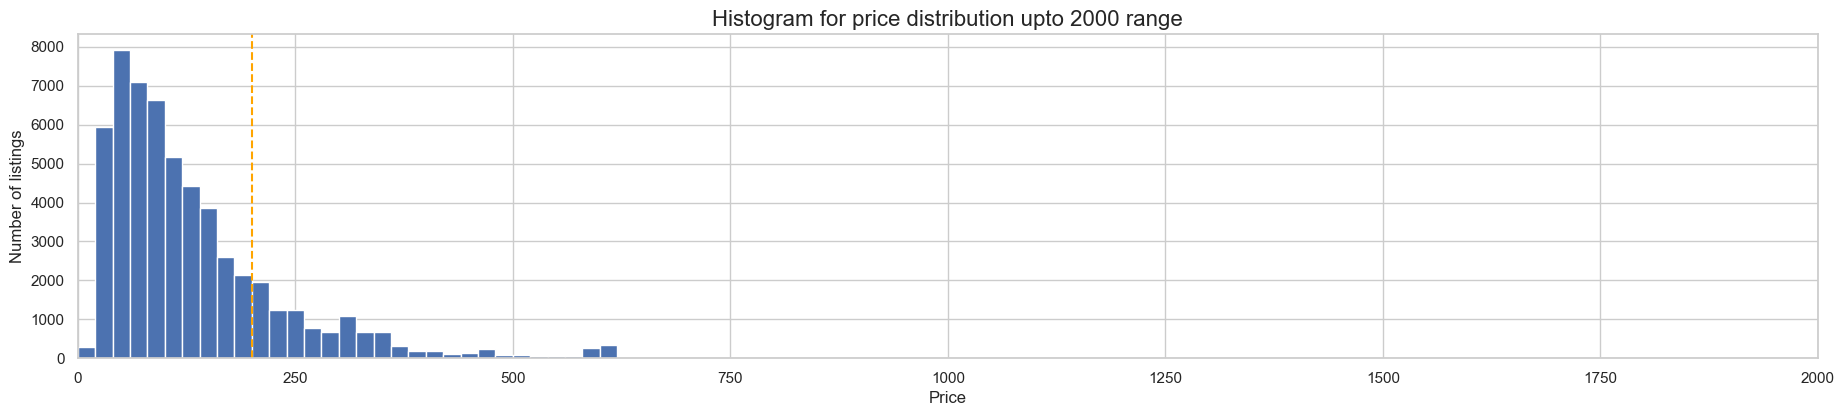

In [57]:
plt.figure(figsize=(20,4))
mergedData.price.hist(bins=100, range=(0,2000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Histogram for price distribution upto 2000 range", fontsize=16)
plt.xlabel("Price")
plt.ylabel("Number of listings")
plt.show()

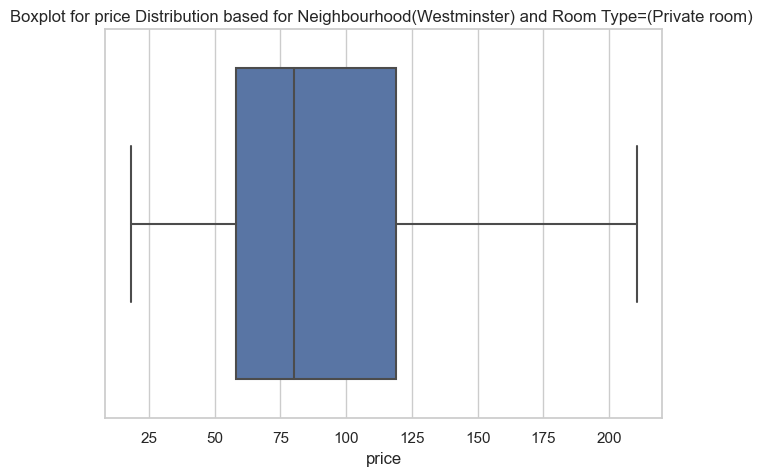

In [58]:
pricecol=mergedData.loc[ (mergedData['neighbourhood']=='Westminster') & (mergedData['room_type']=='Private room'),['price']  ].sort_values(by='price')

sns.set(style='whitegrid')
 
sns.boxplot(x =pricecol['price'])
plt.title('Boxplot for price Distribution based for Neighbourhood(Westminster) and Room Type=(Private room) ')

plt.show()

In [59]:
mergedData.groupby('Sentiment')['Sentiment'].count().sort_values(ascending=False)

Sentiment
Positive    53620
Neutral      2360
Negative      568
Name: Sentiment, dtype: int64

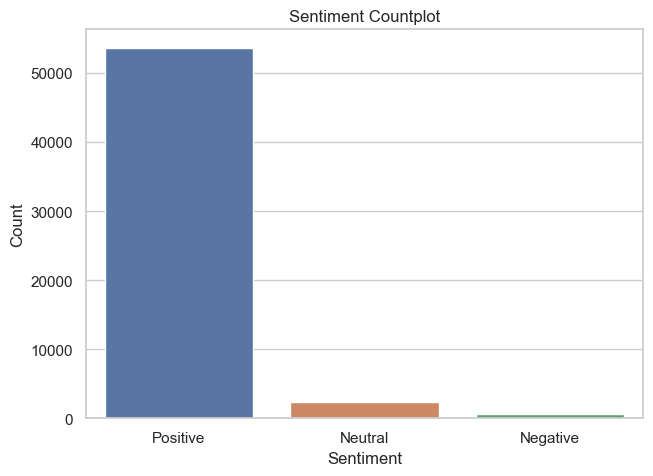

In [60]:
ax =sns.countplot(x ='Sentiment', data = mergedData,order=mergedData['Sentiment'].value_counts().index)
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.title('Sentiment Countplot')
plt.show()

In [61]:
#dataset with positive comment only
positivesentiment=mergedData[mergedData['Sentiment']=='Positive']

#find the london host who have more positive reviews
londonhost=positivesentiment.groupby('neighbourhood')['neighbourhood'].count().sort_values(ascending=False)
londonhost

neighbourhood
Westminster               5858
Tower Hamlets             4379
Hackney                   4061
Camden                    3727
Kensington and Chelsea    3488
Southwark                 3160
Lambeth                   3080
Islington                 3011
Wandsworth                2687
Hammersmith and Fulham    2388
Lewisham                  1623
Brent                     1599
Haringey                  1425
Newham                    1279
Ealing                    1264
Greenwich                 1178
Barnet                    1145
Waltham Forest             994
Croydon                    861
Merton                     850
Richmond upon Thames       803
Hounslow                   779
Hillingdon                 509
Bromley                    467
Enfield                    448
Redbridge                  446
Kingston upon Thames       429
City of London             341
Barking and Dagenham       313
Harrow                     303
Bexley                     263
Havering                 

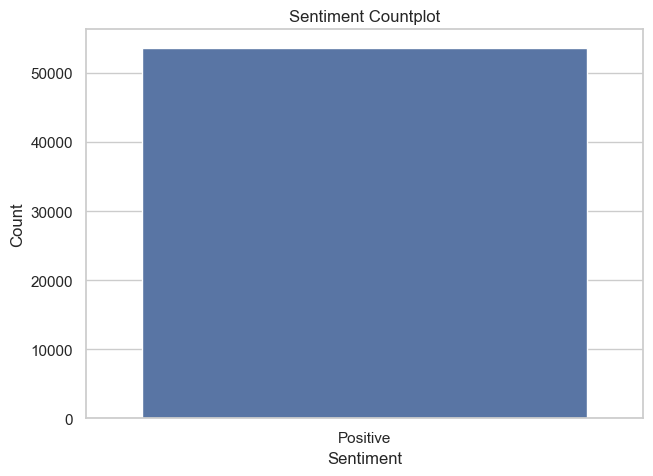

In [62]:
positivesentiment=mergedData[mergedData['Sentiment']=='Positive']
ax =sns.countplot(x ='Sentiment', data = positivesentiment,order=positivesentiment['Sentiment'].value_counts().index)
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.title('Sentiment Countplot')
plt.show()

In [63]:
#dataset with negative comment only
negativesentiment=mergedData[mergedData['Sentiment']=='Negative']
#find the london host who have more negative reviews
londonhost=negativesentiment.groupby('neighbourhood')['neighbourhood'].count().sort_values(ascending=False)
londonhost

neighbourhood
Westminster               94
Tower Hamlets             48
Kensington and Chelsea    40
Southwark                 32
Camden                    31
Hackney                   29
Islington                 27
Lambeth                   24
Hammersmith and Fulham    24
Barnet                    20
Ealing                    19
Hounslow                  18
Haringey                  16
Lewisham                  16
Newham                    15
Brent                     15
Wandsworth                15
Greenwich                 14
Hillingdon                12
Redbridge                  7
Waltham Forest             7
Bromley                    6
Harrow                     5
Enfield                    5
City of London             5
Merton                     4
Croydon                    4
Richmond upon Thames       4
Sutton                     4
Kingston upon Thames       3
Bexley                     3
Havering                   1
Barking and Dagenham       1
Name: neighbourhood, dtype: i

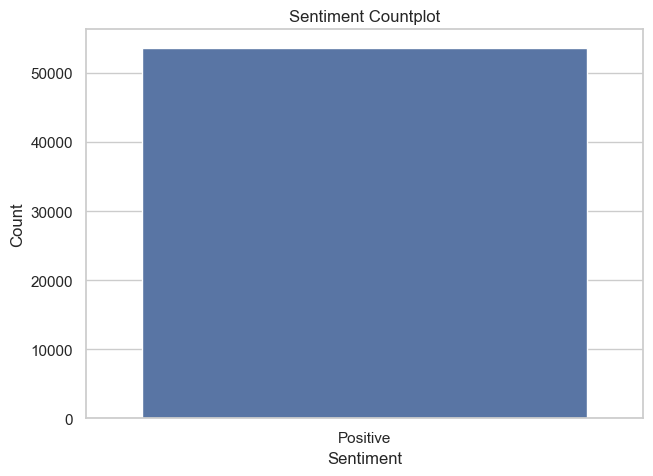

In [64]:
positivesentiment=mergedData[mergedData['Sentiment']=='Positive']
ax =sns.countplot(x ='Sentiment', data = positivesentiment,order=positivesentiment['Sentiment'].value_counts().index)
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.title('Sentiment Countplot')
plt.show()

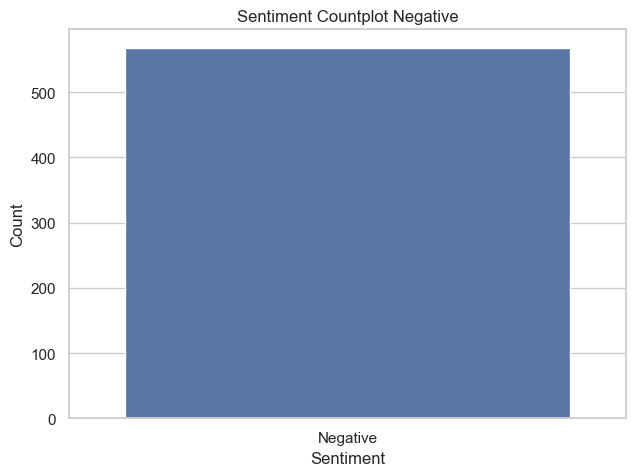

In [65]:
negativesentiment=mergedData[mergedData['Sentiment']=='Negative']
ax =sns.countplot(x ='Sentiment', data = negativesentiment,order=negativesentiment['Sentiment'].value_counts().index)
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.title('Sentiment Countplot Negative')
plt.show()

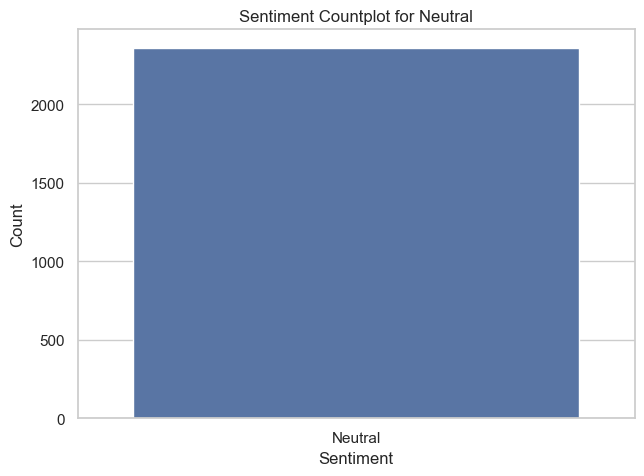

In [66]:
neutralsentiment=mergedData[mergedData['Sentiment']=='Neutral']
ax =sns.countplot(x ='Sentiment', data = neutralsentiment,order=neutralsentiment['Sentiment'].value_counts().index)
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.title('Sentiment Countplot for Neutral')
plt.show()

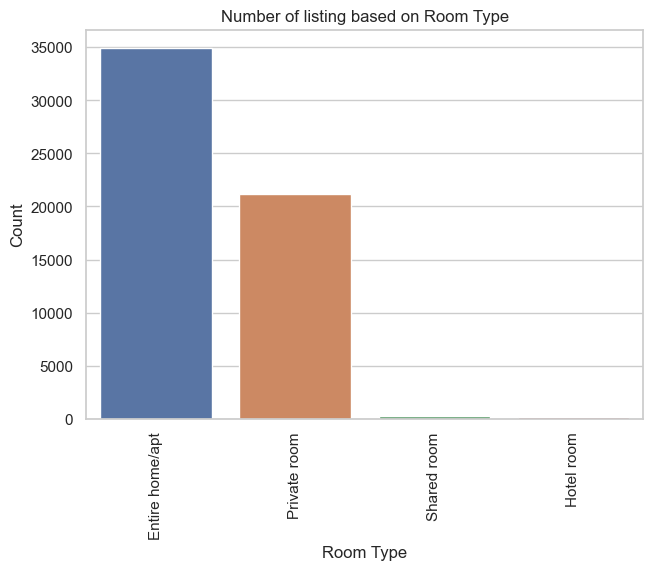

In [67]:

ax =sns.countplot(x ='room_type', data = mergedData,order=mergedData['room_type'].value_counts().index)
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Number of listing based on Room Type')
plt.show()

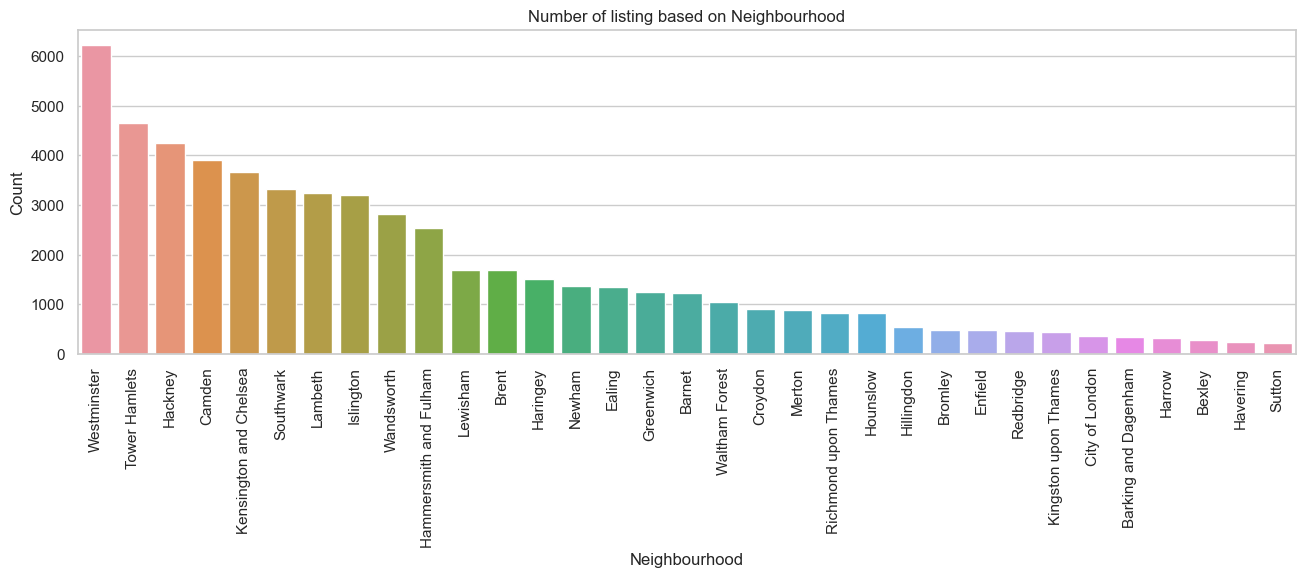

In [68]:
plt.figure(figsize=(14,4))
ax =sns.countplot(x ='neighbourhood', data = mergedData,order=mergedData['neighbourhood'].value_counts().index)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Number of listing based on Neighbourhood')
plt.show()

In [69]:
#Number of Unique host id
len(mergedData['host_id'].unique())

36702

In [70]:
#Display the count of host id
hostID=mergedData.groupby('host_id')['host_id'].count().reset_index(name='number_of_properties').sort_values('number_of_properties',ascending=False)
hostID

host_id  number_of_properties
13622   28820321.0                   263
14990   33889201.0                   171
1040     1432477.0                   169
18104   48165024.0                   163
29827  224866971.0                   128
...            ...                   ...
13349   27819356.0                     1
13348   27807697.0                     1
13347   27806385.0                     1
13346   27805847.0                     1
36700  504732658.0                     1

[36701 rows x 2 columns]

array([[<Axes: xlabel='host_id', ylabel='host_id'>,
        <Axes: xlabel='number_of_properties', ylabel='host_id'>],
       [<Axes: xlabel='host_id', ylabel='number_of_properties'>,
        <Axes: xlabel='number_of_properties', ylabel='number_of_properties'>]],
      dtype=object)

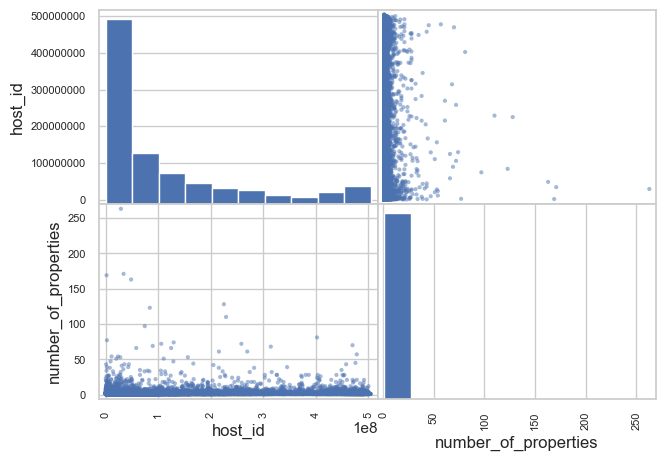

In [71]:
pd.plotting.scatter_matrix(hostID)


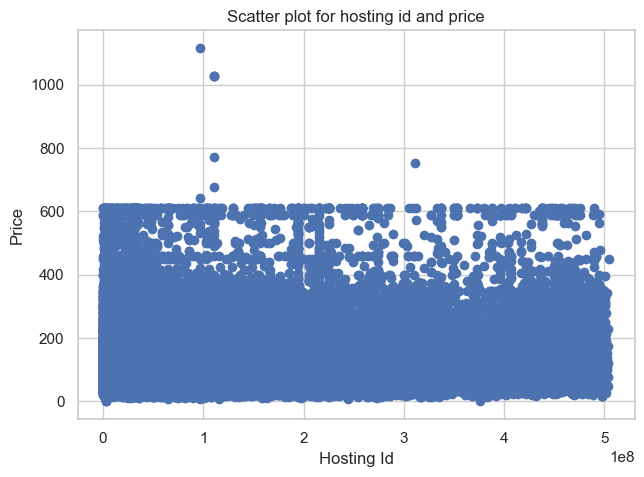

In [72]:
plt.scatter(x=mergedData['host_id'], y=mergedData['price'])
plt.xlabel("Hosting Id")
plt.ylabel("Price")
plt.title('Scatter plot for hosting id and price')
plt.show()

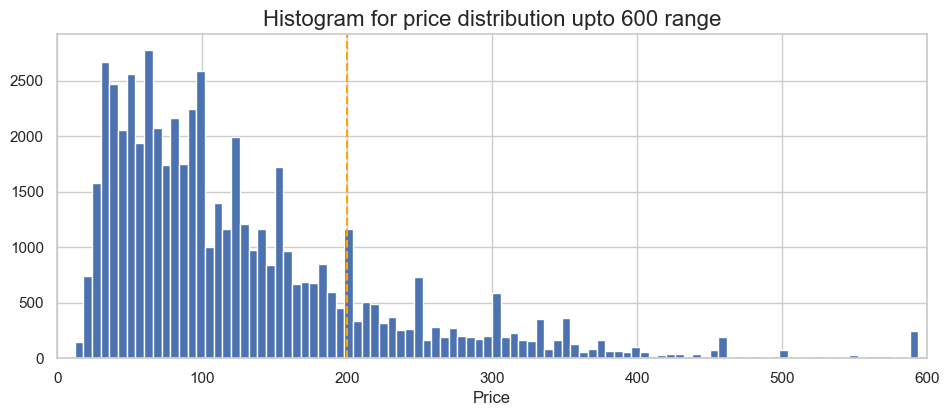

In [73]:
plt.figure(figsize=(10,4))
mergedData.price.hist(bins=100, range=(0,600))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Histogram for price distribution upto 600 range", fontsize=16)
plt.xlabel("Price")
plt.show()

In [74]:
#listing based on neighbourhood
neighbourlist1=mergedData.groupby('neighbourhood')['neighbourhood'].count().sort_values(ascending=False)
neighbourlist1

neighbourhood
Westminster               6212
Tower Hamlets             4658
Hackney                   4242
Camden                    3908
Kensington and Chelsea    3662
Southwark                 3314
Lambeth                   3237
Islington                 3195
Wandsworth                2825
Hammersmith and Fulham    2527
Lewisham                  1701
Brent                     1700
Haringey                  1503
Newham                    1366
Ealing                    1340
Greenwich                 1250
Barnet                    1219
Waltham Forest            1037
Croydon                    902
Merton                     889
Richmond upon Thames       834
Hounslow                   833
Hillingdon                 541
Bromley                    484
Enfield                    475
Redbridge                  473
Kingston upon Thames       444
City of London             359
Barking and Dagenham       334
Harrow                     322
Bexley                     277
Havering                 

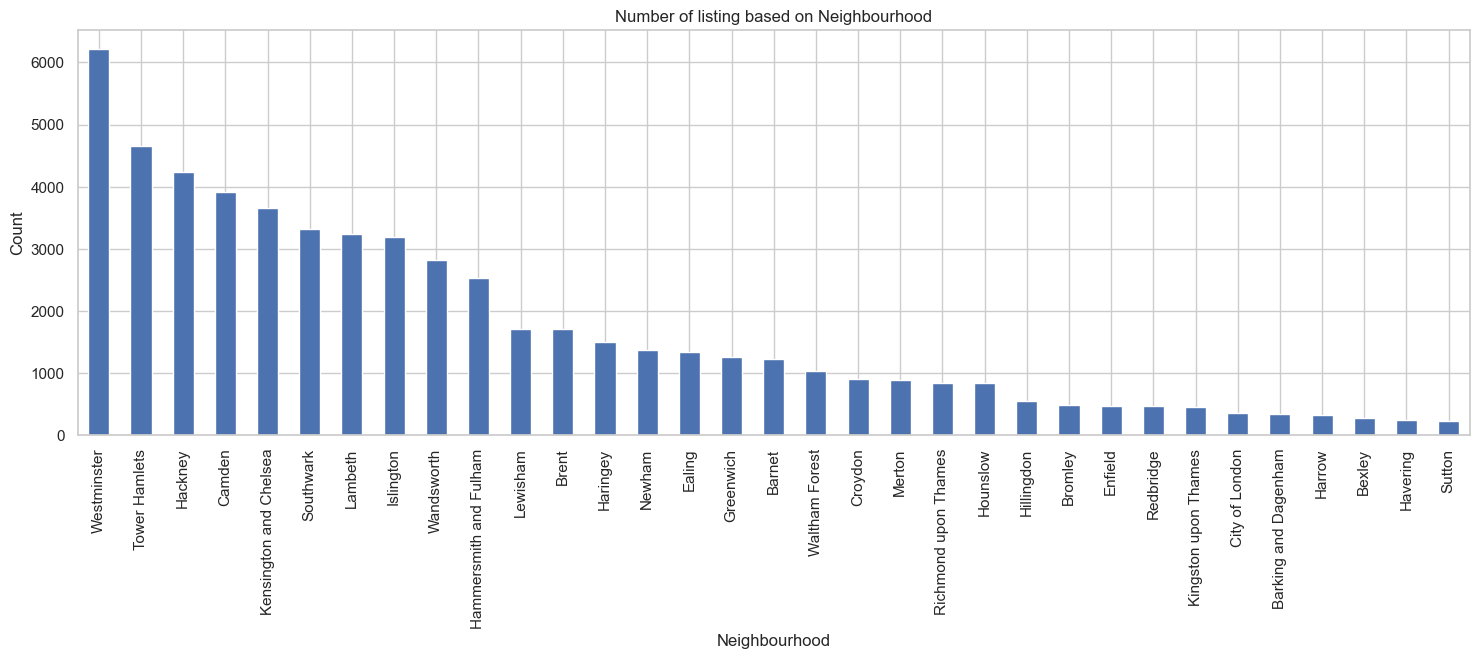

In [75]:
neighbourlist1.plot.bar(figsize=(16,5))
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Number of listing based on Neighbourhood')
plt.show()

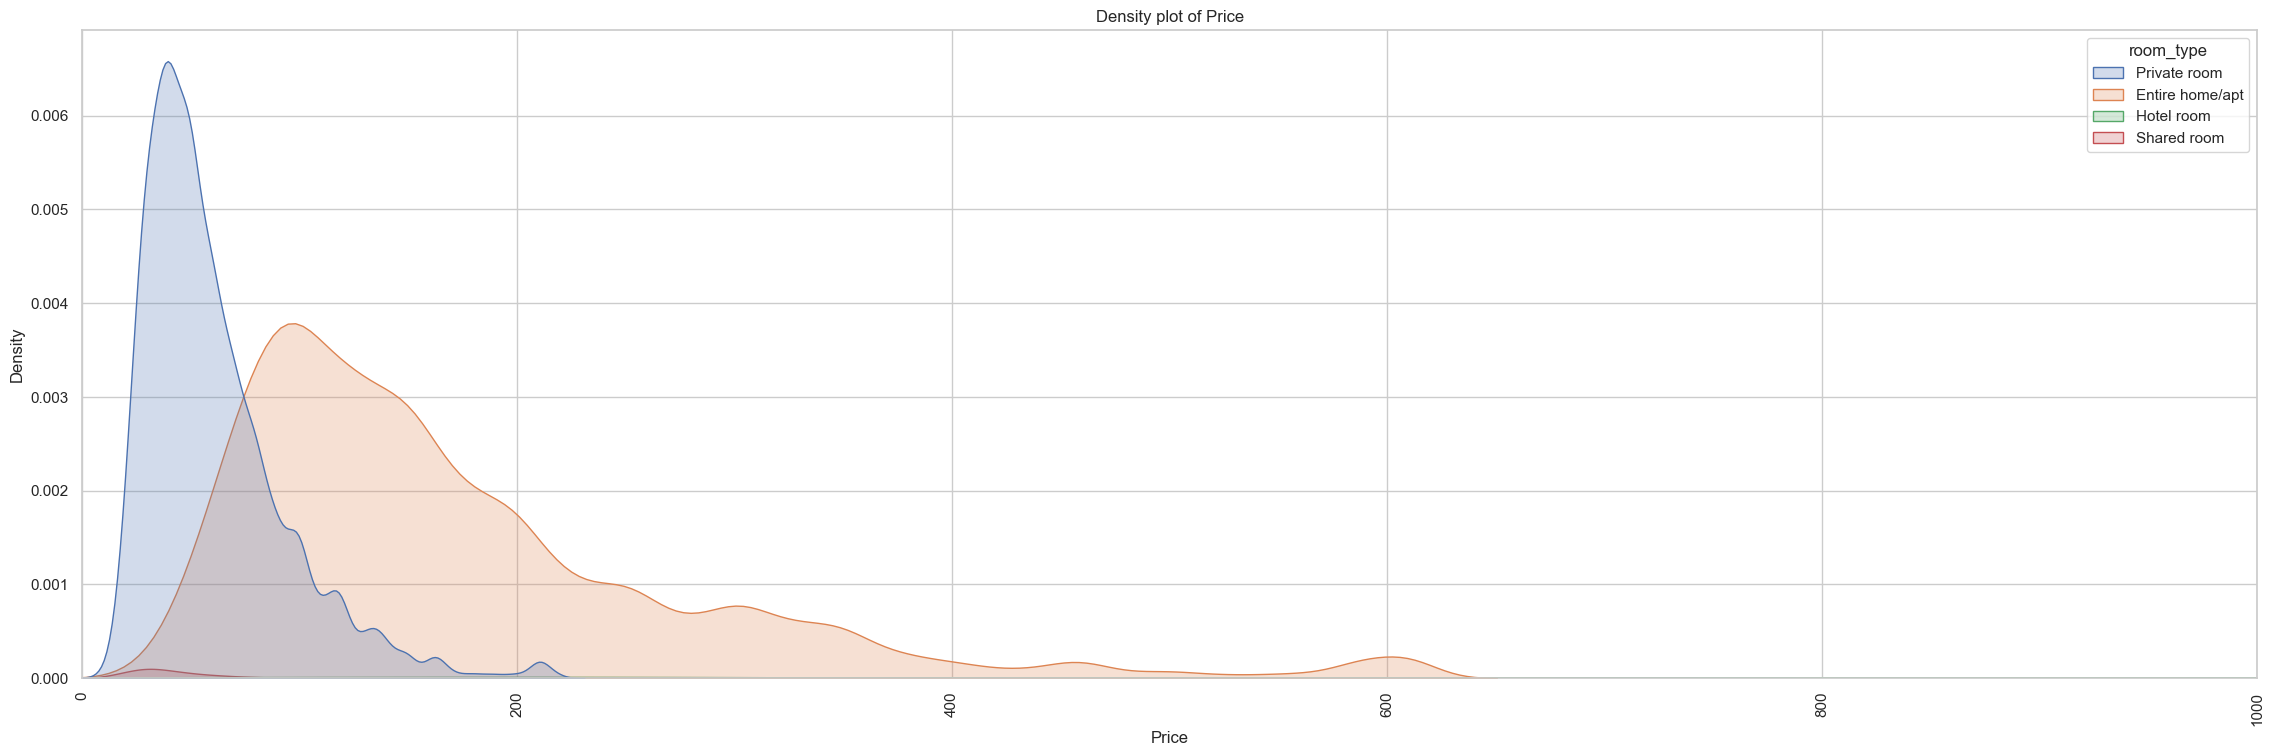

In [76]:
plt.figure(figsize=(25,8))
sns.kdeplot(data=mergedData, x='price',hue='room_type',fill=True)
#limiting the range price for 0 to 1000
plt.xlim(0, 1000)
plt.xlabel("Price")
plt.xticks(rotation=90)
plt.title('Density plot of Price')
plt.show()

In [77]:
mergedData


comments                  id  \
0      [My girlfriend and I hadn't known Alina before...               13913   
1      [We loved staying at Phillipa's place in Chels...               15400   
2      [Amazing location - great apartment, plenty of...               17402   
3      [The communication with Joe was very easy. We ...               24328   
4      [10,000 times better and cheaper than staying ...               25123   
...                                                  ...                 ...   
56543         [nice room, central area with subway near]  843038973630044774   
56544  [Fantastic host.<br/>Great accommodation cant ...  843203613361079569   
56545  [Raffaella’s flat is quite spacious, we were v...  843405768455690290   
56546  [Superb stay & very convenient for access to w...  843524996925244561   
56547  [I booked Karen's home last minute and my good...  844058888885663384   

           host_id     host_name           neighbourhood  \
0          54730.0         Alina               Islington   
1          60302.0      Philippa  Kensington and Chelsea   
2          67564.0           Liz             Westminster   
3          41759.0           Joe              Wandsworth   
4         103583.0         Grace                  Barnet   
...            ...           ...                     ...   
56543  441856679.0  Moza Mostafa           Tower Hamlets   
56544    2659258.0        Graham                 Hackney   
56545  494678357.0     Raffaella  Kensington and Chelsea   
56546  498382945.0          Enzo               Islington   
56547  504732658.0         Karen                  Camden   

                                                    name        room_type  \
0                    Holiday London DB Room Let-on going     Private room   
1                    Bright Chelsea  Apartment. Chelsea!  Entire home/apt   
2                  Superb 3-Bed/2 Bath & Wifi: Trendy W1  Entire home/apt   
3      Battersea live/work artist house, garden communal  Entire home/apt   
4                      Clean big Room in London (Room 1)     Private room   
...                                                  ...              ...   
56543                                         Holybush D     Private room   
56544                               Canal side cute room     Private room   
56545          Luxury Flat in Kensington / Knightsbridge  Entire home/apt   
56546                  ¹ Central Private Room/Caledonian     Private room   
56547                        Primrose Hill Petite Palace  Entire home/apt   

       number_of_reviews  calculated_host_listings_count  availability_365  \
0                   41.0                             2.0             313.0   
1                   92.0                             1.0              76.0   
2                   54.0                             8.0             227.0   
3                   96.0                             1.0              26.0   
4                  129.0                             3.0               0.0   
...                  ...                             ...               ...   
56543                1.0                            12.0             146.0   
56544                1.0                             1.0             312.0   
56545                3.0                             3.0             254.0   
56546                1.0                             3.0             261.0   
56547                1.0                             1.0             364.0   

       price Sentiment  
0       79.0  Positive  
1       80.0  Positive  
2      418.0  Positive  
3      250.0  Positive  
4       29.0  Positive  
...      ...       ...  
56543   39.0  Positive  
56544   37.0  Positive  
56545  199.0  Positive  
56546   39.0  Positive  
56547  450.0  Positive  

[56548 rows x 12 columns]

In [78]:
mergedData['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [79]:
mergedData.groupby('Sentiment')['Sentiment'].count().sort_values(ascending=False)

Sentiment
Positive    53620
Neutral      2360
Negative      568
Name: Sentiment, dtype: int64

# Diagnostic Analysis

<Figure size 1000x600 with 0 Axes>

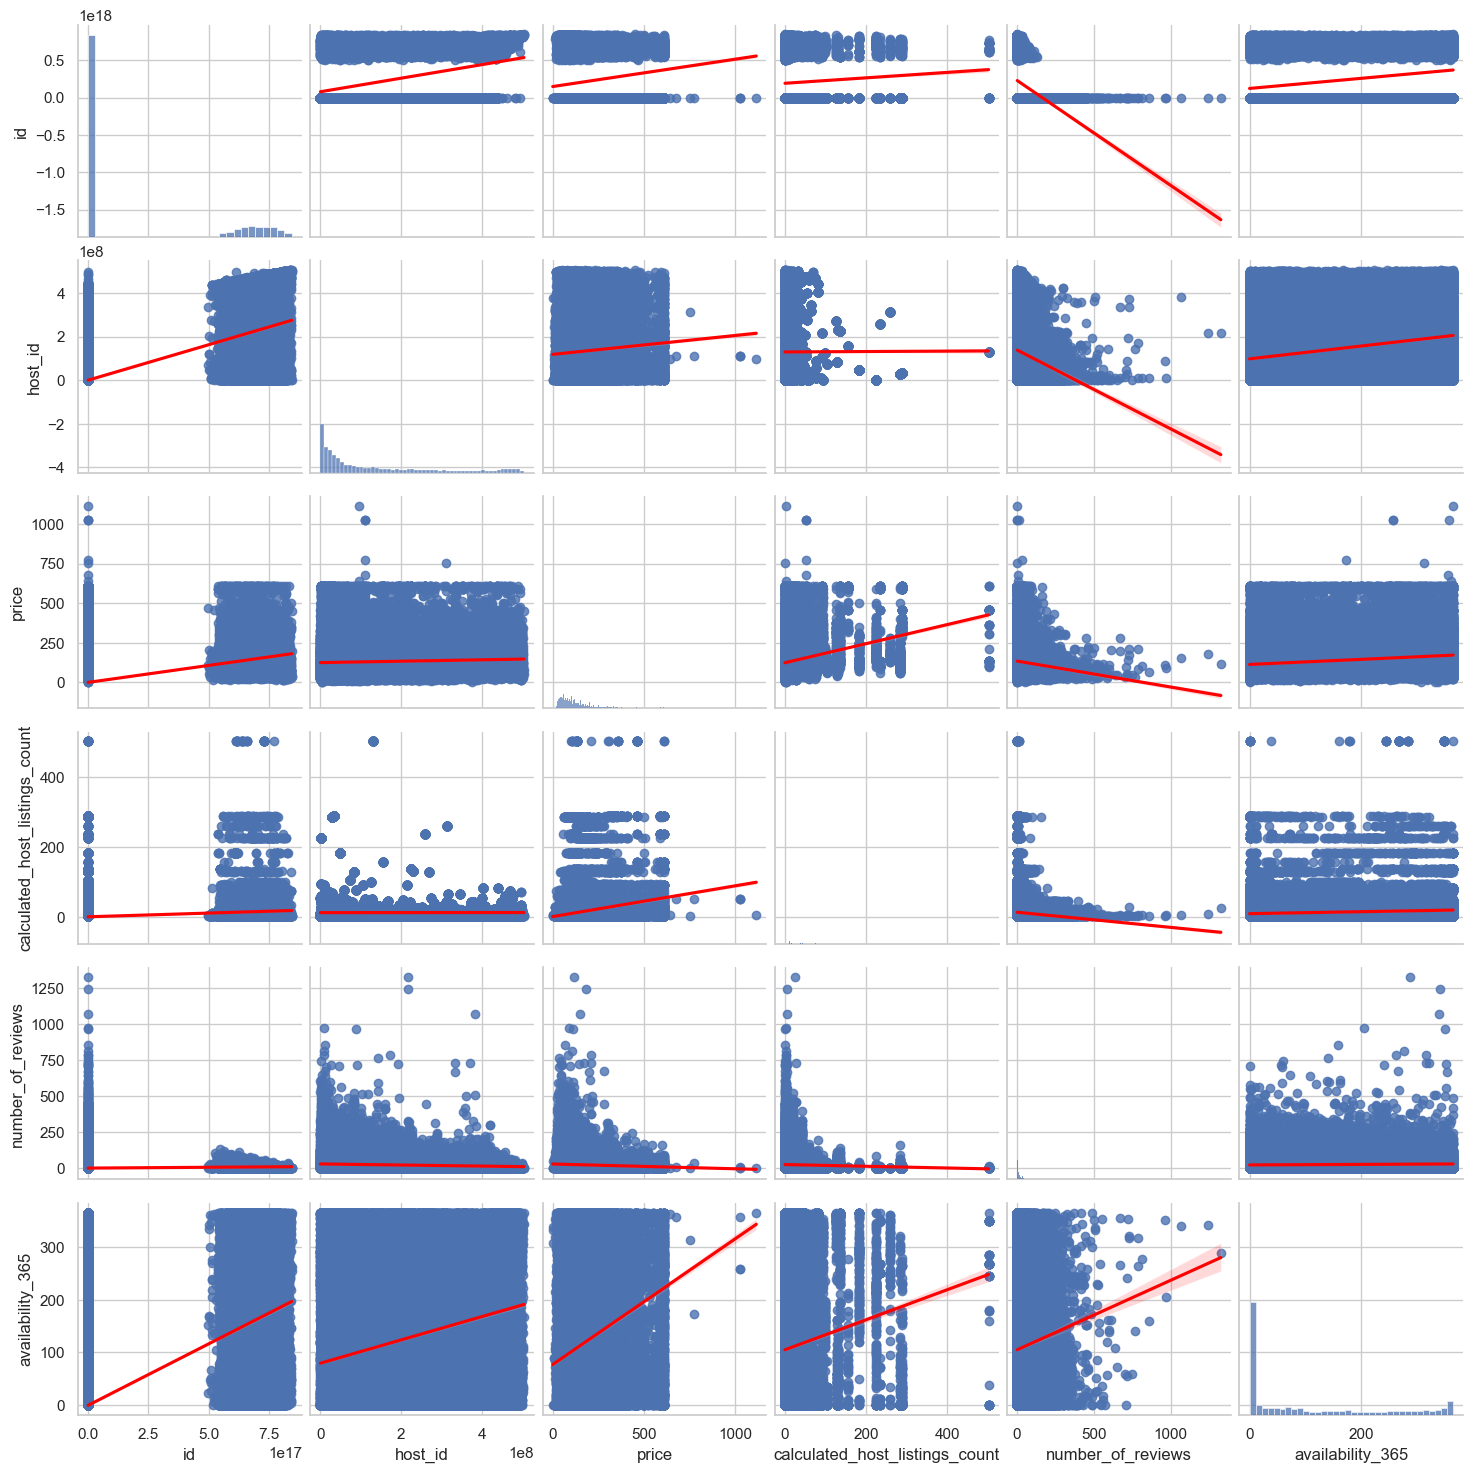

In [80]:
col=['id','host_id','price','calculated_host_listings_count','number_of_reviews','availability_365']
plt.figure(figsize=(10,6))
sns.pairplot(
    mergedData,
    x_vars=col,
    y_vars=col,kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [81]:
heatmapdata=mergedData[['id','host_id','number_of_reviews','calculated_host_listings_count','availability_365','price']]
heatmapdata

id      host_id  number_of_reviews  \
0                   13913      54730.0               41.0   
1                   15400      60302.0               92.0   
2                   17402      67564.0               54.0   
3                   24328      41759.0               96.0   
4                   25123     103583.0              129.0   
...                   ...          ...                ...   
56543  843038973630044774  441856679.0                1.0   
56544  843203613361079569    2659258.0                1.0   
56545  843405768455690290  494678357.0                3.0   
56546  843524996925244561  498382945.0                1.0   
56547  844058888885663384  504732658.0                1.0   

       calculated_host_listings_count  availability_365  price  
0                                 2.0             313.0   79.0  
1                                 1.0              76.0   80.0  
2                                 8.0             227.0  418.0  
3                                 1.0              26.0  250.0  
4                                 3.0               0.0   29.0  
...                               ...               ...    ...  
56543                            12.0             146.0   39.0  
56544                             1.0             312.0   37.0  
56545                             3.0             254.0  199.0  
56546                             3.0             261.0   39.0  
56547                             1.0             364.0  450.0  

[56548 rows x 6 columns]

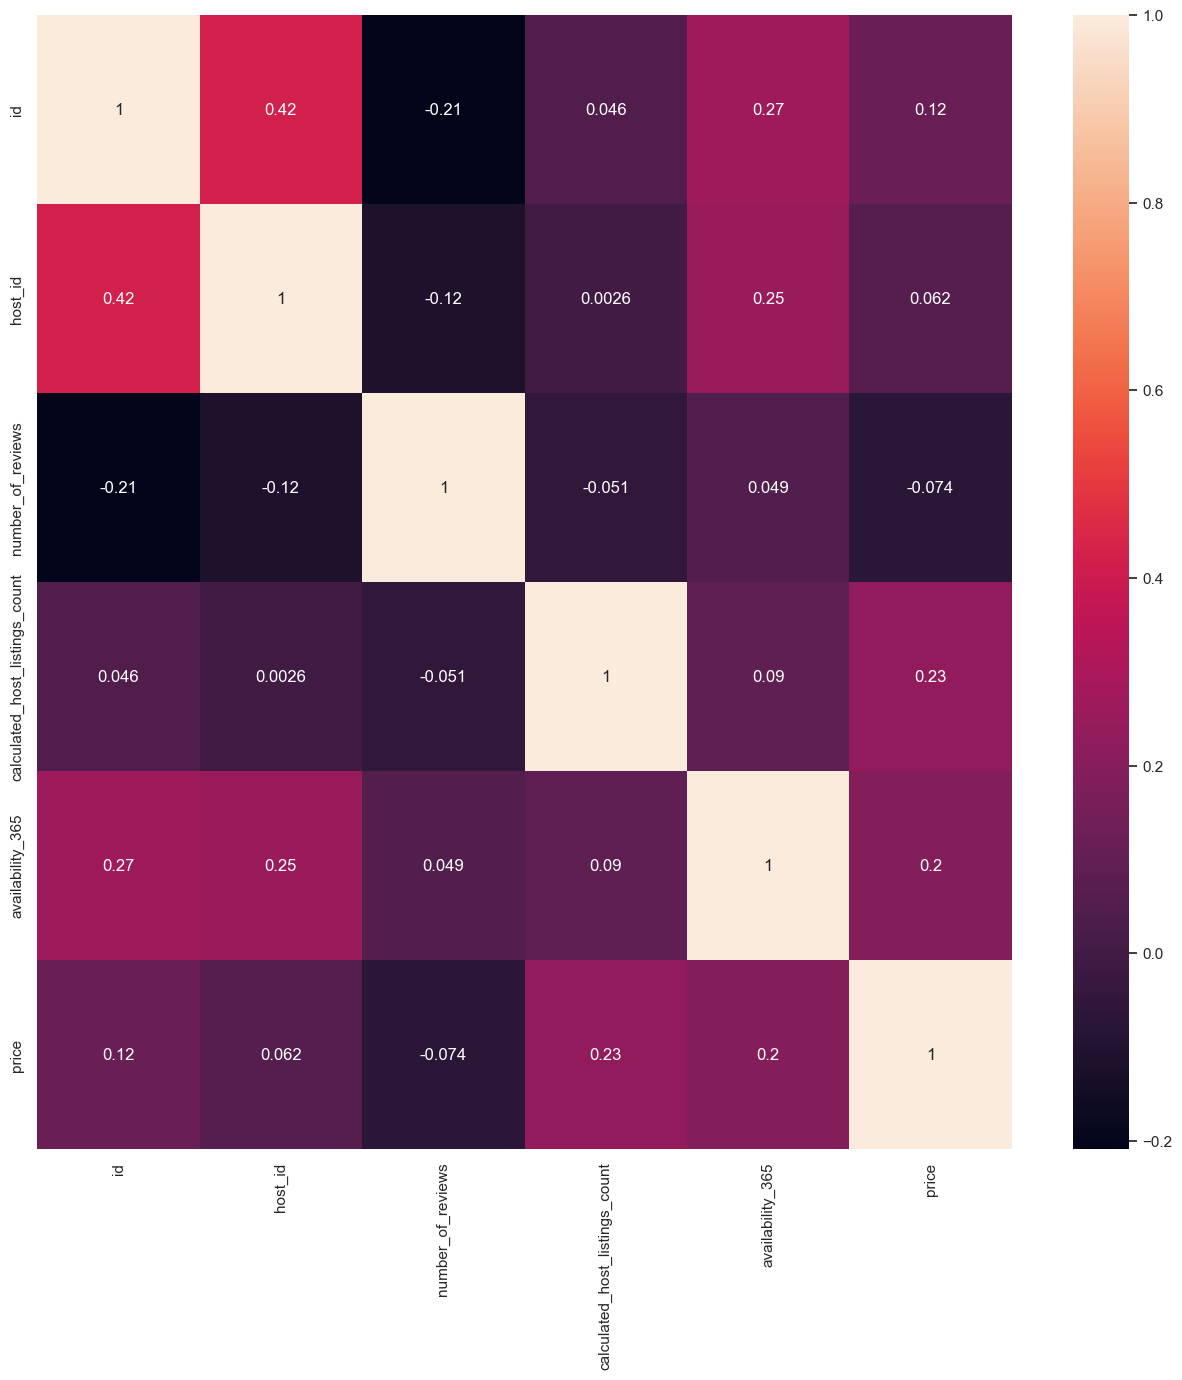

In [82]:
plt.figure(figsize=(14,14))
sns.heatmap(heatmapdata.corr(), annot=True)
plt.show()

In [83]:
positiveData=mergedData[mergedData['Sentiment']=='Positive']


In [84]:
#room type for positive sentiment


In [85]:
positiveData.room_type.value_counts()

Entire home/apt    33247
Private room       19963
Shared room          214
Hotel room           180
Name: room_type, dtype: int64

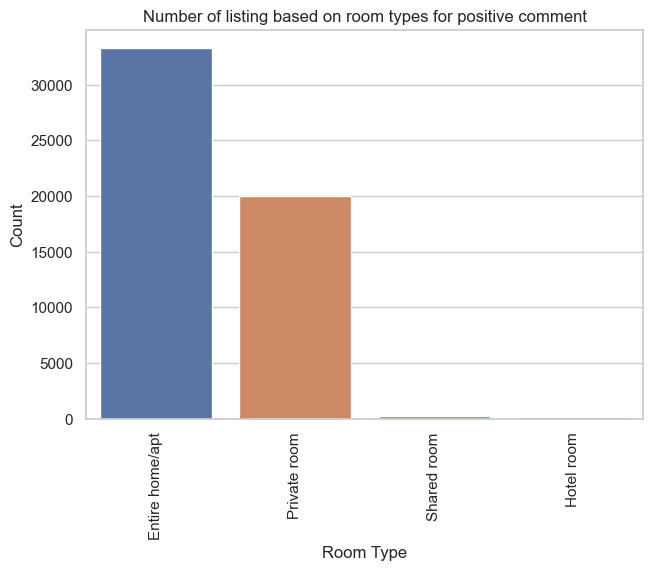

In [86]:

ax =sns.countplot(x ='room_type', data = positiveData,order=positiveData['room_type'].value_counts().index)
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Number of listing based on room types for positive comment')
plt.show()

In [87]:
#FOR  neighbourhood value count for positive sentiment

In [88]:
positiveData.neighbourhood.value_counts()

Westminster               5858
Tower Hamlets             4379
Hackney                   4061
Camden                    3727
Kensington and Chelsea    3488
Southwark                 3160
Lambeth                   3080
Islington                 3011
Wandsworth                2687
Hammersmith and Fulham    2388
Lewisham                  1623
Brent                     1599
Haringey                  1425
Newham                    1279
Ealing                    1264
Greenwich                 1178
Barnet                    1145
Waltham Forest             994
Croydon                    861
Merton                     850
Richmond upon Thames       803
Hounslow                   779
Hillingdon                 509
Bromley                    467
Enfield                    448
Redbridge                  446
Kingston upon Thames       429
City of London             341
Barking and Dagenham       313
Harrow                     303
Bexley                     263
Havering                   229
Sutton  

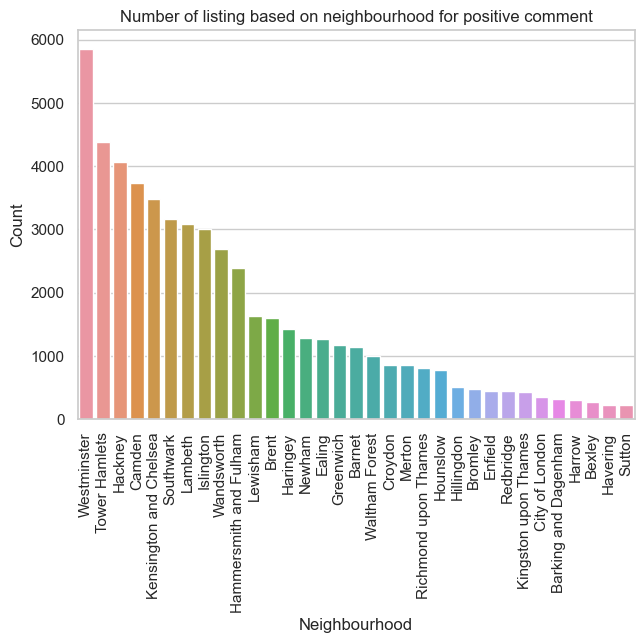

In [89]:
ax =sns.countplot(x ='neighbourhood', data = positiveData,order=positiveData['neighbourhood'].value_counts().index)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Number of listing based on neighbourhood for positive comment')
plt.show()

In [90]:
#Mean price for based on neighbourhood for positive

In [91]:
positiveData.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)

neighbourhood
Kensington and Chelsea    217.504265
Westminster               212.879097
City of London            181.174487
Camden                    157.242923
Hammersmith and Fulham    138.577052
Richmond upon Thames      132.966687
Wandsworth                125.008932
Islington                 122.924942
Merton                    117.324118
Southwark                 116.745095
Lambeth                   110.821510
Hackney                   110.467496
Brent                     109.431520
Tower Hamlets             109.170416
Hounslow                  105.939987
Newham                    105.758894
Barnet                    101.923253
Greenwich                 100.575976
Ealing                     97.324664
Kingston upon Thames       97.151515
Haringey                   96.245614
Havering                   91.873362
Waltham Forest             89.721579
Bromley                    87.908458
Harrow                     87.231023
Enfield                    87.106306
Lewisham                

In [92]:
#Mean price for based on room type for positive

In [93]:
positiveData.groupby(['room_type'])['price'].mean().sort_values(ascending=False)

room_type
Hotel room         221.296528
Entire home/apt    173.467208
Private room        60.488404
Shared room         41.668808
Name: price, dtype: float64

In [94]:
#for neighbourhood listing based on room type for positive comment

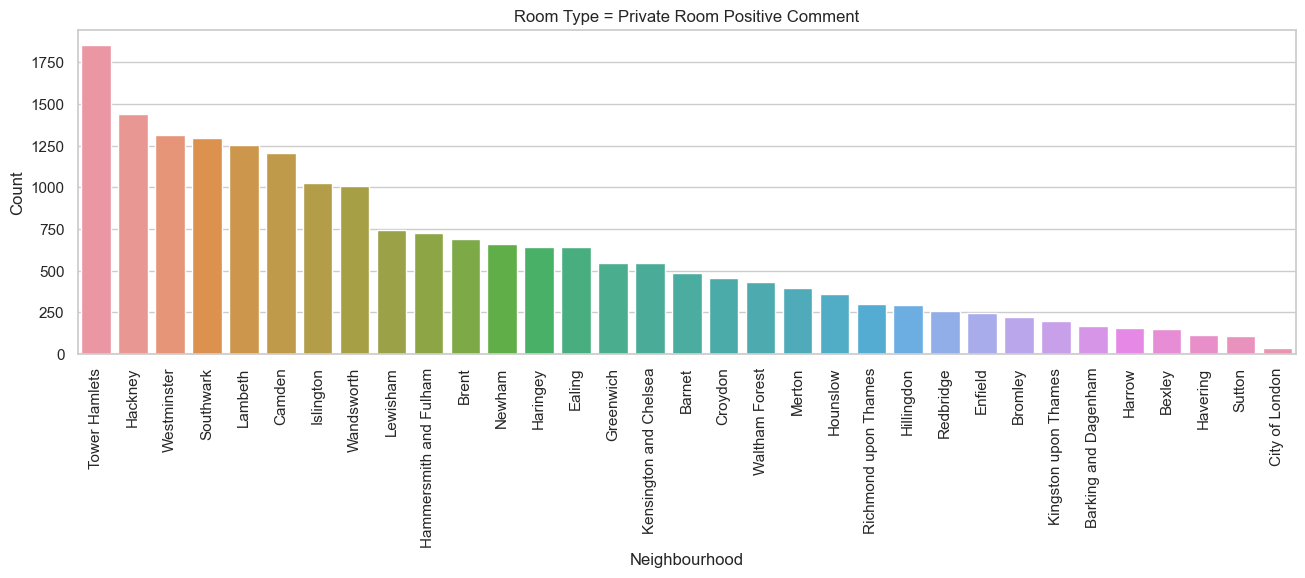

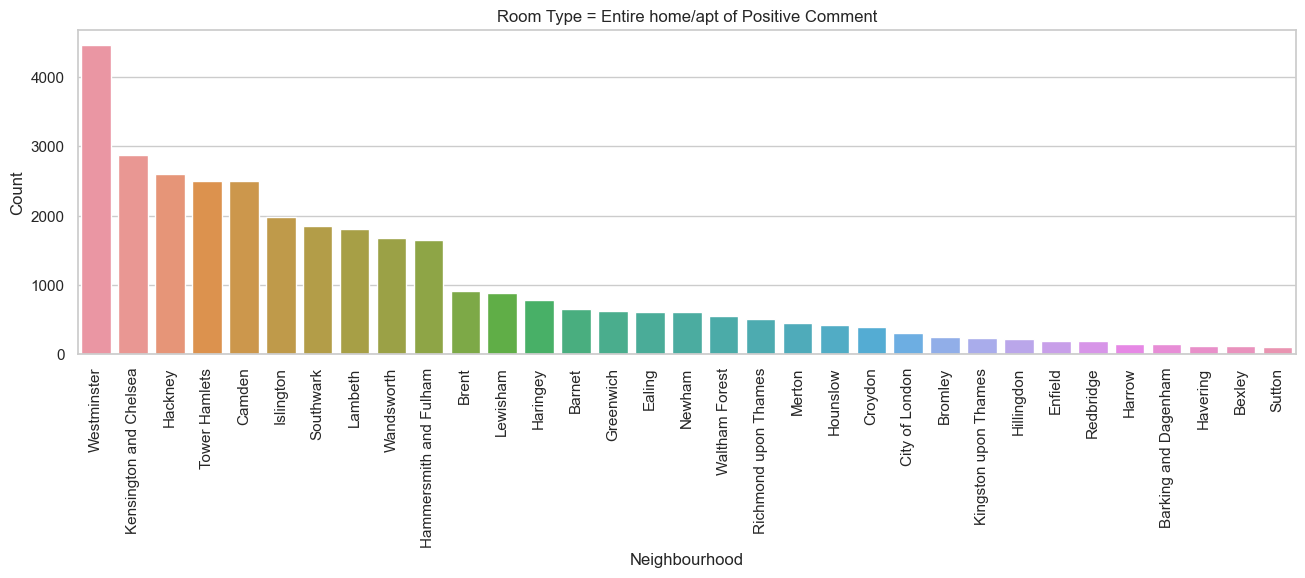

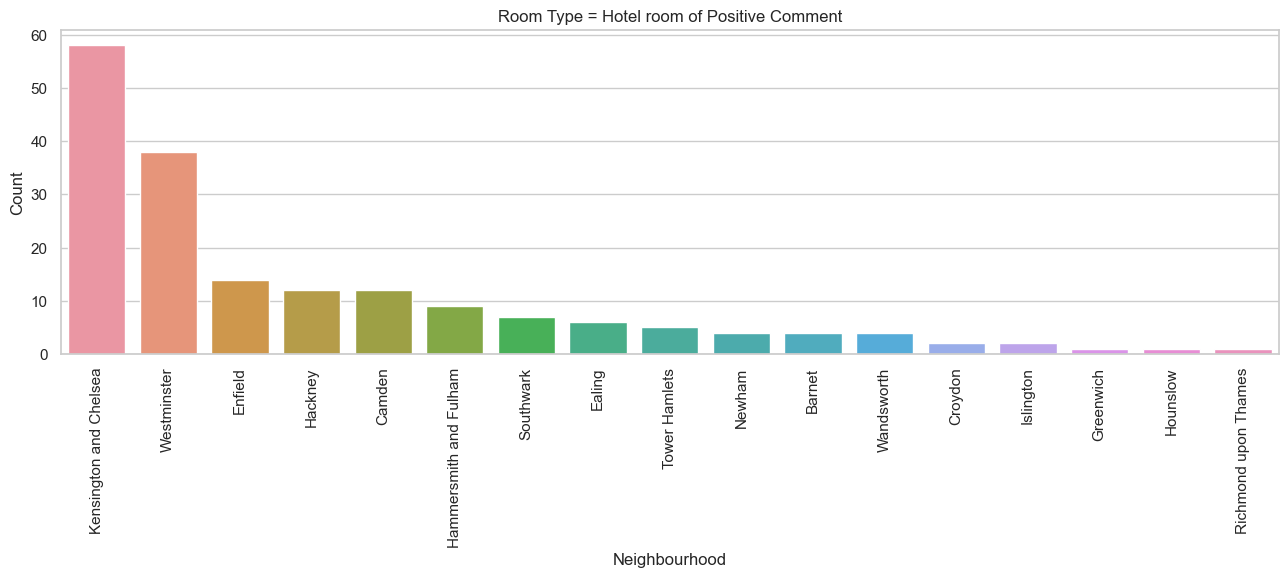

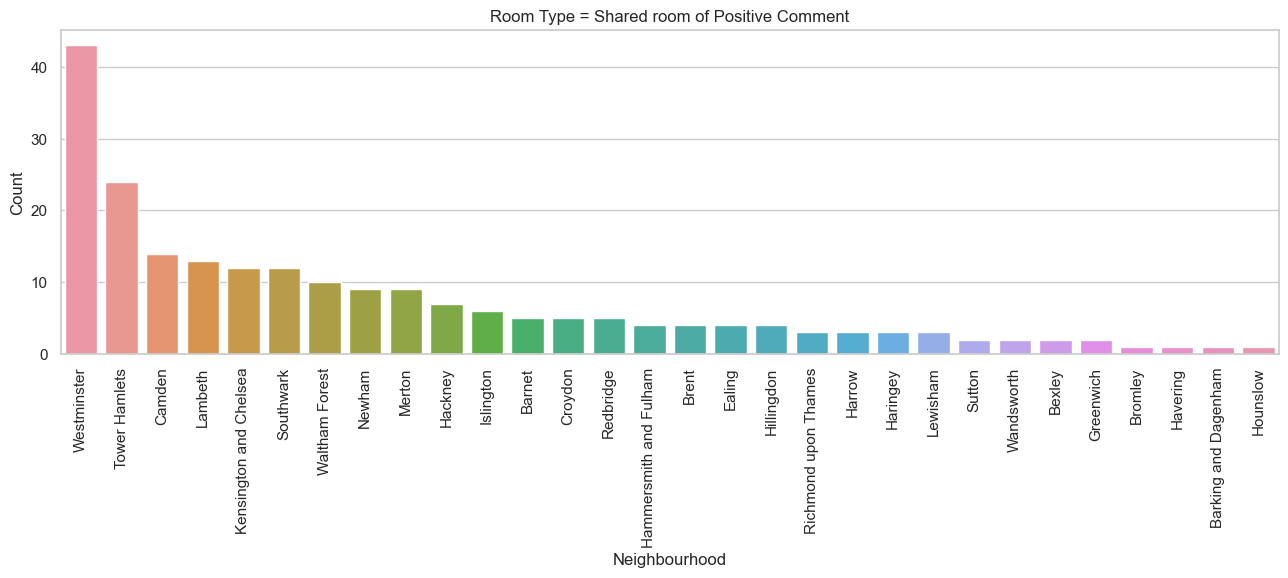

In [95]:
data_private_room_positive=positiveData[positiveData['room_type']=='Private room']
plt.figure(figsize=(14,4))
ax =sns.countplot(x ='neighbourhood', data = data_private_room_positive,order=data_private_room_positive['neighbourhood'].value_counts().index)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Room Type = Private Room Positive Comment')
plt.show()

data_entire_positive=positiveData[positiveData['room_type']=='Entire home/apt']
plt.figure(figsize=(14,4))
ax =sns.countplot(x ='neighbourhood', data = data_entire_positive,order=data_entire_positive['neighbourhood'].value_counts().index)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Room Type = Entire home/apt of Positive Comment')
plt.show()

data_hotel_room_positive=positiveData[positiveData['room_type']=='Hotel room']
plt.figure(figsize=(14,4))
ax =sns.countplot(x ='neighbourhood', data = data_hotel_room_positive,order=data_hotel_room_positive['neighbourhood'].value_counts().index)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Room Type = Hotel room of Positive Comment')
plt.show()

data_share_room_positive=positiveData[positiveData['room_type']=='Shared room']
plt.figure(figsize=(14,4))
ax =sns.countplot(x ='neighbourhood', data = data_share_room_positive,order=data_share_room_positive['neighbourhood'].value_counts().index)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Room Type = Shared room of Positive Comment')
plt.show()

In [96]:
#room type for positive sentiment

In [97]:
positiveData=mergedData[mergedData['Sentiment']=='Positive']


In [98]:
#FOR  neighbourhood value count for positive sentiment

In [99]:
positiveData.neighbourhood.value_counts()

Westminster               5858
Tower Hamlets             4379
Hackney                   4061
Camden                    3727
Kensington and Chelsea    3488
Southwark                 3160
Lambeth                   3080
Islington                 3011
Wandsworth                2687
Hammersmith and Fulham    2388
Lewisham                  1623
Brent                     1599
Haringey                  1425
Newham                    1279
Ealing                    1264
Greenwich                 1178
Barnet                    1145
Waltham Forest             994
Croydon                    861
Merton                     850
Richmond upon Thames       803
Hounslow                   779
Hillingdon                 509
Bromley                    467
Enfield                    448
Redbridge                  446
Kingston upon Thames       429
City of London             341
Barking and Dagenham       313
Harrow                     303
Bexley                     263
Havering                   229
Sutton  

In [100]:
#Mean price for based on neighbourhood for positive

In [101]:
positiveData.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)

neighbourhood
Kensington and Chelsea    217.504265
Westminster               212.879097
City of London            181.174487
Camden                    157.242923
Hammersmith and Fulham    138.577052
Richmond upon Thames      132.966687
Wandsworth                125.008932
Islington                 122.924942
Merton                    117.324118
Southwark                 116.745095
Lambeth                   110.821510
Hackney                   110.467496
Brent                     109.431520
Tower Hamlets             109.170416
Hounslow                  105.939987
Newham                    105.758894
Barnet                    101.923253
Greenwich                 100.575976
Ealing                     97.324664
Kingston upon Thames       97.151515
Haringey                   96.245614
Havering                   91.873362
Waltham Forest             89.721579
Bromley                    87.908458
Harrow                     87.231023
Enfield                    87.106306
Lewisham                

In [102]:
#Mean price for based on room type for positive

In [103]:
positiveData.groupby(['room_type'])['price'].mean().sort_values(ascending=False)

room_type
Hotel room         221.296528
Entire home/apt    173.467208
Private room        60.488404
Shared room         41.668808
Name: price, dtype: float64

In [104]:
#for neighbourhood listing based on room type for positive comment

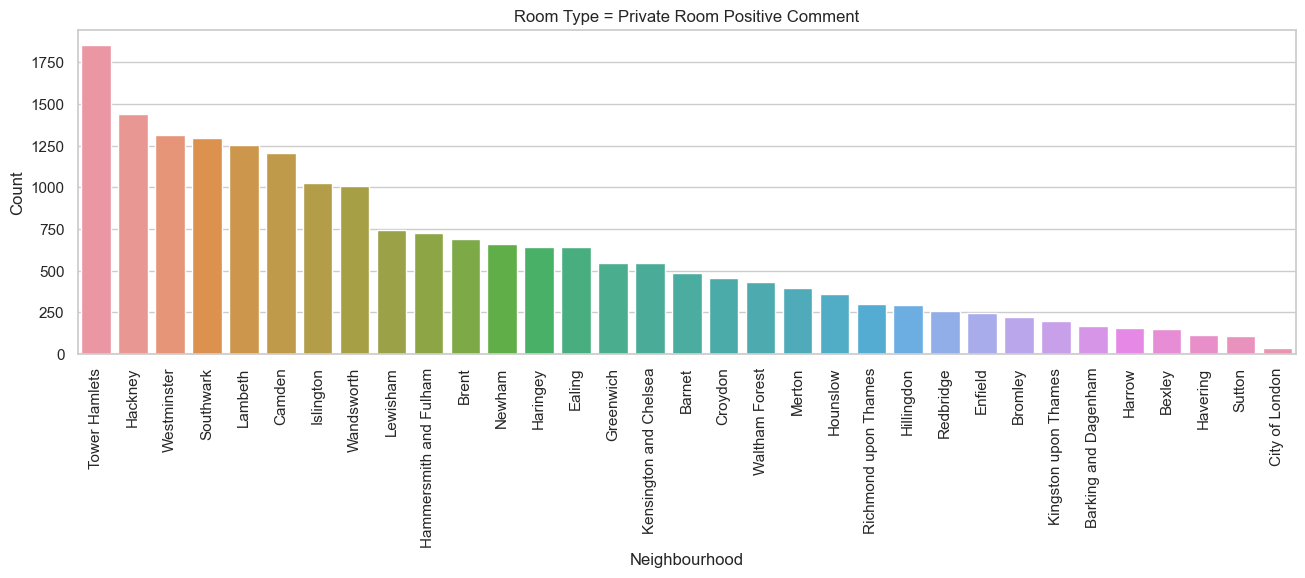

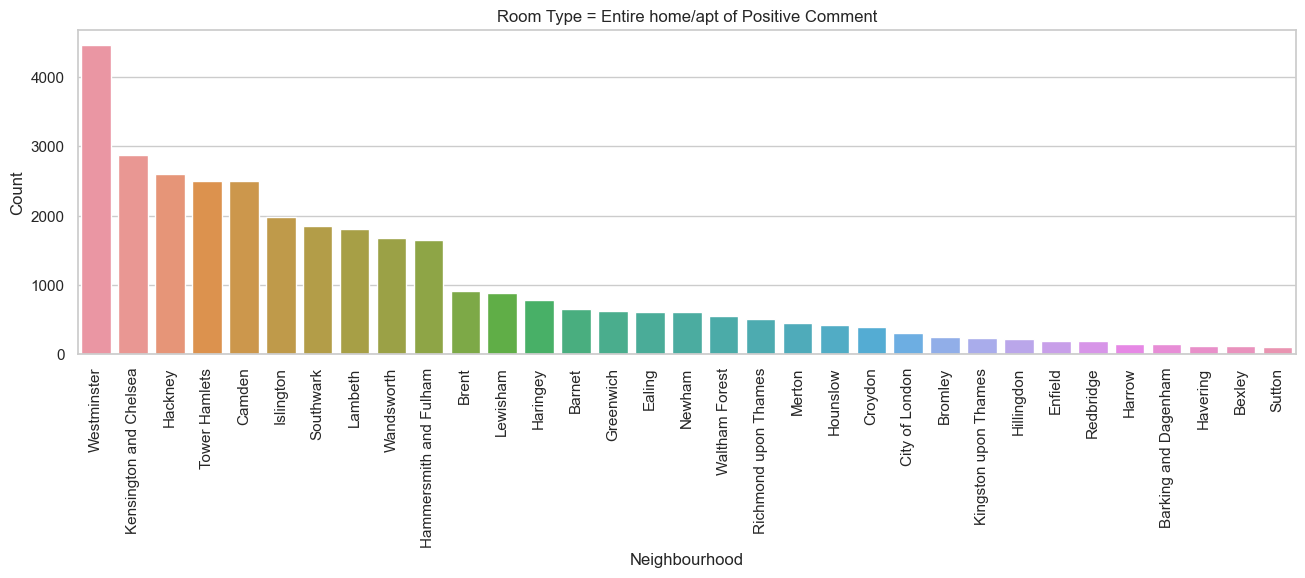

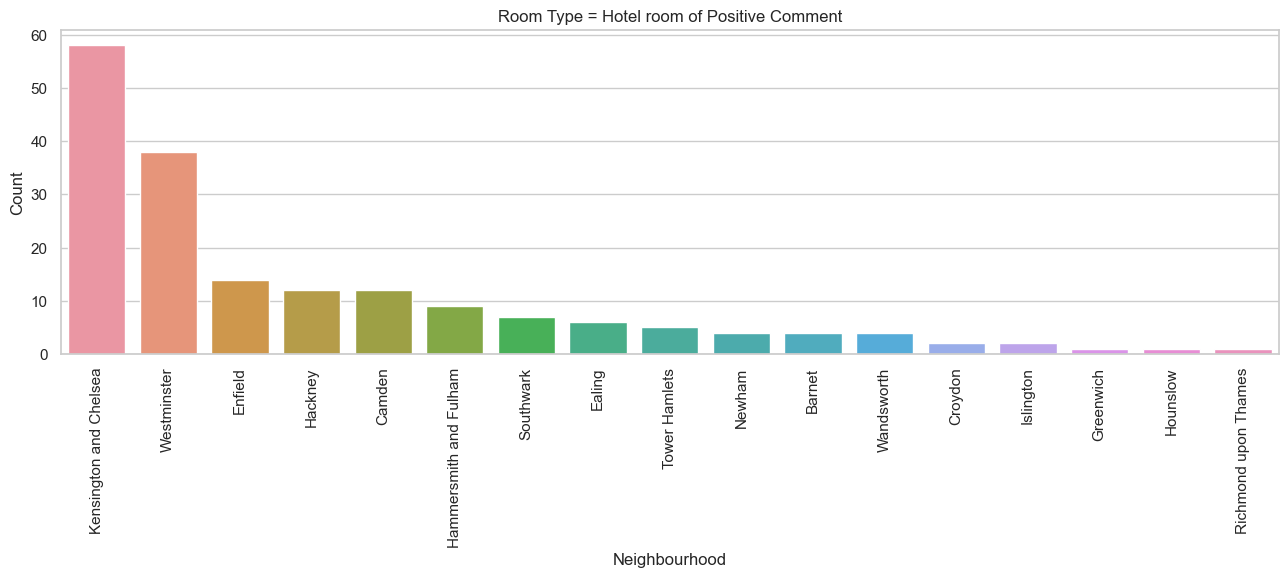

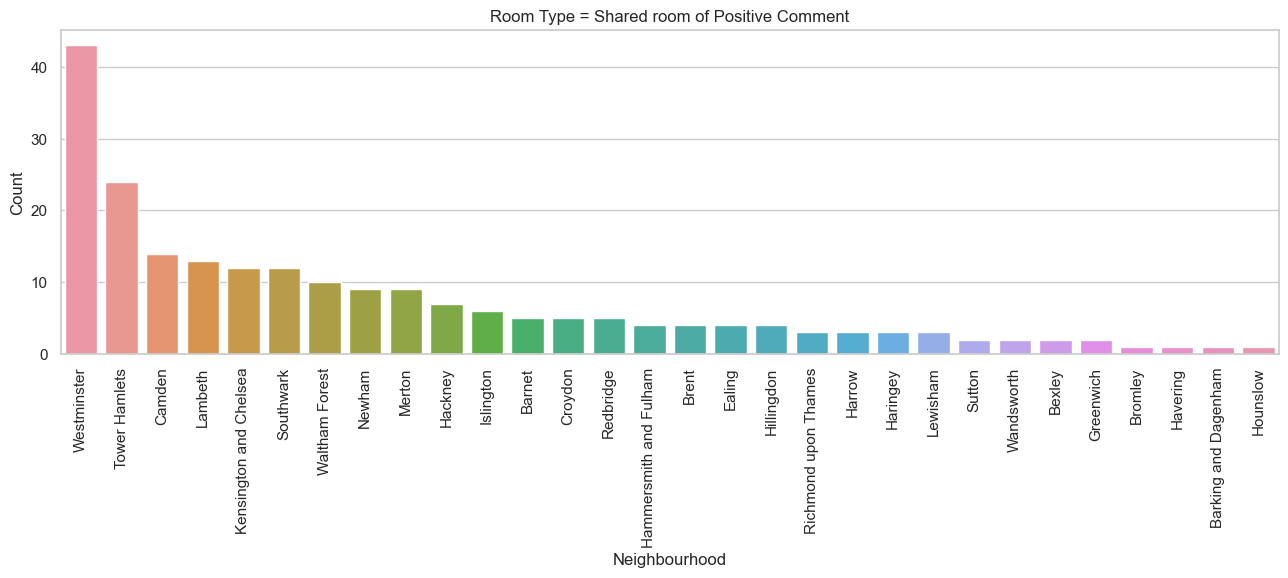

In [105]:
data_private_room_positive=positiveData[positiveData['room_type']=='Private room']
plt.figure(figsize=(14,4))
ax =sns.countplot(x ='neighbourhood', data = data_private_room_positive,order=data_private_room_positive['neighbourhood'].value_counts().index)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Room Type = Private Room Positive Comment')
plt.show()

data_entire_positive=positiveData[positiveData['room_type']=='Entire home/apt']
plt.figure(figsize=(14,4))
ax =sns.countplot(x ='neighbourhood', data = data_entire_positive,order=data_entire_positive['neighbourhood'].value_counts().index)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Room Type = Entire home/apt of Positive Comment')
plt.show()

data_hotel_room_positive=positiveData[positiveData['room_type']=='Hotel room']
plt.figure(figsize=(14,4))
ax =sns.countplot(x ='neighbourhood', data = data_hotel_room_positive,order=data_hotel_room_positive['neighbourhood'].value_counts().index)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Room Type = Hotel room of Positive Comment')
plt.show()

data_share_room_positive=positiveData[positiveData['room_type']=='Shared room']
plt.figure(figsize=(14,4))
ax =sns.countplot(x ='neighbourhood', data = data_share_room_positive,order=data_share_room_positive['neighbourhood'].value_counts().index)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Room Type = Shared room of Positive Comment')
plt.show()

In [106]:
neighourhood_price_pos=positiveData.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)

In [107]:
neighourhood_price_pos=pd.DataFrame(neighourhood_price_pos.items(),columns=['Neighbourhood','Mean Price'])
neighourhood_price_pos.head()

Neighbourhood  Mean Price
0  Kensington and Chelsea  217.504265
1             Westminster  212.879097
2          City of London  181.174487
3                  Camden  157.242923
4  Hammersmith and Fulham  138.577052

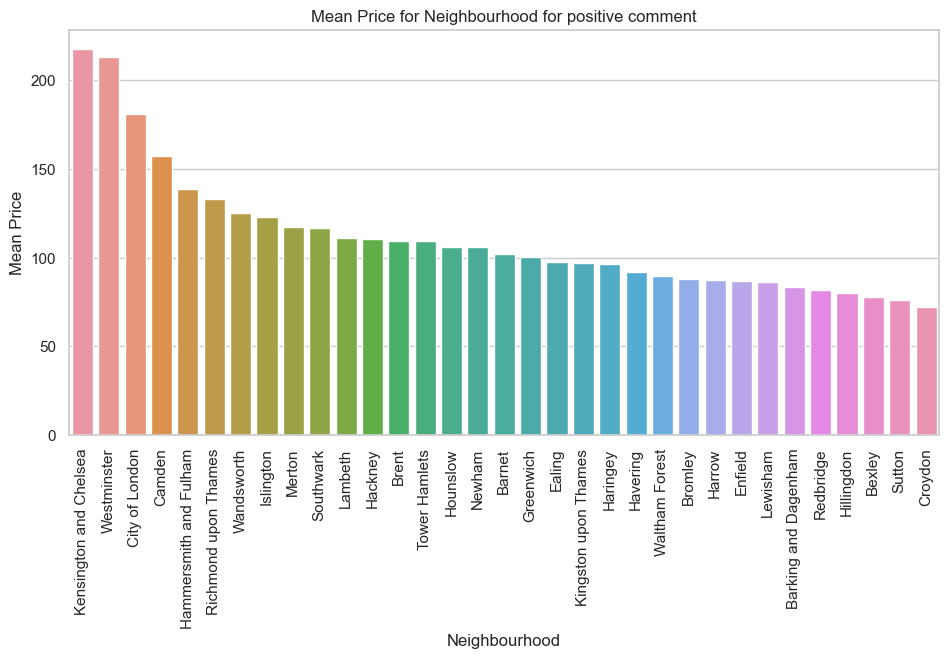

In [108]:
plt.figure(figsize=(10,5))
sns.barplot(x='Neighbourhood',y='Mean Price',data=neighourhood_price_pos)
plt.xticks(rotation=90)
plt.title('Mean Price for Neighbourhood for positive comment')
plt.show()

In [109]:
neighourhood_price_room=positiveData.groupby(['room_type'])['price'].mean().sort_values(ascending=False)

In [110]:
neighourhood_price_room=pd.DataFrame(neighourhood_price_room.items(),columns=['Room Type','Mean Price'])
neighourhood_price_room.head()

Room Type  Mean Price
0       Hotel room  221.296528
1  Entire home/apt  173.467208
2     Private room   60.488404
3      Shared room   41.668808

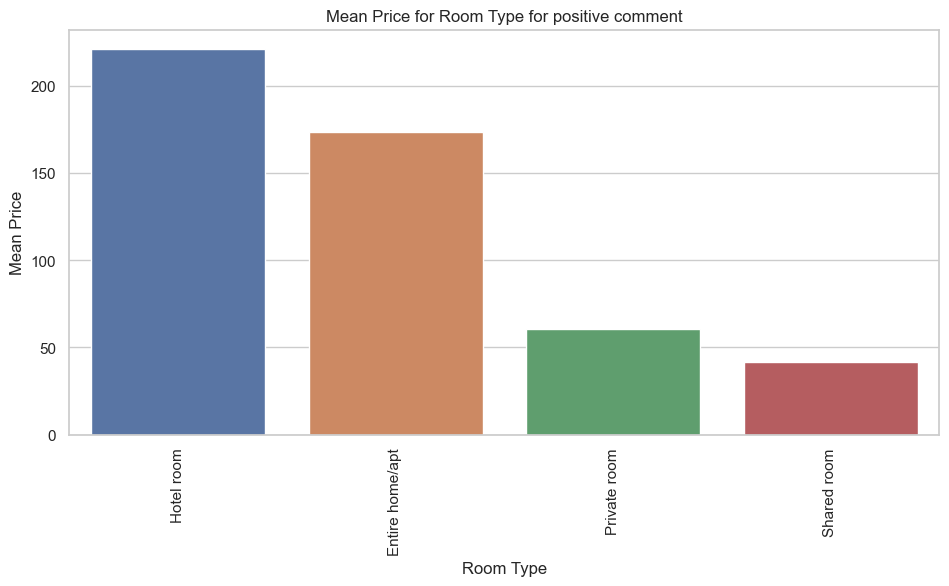

In [111]:
plt.figure(figsize=(10,5))
sns.barplot(x='Room Type',y='Mean Price',data=neighourhood_price_room)
plt.xticks(rotation=90)
plt.title('Mean Price for Room Type for positive comment')
plt.show()

For Negative Comment Part

In [112]:
negativeData=mergedData[mergedData['Sentiment']=='Negative']


In [113]:
negativeData.room_type.value_counts()

Entire home/apt    352
Private room       212
Shared room          3
Hotel room           1
Name: room_type, dtype: int64

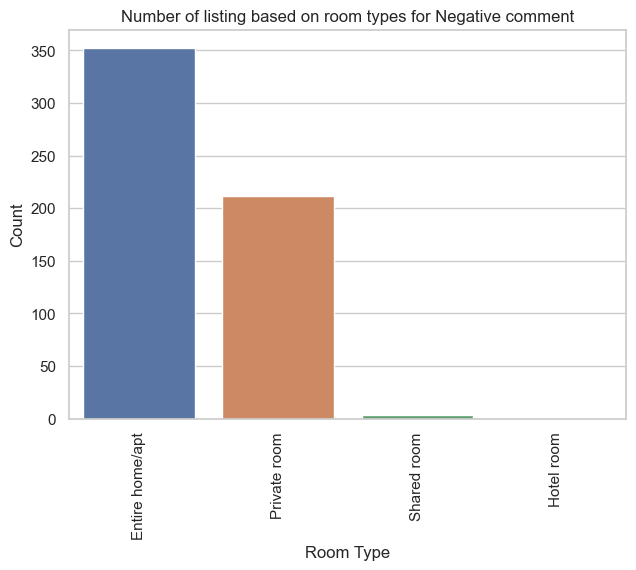

In [114]:

ax =sns.countplot(x ='room_type', data = negativeData,order=negativeData['room_type'].value_counts().index)
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Number of listing based on room types for Negative comment')
plt.show()

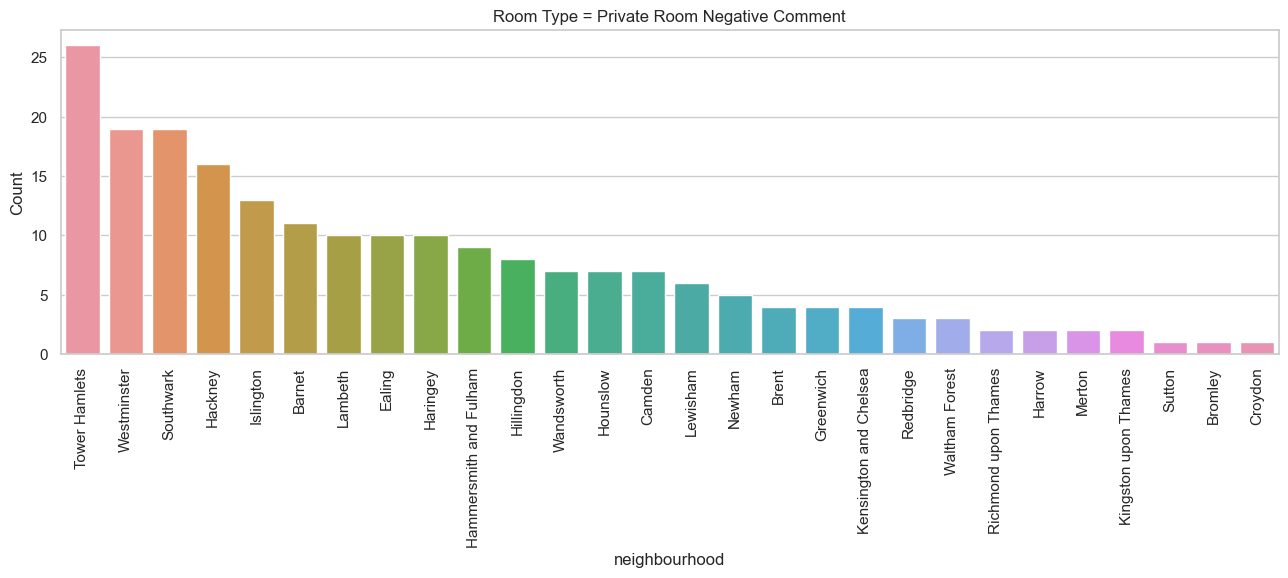

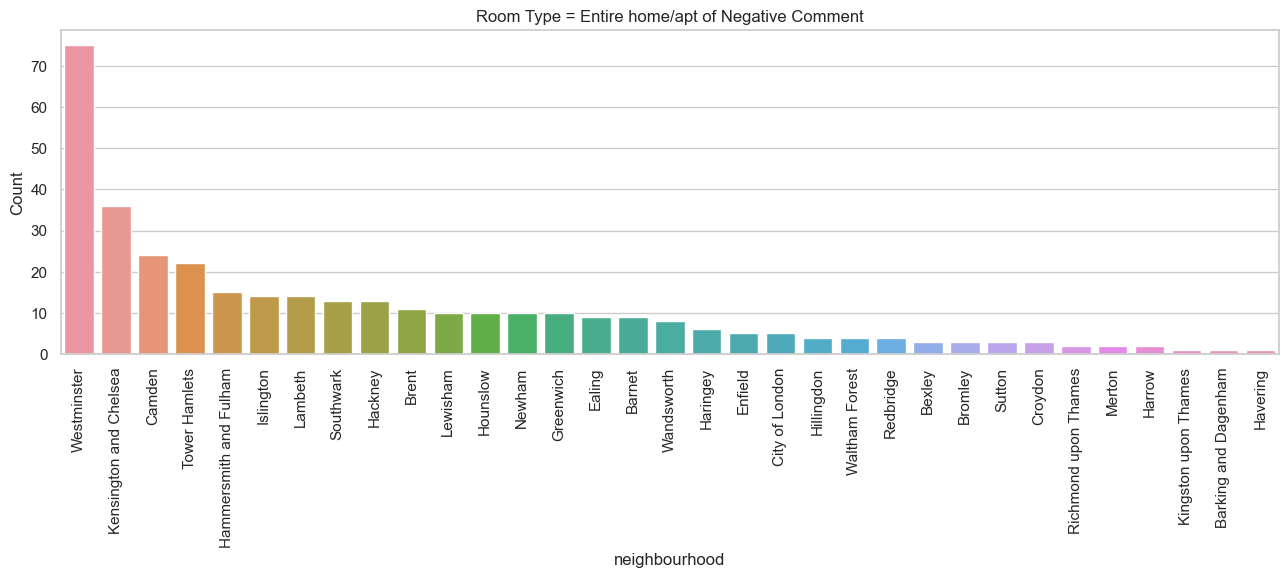

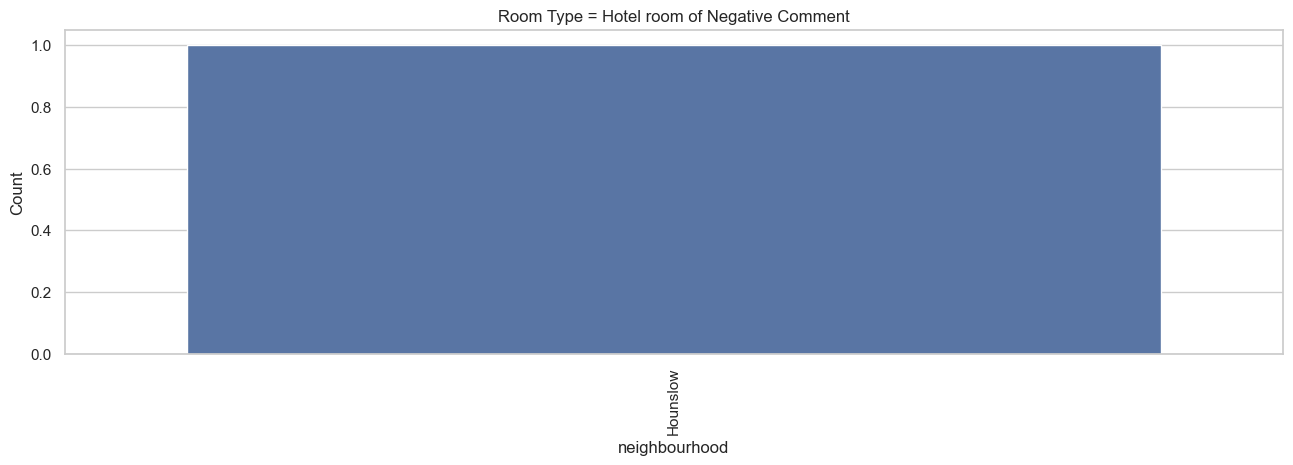

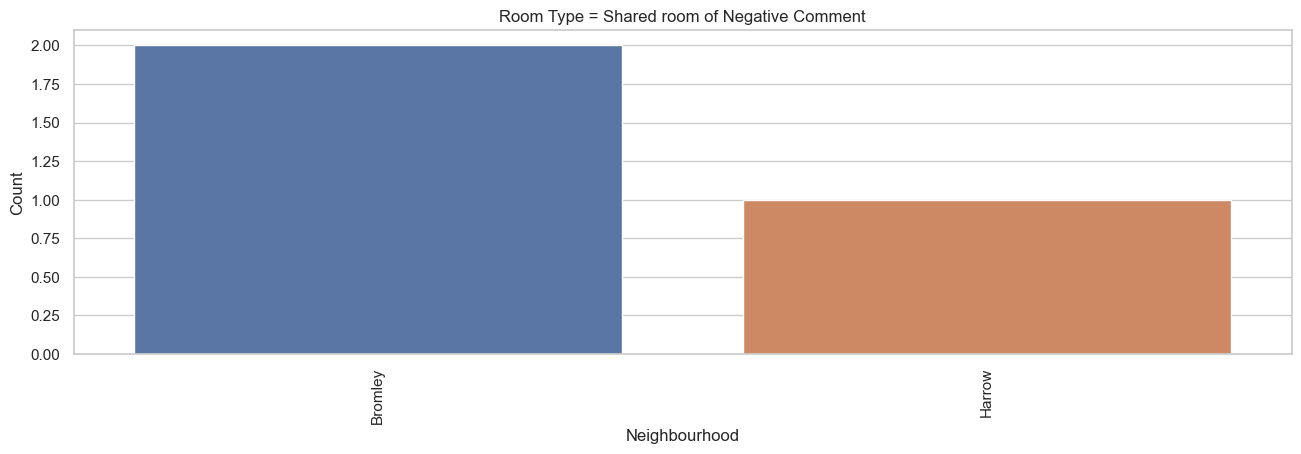

In [115]:
data_private_room_positive=negativeData[negativeData['room_type']=='Private room']
plt.figure(figsize=(14,4))
ax =sns.countplot(x ='neighbourhood', data = data_private_room_positive,order=data_private_room_positive['neighbourhood'].value_counts().index)

plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Room Type = Private Room Negative Comment')
plt.show()

data_entire_positive=negativeData[negativeData['room_type']=='Entire home/apt']
plt.figure(figsize=(14,4))
ax =sns.countplot(x ='neighbourhood', data = data_entire_positive,order=data_entire_positive['neighbourhood'].value_counts().index)

plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Room Type = Entire home/apt of Negative Comment')
plt.show()

data_hotel_room_positive=negativeData[negativeData['room_type']=='Hotel room']
plt.figure(figsize=(14,4))
ax =sns.countplot(x ='neighbourhood', data = data_hotel_room_positive,order=data_hotel_room_positive['neighbourhood'].value_counts().index)

plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Room Type = Hotel room of Negative Comment')
plt.show()

data_share_room_positive=negativeData[negativeData['room_type']=='Shared room']
plt.figure(figsize=(14,4))
ax =sns.countplot(x ='neighbourhood', data = data_share_room_positive,order=data_share_room_positive['neighbourhood'].value_counts().index)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Room Type = Shared room of Negative Comment')
plt.show()

In [116]:
negativeData.neighbourhood.value_counts()

Westminster               94
Tower Hamlets             48
Kensington and Chelsea    40
Southwark                 32
Camden                    31
Hackney                   29
Islington                 27
Lambeth                   24
Hammersmith and Fulham    24
Barnet                    20
Ealing                    19
Hounslow                  18
Lewisham                  16
Haringey                  16
Wandsworth                15
Brent                     15
Newham                    15
Greenwich                 14
Hillingdon                12
Redbridge                  7
Waltham Forest             7
Bromley                    6
Enfield                    5
Harrow                     5
City of London             5
Sutton                     4
Merton                     4
Richmond upon Thames       4
Croydon                    4
Kingston upon Thames       3
Bexley                     3
Barking and Dagenham       1
Havering                   1
Name: neighbourhood, dtype: int64

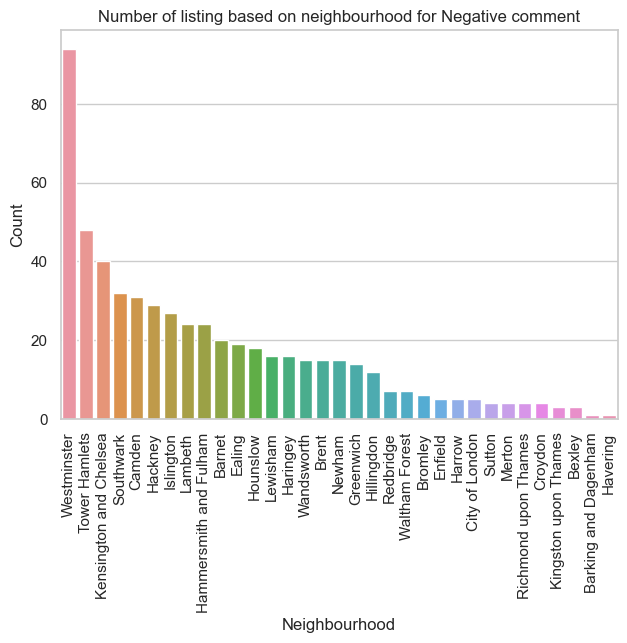

In [117]:
ax =sns.countplot(x ='neighbourhood', data = negativeData,order=negativeData['neighbourhood'].value_counts().index)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Number of listing based on neighbourhood for Negative comment')
plt.show()

In [118]:
neighourhood_price_pos=negativeData.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)

In [119]:
neighourhood_price_pos=pd.DataFrame(neighourhood_price_pos.items(),columns=['Neighbourhood','Mean Price'])
neighourhood_price_pos.head()

Neighbourhood  Mean Price
0  Kensington and Chelsea  233.306250
1             Westminster  224.452128
2          City of London  186.400000
3                Hounslow  176.236111
4  Hammersmith and Fulham  170.541667

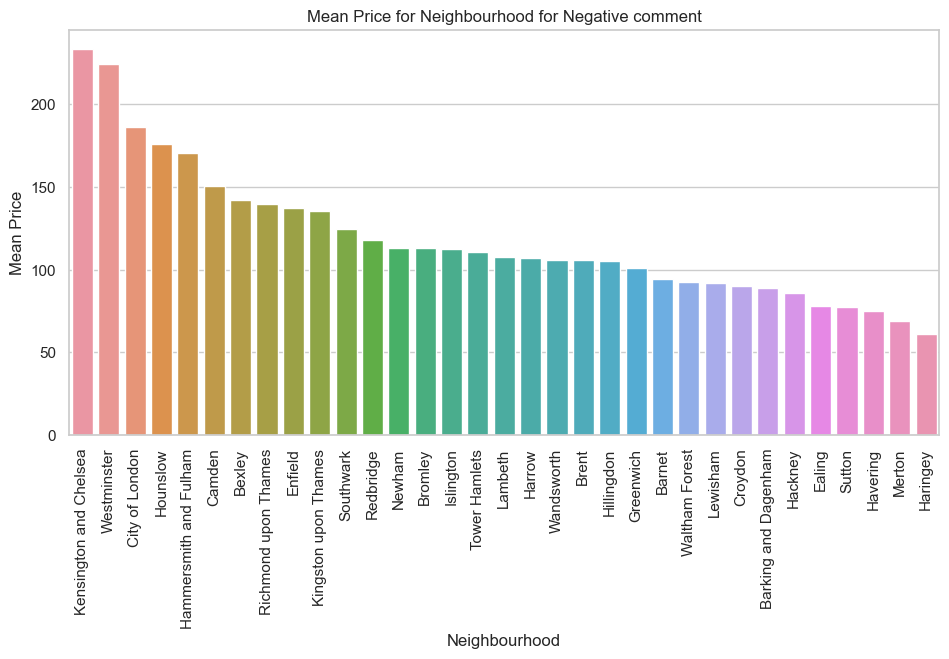

In [120]:
plt.figure(figsize=(10,5))
sns.barplot(x='Neighbourhood',y='Mean Price',data=neighourhood_price_pos)
plt.xticks(rotation=90)
plt.title('Mean Price for Neighbourhood for Negative comment')
plt.show()

In [121]:
neighourhood_price_room=negativeData.groupby(['room_type'])['price'].mean().sort_values(ascending=False)

In [122]:
neighourhood_price_room=pd.DataFrame(neighourhood_price_room.items(),columns=['Room Type','Mean Price'])
neighourhood_price_room.head()

Room Type  Mean Price
0       Hotel room  220.000000
1  Entire home/apt  185.982955
2     Private room   66.668632
3      Shared room   46.000000

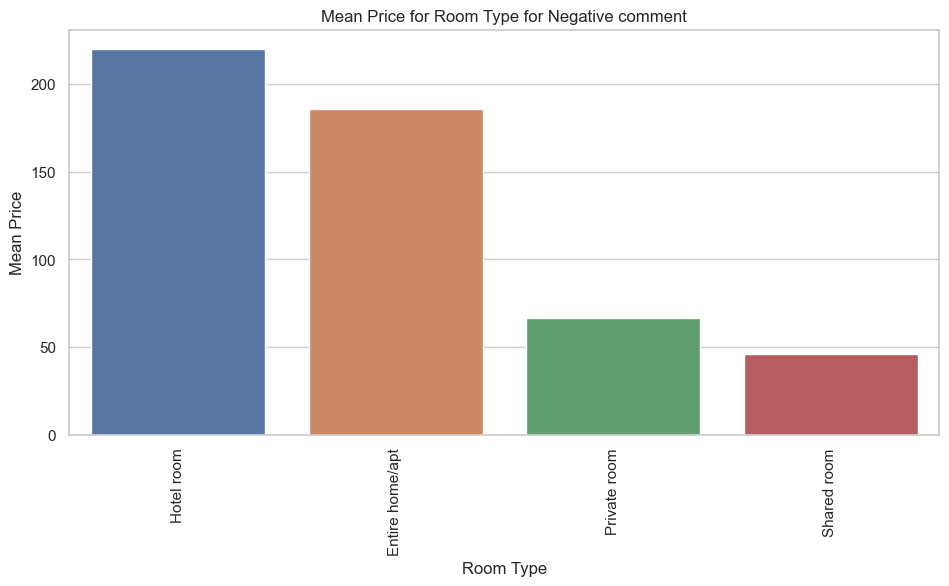

In [123]:
plt.figure(figsize=(10,5))
sns.barplot(x='Room Type',y='Mean Price',data=neighourhood_price_room)
plt.xticks(rotation=90)
plt.title('Mean Price for Room Type for Negative comment')
plt.show()

# Word Cloud for positive and negative


For Positive Comments

In [124]:
mergedData=pd.read_csv('mergedData.csv')

mergedData.head()

Unnamed: 0                                           comments     id  \
0           0  ["My girlfriend and I hadn't known Alina befor...  13913   
1           1  ["We loved staying at Phillipa's place in Chel...  15400   
2           2  ['Amazing location - great apartment, plenty o...  17402   
3           3  ['The communication with Joe was very easy. We...  24328   
4           4  ["10,000 times better and cheaper than staying...  25123   

    host_id host_name           neighbourhood  \
0   54730.0     Alina               Islington   
1   60302.0  Philippa  Kensington and Chelsea   
2   67564.0       Liz             Westminster   
3   41759.0       Joe              Wandsworth   
4  103583.0     Grace                  Barnet   

                                                name        room_type  \
0                Holiday London DB Room Let-on going     Private room   
1                Bright Chelsea  Apartment. Chelsea!  Entire home/apt   
2              Superb 3-Bed/2 Bath & Wifi: Trendy W1  Entire home/apt   
3  Battersea live/work artist house, garden communal  Entire home/apt   
4                  Clean big Room in London (Room 1)     Private room   

   number_of_reviews  calculated_host_listings_count  availability_365  price  \
0               41.0                             2.0             313.0   79.0   
1               92.0                             1.0              76.0   80.0   
2               54.0                             8.0             227.0  418.0   
3               96.0                             1.0              26.0  250.0   
4              129.0                             3.0               0.0   29.0   

  Sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive

In [125]:
PositiveComment=mergedData[mergedData['Sentiment']=='Positive']['comments']
PositiveComment

0        ["My girlfriend and I hadn't known Alina befor...
1        ["We loved staying at Phillipa's place in Chel...
2        ['Amazing location - great apartment, plenty o...
3        ['The communication with Joe was very easy. We...
4        ["10,000 times better and cheaper than staying...
                               ...                        
56543         ['nice room, central area with subway near']
56544    ['Fantastic host.<br/>Great accommodation cant...
56545    ['Raffaella’s flat is quite spacious, we were ...
56546    ['Superb stay & very convenient for access to ...
56547    ["I booked Karen's home last minute and my goo...
Name: comments, Length: 53620, dtype: object

In [126]:
pos_tok = [token for line in PositiveComment for token in line.split() if token.lower() in positive_list]
pos_tok

['faith',
 'quiet',
 'excellent',
 'good',
 'dependable',
 'prefer',
 'love',
 'happy',
 'good',
 'clean',
 'tidy',
 'recommend',
 'amazing',
 'right',
 'like',
 'sweet',
 'right',
 'great',
 'clean',
 'helped',
 'helped',
 'great',
 'great',
 'good',
 'happy',
 'great',
 'enjoyed',
 'great',
 'nice',
 'clean',
 'like',
 'enjoyed',
 'beautiful',
 'thank',
 'wonderful',
 'warm',
 'comfortable',
 'great',
 'recommend',
 'perfect',
 'exceptional',
 'like',
 'stunning',
 'magnificent',
 'bright',
 'cozy',
 'great',
 'recommend',
 'beautiful',
 'friendly',
 'polite',
 'great',
 'great',
 'support',
 'amazing',
 'available',
 'super',
 'relaxed',
 'friendly',
 'thoughtful',
 'safe',
 'recommend',
 'instantly',
 'Thoughtful',
 'amazing',
 'warmly',
 'nice',
 'great',
 'relaxed',
 'friendly',
 'comfortable',
 'great',
 'great',
 'excellent',
 'friendly',
 'stylish',
 'great',
 'glad',
 'pleasing',
 'gain',
 'lovely',
 'lovely',
 'like',
 'comfortable',
 'nice',
 'great',
 'lovely',
 'friendly'

In [127]:
from collections import Counter

def Geting_commonword(words):
    word_tokens= Counter(words)
    FrequentUsedWord=word_tokens.most_common(50)# here we only take 50 word
    result=dict(FrequentUsedWord)
    return result

In [128]:
positive_common_words=Geting_commonword(pos_tok)


In [129]:
positive_common_words

{'great': 378958,
 'clean': 200967,
 'nice': 198606,
 'good': 171302,
 'recommend': 169249,
 'lovely': 146243,
 'well': 130794,
 'easy': 129795,
 'comfortable': 119871,
 'perfect': 106525,
 'helpful': 84476,
 'super': 83930,
 'quiet': 83558,
 'friendly': 83025,
 'like': 82925,
 'enjoyed': 65811,
 'wonderful': 63166,
 'beautiful': 53866,
 'Great': 52042,
 'amazing': 51005,
 'excellent': 47274,
 'right': 45572,
 'Thank': 45258,
 'convenient': 44914,
 'spacious': 44141,
 'best': 39982,
 'loved': 39360,
 'warm': 36150,
 'fantastic': 35894,
 'responsive': 32710,
 'enough': 27876,
 'welcome': 25442,
 'safe': 24167,
 'cozy': 23921,
 'better': 23075,
 'comfy': 23032,
 'love': 22127,
 'available': 21561,
 'pleasant': 21186,
 'work': 20168,
 'modern': 19815,
 'happy': 19286,
 'Good': 18772,
 'helped': 17102,
 'hot': 16590,
 'pretty': 16441,
 'tidy': 16181,
 'ideal': 15977,
 'Easy': 15424,
 'perfectly': 15138}

In [130]:
Positivelistdata=pd.DataFrame(positive_common_words.items(),columns=['CommonWord','Count'])
Positivelistdata.head()

CommonWord   Count
0      great  378958
1      clean  200967
2       nice  198606
3       good  171302
4  recommend  169249

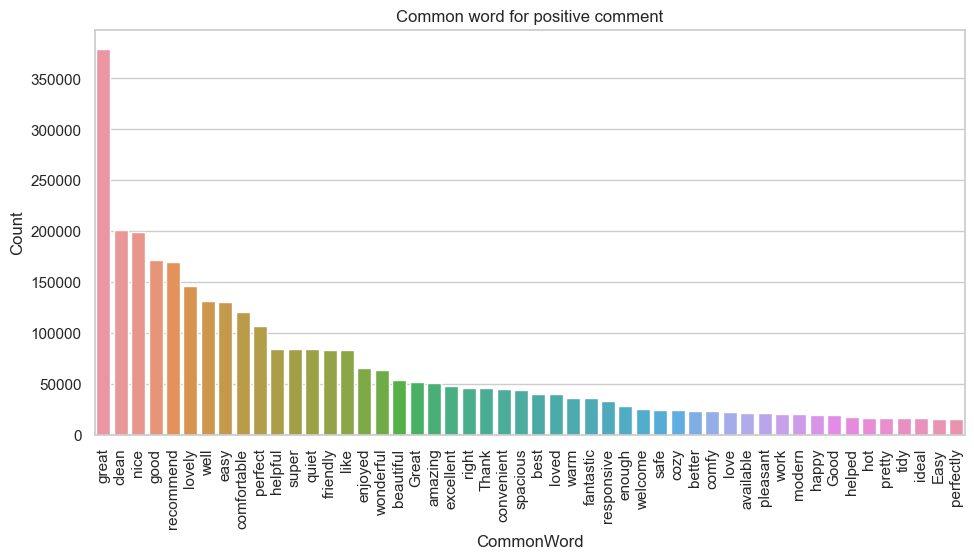

In [131]:
plt.figure(figsize=(10,5))
sns.barplot(x='CommonWord',y='Count',data=Positivelistdata)
plt.xticks(rotation=90)
plt.title('Common word for positive comment')
plt.show()

In [132]:
positiveComments =mergedData[mergedData['Sentiment']=='Positive']['comments']
positiveComments=pd.DataFrame(positiveComments)

In [133]:
positiveComments['comments']=positiveComments['comments'].astype(str)
positiveComments['comments']

0        ["My girlfriend and I hadn't known Alina befor...
1        ["We loved staying at Phillipa's place in Chel...
2        ['Amazing location - great apartment, plenty o...
3        ['The communication with Joe was very easy. We...
4        ["10,000 times better and cheaper than staying...
                               ...                        
56543         ['nice room, central area with subway near']
56544    ['Fantastic host.<br/>Great accommodation cant...
56545    ['Raffaella’s flat is quite spacious, we were ...
56546    ['Superb stay & very convenient for access to ...
56547    ["I booked Karen's home last minute and my goo...
Name: comments, Length: 53620, dtype: object

In [134]:
import re#regular expressions: https://book.pythontips.com/en/latest/lambdas.html

#Removes the urls on the column 'text' 
positiveComments['comments'] = positiveComments['comments'].apply(lambda x:re.sub(r'\s*https?://t\.co/[a-zA-Z0-9]+\s*', ' ', x))
print(positiveComments['comments'])

0        ["My girlfriend and I hadn't known Alina befor...
1        ["We loved staying at Phillipa's place in Chel...
2        ['Amazing location - great apartment, plenty o...
3        ['The communication with Joe was very easy. We...
4        ["10,000 times better and cheaper than staying...
                               ...                        
56543         ['nice room, central area with subway near']
56544    ['Fantastic host.<br/>Great accommodation cant...
56545    ['Raffaella’s flat is quite spacious, we were ...
56546    ['Superb stay & very convenient for access to ...
56547    ["I booked Karen's home last minute and my goo...
Name: comments, Length: 53620, dtype: object


In [135]:
# We can also remove any numbers, as they may not be useful to the analysis, using a similar approach.
positiveComments['comments'] = positiveComments['comments'].apply(lambda x:re.sub(r'[0-9]+', '', x))
print(positiveComments['comments'])

0        ["My girlfriend and I hadn't known Alina befor...
1        ["We loved staying at Phillipa's place in Chel...
2        ['Amazing location - great apartment, plenty o...
3        ['The communication with Joe was very easy. We...
4        [", times better and cheaper than staying at a...
                               ...                        
56543         ['nice room, central area with subway near']
56544    ['Fantastic host.<br/>Great accommodation cant...
56545    ['Raffaella’s flat is quite spacious, we were ...
56546    ['Superb stay & very convenient for access to ...
56547    ["I booked Karen's home last minute and my goo...
Name: comments, Length: 53620, dtype: object


In [136]:
# Importing necessary library
import nltk.corpus #natural language toolkit
# import nltk.corpus 
nltk.download('stopwords')
nltk.download('punkt')
import os
from nltk.tokenize import word_tokenize

# Passing the string text into word tokenize for breaking the sentences
Token_list=[]
for comment in positiveComments['comments']: 
    Token_list.append(word_tokenize(comment))

#Let us look at the content of the first review as a set of tokens, and the rating.
print(Token_list[0])
print(positiveComments.iloc[0:1])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bimalkilambu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bimalkilambu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['[', '``', 'My', 'girlfriend', 'and', 'I', 'had', "n't", 'known', 'Alina', 'before', 'we', 'took', 'the', 'leap', 'of', 'faith', 'to', 'rent', 'her', 'flat', '.', 'Alina', 'just', 'could', "n't", 'be', 'nicer', '!', 'Her', 'flat', 'is', 'comfortable', ',', 'homey', ',', 'very', 'sunny', ',', 'and', 'quiet', 'at', 'night', '.', 'Her', 'diverse', 'neighborhood', 'rocks', '!', 'It', "'s", 'full', 'of', 'excellent', 'eateries', 'of', 'varying', 'ethnicities', ',', 'good', 'supermarkets', ',', 'etc.', ',', 'etc', '.', 'Her', 'place', 'is', 'about', 'a', '-minute', 'walk', 'to', 'the', 'Finsbury', 'Park', 'tube', 'stop', ',', 'and', 'there', 'are', 'also', 'several', 'buses', 'that', 'ply', 'Stroud', 'Green', 'Road', '.', 'The', 'Piccadilly', 'and', 'Victoria', 'tube', 'lines', 'that', 'serve', 'Finsbury', 'Park', 'are', 'very', 'dependable', 'and', 'come', 'frequently', '.', 'My', 'only', 'caveat', 'is', 'if', 'you', 'are', 'unwilling', 'to', 'take', '-', 'to', '-minute', 'commutes', 'to',

In [137]:
#Remove the puntuation and other non alphanumeric tokens
for i in range (0,len(Token_list)):
    Token_list[i] =[word for word in Token_list[i] if word.isalnum() ] 
    
#Again we look at first review to see the effect.  
print(Token_list[0])

['My', 'girlfriend', 'and', 'I', 'had', 'known', 'Alina', 'before', 'we', 'took', 'the', 'leap', 'of', 'faith', 'to', 'rent', 'her', 'flat', 'Alina', 'just', 'could', 'be', 'nicer', 'Her', 'flat', 'is', 'comfortable', 'homey', 'very', 'sunny', 'and', 'quiet', 'at', 'night', 'Her', 'diverse', 'neighborhood', 'rocks', 'It', 'full', 'of', 'excellent', 'eateries', 'of', 'varying', 'ethnicities', 'good', 'supermarkets', 'etc', 'Her', 'place', 'is', 'about', 'a', 'walk', 'to', 'the', 'Finsbury', 'Park', 'tube', 'stop', 'and', 'there', 'are', 'also', 'several', 'buses', 'that', 'ply', 'Stroud', 'Green', 'Road', 'The', 'Piccadilly', 'and', 'Victoria', 'tube', 'lines', 'that', 'serve', 'Finsbury', 'Park', 'are', 'very', 'dependable', 'and', 'come', 'frequently', 'My', 'only', 'caveat', 'is', 'if', 'you', 'are', 'unwilling', 'to', 'take', 'to', 'commutes', 'to', 'downtown', 'London', 'attractions', 'and', 'money', 'is', 'no', 'object', 'you', 'will', 'prefer', 'to', 'stay', 'downtown', 'But', 'f

In [138]:

stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)# pronouns and prepositions mainly
# importing stopwors from nltk library
from nltk import word_tokenize
from nltk.corpus import stopwords

a = set(stopwords.words('english'))

for i in range (0,len(Token_list)):
    Token_list[i] =[word for word in Token_list[i] if word not in a ] 
print(Token_list[0])

#print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [139]:

words = ''

# iterate through the text attribute in the dataframe splitting the text into the component tokens
for val in positiveData['comments'] :      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        if tokens[i] in positive_list:
            tokens[i] = tokens[i].lower()
      
    words += " ".join(tokens)+" "

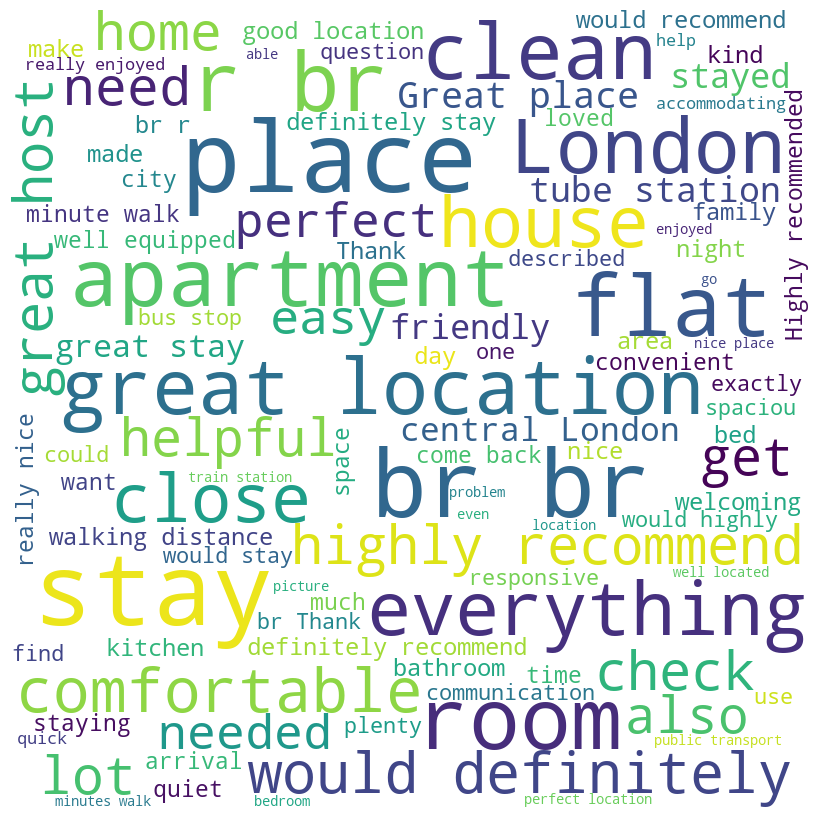

In [140]:
# importing all necessery modules
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = a,#We don't want to see stopwords in the word clous
                min_font_size = 10,
                max_font_size=100, 
                max_words=100).generate(words)
                                             
                                              
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [141]:
#For Negative WordCloud

In [142]:
NegativeComment=mergedData[mergedData['Sentiment']=='Negative']['comments']
NegativeComment

1580     ['Een hele goede ervaring met de verhuurder, g...
2965     ["Tout parfait : hôte accueillant, sympathique...
3100     ["Calvin s'est montré très agréable pendant no...
3387     ['The reservation was canceled 6 days before a...
3486     ["Le quartier victorien aux vieilles maisons e...
                               ...                        
56365    ['Très belle appartement et très propre même l...
56370    ['Appartement très bien placé et avec tout le ...
56388    ['I needed an arbnb very last minute as my oth...
56429    ['Appartement confortable et spacieux. On s’y ...
56541    ["This was the most terrible experience I've e...
Name: comments, Length: 568, dtype: object

In [143]:
neg_tok = [token for line in NegativeComment for token in line.split() if token.lower() in negative_list]

In [144]:
negative_common_words=Geting_commonword(neg_tok)

In [145]:
negativelistdata=pd.DataFrame(negative_common_words.items(),columns=['CommonWord','Count'])
negativelistdata.head()

CommonWord  Count
0        die    152
1      dirty     76
2       tout     72
3        Die     71
4        bad     59

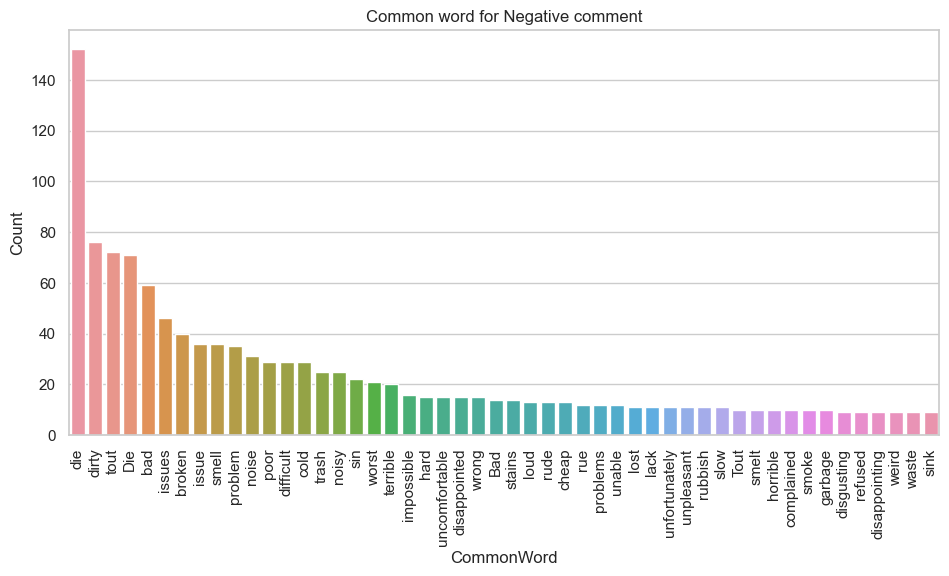

In [146]:
plt.figure(figsize=(10,5))
sns.barplot(x='CommonWord',y='Count',data=negativelistdata)
plt.xticks(rotation=90)
plt.title('Common word for Negative comment')
plt.show()

In [147]:
negativeData= mergedData[mergedData['Sentiment']=='Negative']['comments']
negativeData=pd.DataFrame(negativeData)

In [148]:
negativeData['comments']=negativeData['comments'].astype(str)

In [149]:
import re#regular expressions: https://book.pythontips.com/en/latest/lambdas.html

#Removes the urls on the column 'text' 
negativeData['comments'] = negativeData['comments'].apply(lambda x:re.sub(r'\s*https?://t\.co/[a-zA-Z0-9]+\s*', ' ', x))
print(negativeData['comments'])

1580     ['Een hele goede ervaring met de verhuurder, g...
2965     ["Tout parfait : hôte accueillant, sympathique...
3100     ["Calvin s'est montré très agréable pendant no...
3387     ['The reservation was canceled 6 days before a...
3486     ["Le quartier victorien aux vieilles maisons e...
                               ...                        
56365    ['Très belle appartement et très propre même l...
56370    ['Appartement très bien placé et avec tout le ...
56388    ['I needed an arbnb very last minute as my oth...
56429    ['Appartement confortable et spacieux. On s’y ...
56541    ["This was the most terrible experience I've e...
Name: comments, Length: 568, dtype: object


In [150]:
# We can also remove any numbers, as they may not be useful to the analysis, using a similar approach.
negativeData['comments'] = negativeData['comments'].apply(lambda x:re.sub(r'[0-9]+', '', x))
print(negativeData['comments'])

1580     ['Een hele goede ervaring met de verhuurder, g...
2965     ["Tout parfait : hôte accueillant, sympathique...
3100     ["Calvin s'est montré très agréable pendant no...
3387     ['The reservation was canceled  days before ar...
3486     ["Le quartier victorien aux vieilles maisons e...
                               ...                        
56365    ['Très belle appartement et très propre même l...
56370    ['Appartement très bien placé et avec tout le ...
56388    ['I needed an arbnb very last minute as my oth...
56429    ['Appartement confortable et spacieux. On s’y ...
56541    ["This was the most terrible experience I've e...
Name: comments, Length: 568, dtype: object


In [152]:
# Importing necessary library
import nltk.corpus #natural language toolkit
# import nltk.corpus 
nltk.download('stopwords')
nltk.download('punkt')
import os
from nltk.tokenize import word_tokenize

# Passing the string text into word tokenize for breaking the sentences
Token_list=[]
for comment in negativeData['comments']: 
    Token_list.append(word_tokenize(comment))

#Let us look at the content of the first review as a set of tokens, and the rating.
print(Token_list[0])
print(negativeData.iloc[0:1])

['[', "'Een", 'hele', 'goede', 'ervaring', 'met', 'de', 'verhuurder', ',', 'goed', 'mailcontact', 'en', 'tips', 'over', 'hoe', 'te', 'reizen.\\r', '<', 'br/', '>', 'Het', 'huis', 'was', 'gezellig', 'en', 'ruim', 'genoeg', 'voor', 'acht', 'personen', '.', 'De', 'bedden', 'waren', 'hard', 'en', 'een', 'bed', 'niet', 'sterk', 'genoeg', 'voor', 'een', 'volwassen', 'man', 'van', 'cm', '.', 'DE', 'buurt', 'was', 'lekker', 'rustig', ',', 'dat', 'was', 'een', 'verademing', 'na', 'de', 'drukte', 'van', 'het', 'centrum.\\r', '<', 'br/', '>', "'", ',', "'Excellente", 'communication', 'par', 'mail', 'avec', 'le', 'propriétaire', 'avant', 'notre', 'location', ',', 'ce', 'qui', 'nous', 'a', 'permis', 'de', 'bien', 'préparer', 'notre', 'voyage', '.', 'La', 'maison', 'est', 'spacieuse', 'et', 'très', 'bien', 'située', 'à', 'proximité', 'des', 'transports', 'en', 'commun', '.', 'On', 'est', 'au', 'centre', 'de', 'Londres', 'en', 'moins', 'de', 'minutes', '.', '\\r', '<', 'br/', '>', 'Ce', 'logement', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bimalkilambu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bimalkilambu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [153]:
#Remove the puntuation and other non alphanumeric tokens
for i in range (0,len(Token_list)):
    Token_list[i] =[word for word in Token_list[i] if word.isalnum() ] 
    
#Again we look at first review to see the effect.  
print(Token_list[0])

['hele', 'goede', 'ervaring', 'met', 'de', 'verhuurder', 'goed', 'mailcontact', 'en', 'tips', 'over', 'hoe', 'te', 'Het', 'huis', 'was', 'gezellig', 'en', 'ruim', 'genoeg', 'voor', 'acht', 'personen', 'De', 'bedden', 'waren', 'hard', 'en', 'een', 'bed', 'niet', 'sterk', 'genoeg', 'voor', 'een', 'volwassen', 'man', 'van', 'cm', 'DE', 'buurt', 'was', 'lekker', 'rustig', 'dat', 'was', 'een', 'verademing', 'na', 'de', 'drukte', 'van', 'het', 'communication', 'par', 'mail', 'avec', 'le', 'propriétaire', 'avant', 'notre', 'location', 'ce', 'qui', 'nous', 'a', 'permis', 'de', 'bien', 'préparer', 'notre', 'voyage', 'La', 'maison', 'est', 'spacieuse', 'et', 'très', 'bien', 'située', 'à', 'proximité', 'des', 'transports', 'en', 'commun', 'On', 'est', 'au', 'centre', 'de', 'Londres', 'en', 'moins', 'de', 'minutes', 'Ce', 'logement', 'est', 'également', 'parfaitement', 'adapté', 'aux', 'familles', 'avec', 'enfants', 'jardin', 'consoles', 'de', 'jeux', 'et', 'jouets', 'sont', 'disponibles', 'pour',

In [154]:

stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)# pronouns and prepositions mainly
# importing stopwors from nltk library
from nltk import word_tokenize
from nltk.corpus import stopwords

a = set(stopwords.words('english'))

for i in range (0,len(Token_list)):
    Token_list[i] =[word for word in Token_list[i] if word not in a ] 
print(Token_list[0])

#print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [155]:

wordsnegative = ''

# iterate through the text attribute in the dataframe splitting the text into the component tokens
for val in negativeData['comments'] :      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        if tokens[i].lower in negative_list:
            tokens[i] = tokens[i].lower()
            
            
      
    wordsnegative += " ".join(tokens)+" "

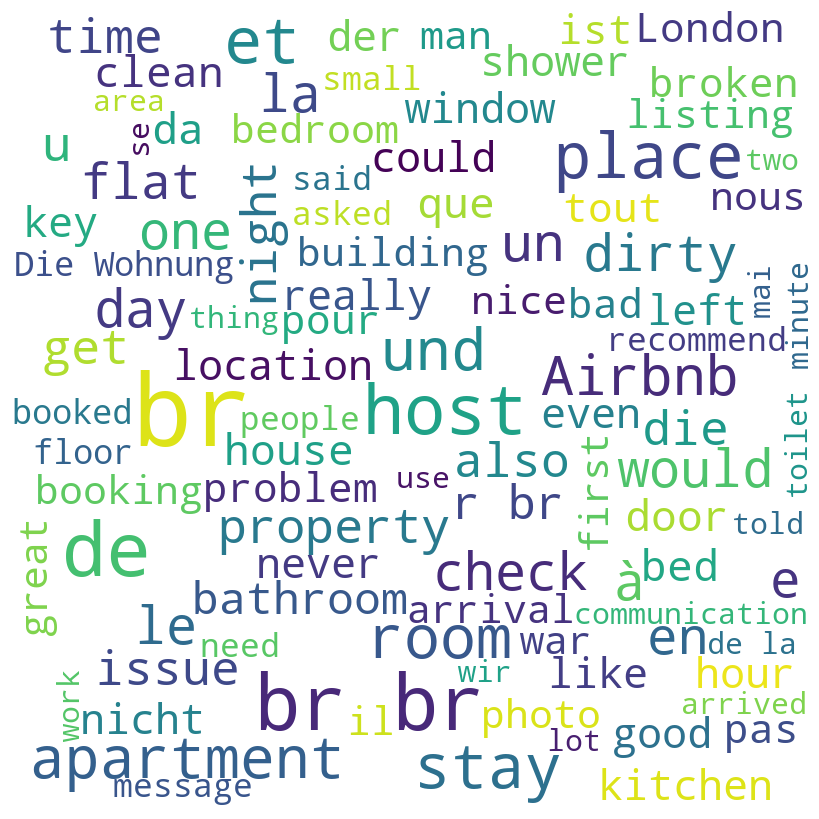

In [156]:
# importing all necessery modules
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = a,#We don't want to see stopwords in the word clous
                min_font_size = 10,
                max_font_size=100, 
                max_words=100).generate(wordsnegative)
                                             
                                              
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [157]:
#For Neutral Word

In [158]:
NeutralComment=mergedData[mergedData['Sentiment']=='Neutral']['comments']

In [159]:
neu_tok = [token for line in NeutralComment for token in line.split() ]

In [160]:
neutral_common_words=Geting_commonword(neu_tok)

In [161]:
neutrallistdata=pd.DataFrame(neutral_common_words.items(),columns=['CommonWord','Count'])
neutrallistdata.head()

CommonWord  Count
0        the   3553
1        and   2451
2         is   2175
3          a   2160
4         to   1986

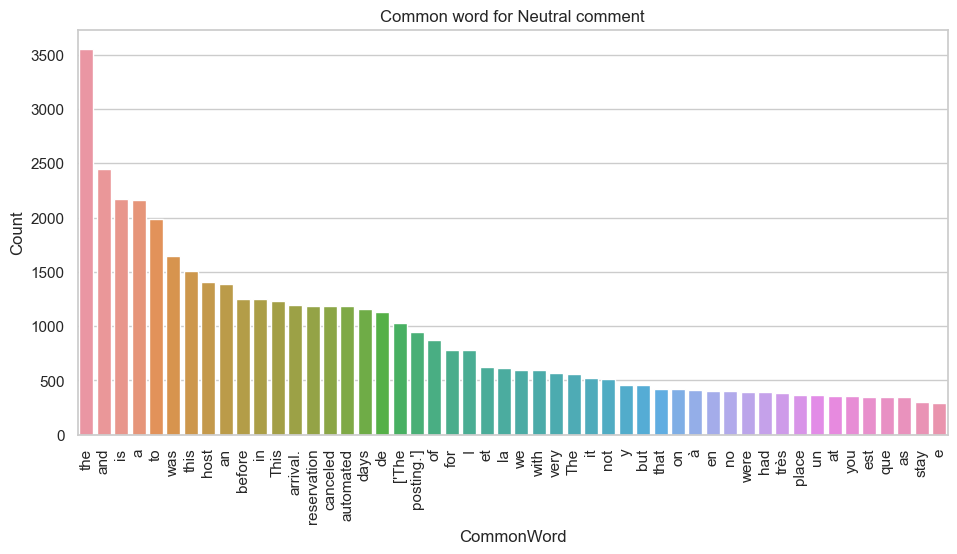

In [162]:
plt.figure(figsize=(10,5))
sns.barplot(x='CommonWord',y='Count',data=neutrallistdata)
plt.xticks(rotation=90)
plt.title('Common word for Neutral comment')
plt.show()

# Predictive Analysis

In [163]:
df=mergedData[['comments','Sentiment']]

In [164]:

df["text"] = df["comments"].astype(str)

/var/folders/qs/jg1mls8n4h937t73lsqtg4k80000gn/T/ipykernel_2299/278680932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["comments"].astype(str)


In [165]:
import re#regular expressions: https://book.pythontips.com/en/latest/lambdas.html

#Removes the urls on the column 'text' 
df['text'] = df['text'].apply(lambda x:re.sub(r'\s*https?://t\.co/[a-zA-Z0-9]+\s*', ' ', x))
print(df['text'])


0        ["My girlfriend and I hadn't known Alina befor...
1        ["We loved staying at Phillipa's place in Chel...
2        ['Amazing location - great apartment, plenty o...
3        ['The communication with Joe was very easy. We...
4        ["10,000 times better and cheaper than staying...
                               ...                        
56543         ['nice room, central area with subway near']
56544    ['Fantastic host.<br/>Great accommodation cant...
56545    ['Raffaella’s flat is quite spacious, we were ...
56546    ['Superb stay & very convenient for access to ...
56547    ["I booked Karen's home last minute and my goo...
Name: text, Length: 56548, dtype: object


/var/folders/qs/jg1mls8n4h937t73lsqtg4k80000gn/T/ipykernel_2299/801928018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x:re.sub(r'\s*https?://t\.co/[a-zA-Z0-9]+\s*', ' ', x))


In [166]:
# We can also remove any numbers, as they may not be useful to the analysis, using a similar approach.
df['text'] = df['text'].apply(lambda x:re.sub(r'[0-9]+', '', x))
print(df['text'])

0        ["My girlfriend and I hadn't known Alina befor...
1        ["We loved staying at Phillipa's place in Chel...
2        ['Amazing location - great apartment, plenty o...
3        ['The communication with Joe was very easy. We...
4        [", times better and cheaper than staying at a...
                               ...                        
56543         ['nice room, central area with subway near']
56544    ['Fantastic host.<br/>Great accommodation cant...
56545    ['Raffaella’s flat is quite spacious, we were ...
56546    ['Superb stay & very convenient for access to ...
56547    ["I booked Karen's home last minute and my goo...
Name: text, Length: 56548, dtype: object


/var/folders/qs/jg1mls8n4h937t73lsqtg4k80000gn/T/ipykernel_2299/1660392154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x:re.sub(r'[0-9]+', '', x))


In [167]:
# Importing necessary library
import nltk.corpus #natural language toolkit
# import nltk.corpus 
nltk.download('stopwords')
nltk.download('punkt')
import os
from nltk.tokenize import word_tokenize

# Passing the string text into word tokenize for breaking the sentences
Token_list=[]
for comment in df['text']: 
    Token_list.append(word_tokenize(comment))

#Let us look at the content of the first review as a set of tokens, and the rating.
print(Token_list[0])
print(df.iloc[0:1])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bimalkilambu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bimalkilambu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['[', '``', 'My', 'girlfriend', 'and', 'I', 'had', "n't", 'known', 'Alina', 'before', 'we', 'took', 'the', 'leap', 'of', 'faith', 'to', 'rent', 'her', 'flat', '.', 'Alina', 'just', 'could', "n't", 'be', 'nicer', '!', 'Her', 'flat', 'is', 'comfortable', ',', 'homey', ',', 'very', 'sunny', ',', 'and', 'quiet', 'at', 'night', '.', 'Her', 'diverse', 'neighborhood', 'rocks', '!', 'It', "'s", 'full', 'of', 'excellent', 'eateries', 'of', 'varying', 'ethnicities', ',', 'good', 'supermarkets', ',', 'etc.', ',', 'etc', '.', 'Her', 'place', 'is', 'about', 'a', '-minute', 'walk', 'to', 'the', 'Finsbury', 'Park', 'tube', 'stop', ',', 'and', 'there', 'are', 'also', 'several', 'buses', 'that', 'ply', 'Stroud', 'Green', 'Road', '.', 'The', 'Piccadilly', 'and', 'Victoria', 'tube', 'lines', 'that', 'serve', 'Finsbury', 'Park', 'are', 'very', 'dependable', 'and', 'come', 'frequently', '.', 'My', 'only', 'caveat', 'is', 'if', 'you', 'are', 'unwilling', 'to', 'take', '-', 'to', '-minute', 'commutes', 'to',

In [168]:
#Remove the puntuation and other non alphanumeric tokens
for i in range (0,len(Token_list)):
    Token_list[i] =[word for word in Token_list[i] if word.isalnum() ] 
    
#Again we look at first review to see the effect.  
print(Token_list[0])

['My', 'girlfriend', 'and', 'I', 'had', 'known', 'Alina', 'before', 'we', 'took', 'the', 'leap', 'of', 'faith', 'to', 'rent', 'her', 'flat', 'Alina', 'just', 'could', 'be', 'nicer', 'Her', 'flat', 'is', 'comfortable', 'homey', 'very', 'sunny', 'and', 'quiet', 'at', 'night', 'Her', 'diverse', 'neighborhood', 'rocks', 'It', 'full', 'of', 'excellent', 'eateries', 'of', 'varying', 'ethnicities', 'good', 'supermarkets', 'etc', 'Her', 'place', 'is', 'about', 'a', 'walk', 'to', 'the', 'Finsbury', 'Park', 'tube', 'stop', 'and', 'there', 'are', 'also', 'several', 'buses', 'that', 'ply', 'Stroud', 'Green', 'Road', 'The', 'Piccadilly', 'and', 'Victoria', 'tube', 'lines', 'that', 'serve', 'Finsbury', 'Park', 'are', 'very', 'dependable', 'and', 'come', 'frequently', 'My', 'only', 'caveat', 'is', 'if', 'you', 'are', 'unwilling', 'to', 'take', 'to', 'commutes', 'to', 'downtown', 'London', 'attractions', 'and', 'money', 'is', 'no', 'object', 'you', 'will', 'prefer', 'to', 'stay', 'downtown', 'But', 'f

In [169]:

stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)# pronouns and prepositions mainly
# importing stopwors from nltk library
from nltk import word_tokenize
from nltk.corpus import stopwords

a = set(stopwords.words('english'))

for i in range (0,len(Token_list)):
    Token_list[i] =[word for word in Token_list[i] if word not in a ] 
print(Token_list[0])

#print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [170]:
from nltk.util import ngrams

def words_to_ngrams(words, n, sep=" "):
    return [sep.join(words[i:i+n]) for i in range(len(words)-n+1)]

print("Bigrams: ", words_to_ngrams(Token_list[0],2))
print("\nTrigrams: ",words_to_ngrams(Token_list[0],3))

Bigrams:  ['My girlfriend', 'girlfriend I', 'I known', 'known Alina', 'Alina took', 'took leap', 'leap faith', 'faith rent', 'rent flat', 'flat Alina', 'Alina could', 'could nicer', 'nicer Her', 'Her flat', 'flat comfortable', 'comfortable homey', 'homey sunny', 'sunny quiet', 'quiet night', 'night Her', 'Her diverse', 'diverse neighborhood', 'neighborhood rocks', 'rocks It', 'It full', 'full excellent', 'excellent eateries', 'eateries varying', 'varying ethnicities', 'ethnicities good', 'good supermarkets', 'supermarkets etc', 'etc Her', 'Her place', 'place walk', 'walk Finsbury', 'Finsbury Park', 'Park tube', 'tube stop', 'stop also', 'also several', 'several buses', 'buses ply', 'ply Stroud', 'Stroud Green', 'Green Road', 'Road The', 'The Piccadilly', 'Piccadilly Victoria', 'Victoria tube', 'tube lines', 'lines serve', 'serve Finsbury', 'Finsbury Park', 'Park dependable', 'dependable come', 'come frequently', 'frequently My', 'My caveat', 'caveat unwilling', 'unwilling take', 'take 

In [171]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
from nltk.probability import FreqDist
fdist = FreqDist()
for i in range (0,len(Token_list)):
    for word in Token_list[i]:
        fdist[word.lower()]+=1
fdist


FreqDist({'i': 619932, 'the': 572072, 'stay': 565275, 'great': 503548, 'place': 473037, 'location': 414754, 'london': 342436, 'clean': 339326, 'host': 321174, 'room': 271180, ...})

In [172]:
#Concatenate the words together for each document or review
word_concat=[' '.join(word) for word in  Token_list]

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(word_concat)



In [174]:
X= text_tf
y=df['Sentiment']
from sklearn.preprocessing import LabelEncoder

#encode the labels from strings to values.
le = LabelEncoder()

y = le.fit_transform(y)
print(le.classes_)
y

['Negative' 'Neutral' 'Positive']


array([2, 2, 2, ..., 2, 2, 2])

# Random Forest Classifier


In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [176]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy',max_depth= 2,class_weight='balanced')
clf.fit(X_train,y_train);
y_pred = clf.predict(X_test)
y_pred


array([1, 2, 0, ..., 1, 2, 2])

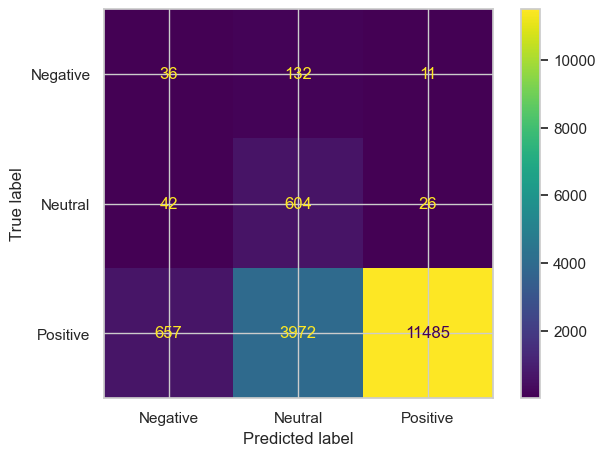

Results on the test set:
              precision    recall  f1-score   support

    Negative       0.20      0.05      0.08       735
     Neutral       0.90      0.13      0.22      4708
    Positive       0.71      1.00      0.83     11522

    accuracy                           0.71     16965
   macro avg       0.60      0.39      0.38     16965
weighted avg       0.74      0.71      0.63     16965



In [177]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#we can get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#we can plot it

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Negative', 'Neutral','Positive'])
disp.plot()

plt.show()

print('Results on the test set:')
print(classification_report(y_pred, y_test,target_names=['Negative','Neutral','Positive']))

In [178]:
accuracy_score(y_test,y_pred)

0.7147067491895078